In [ ]:
/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_label/json_files


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

In [ ]:
import os
from ultralytics import YOLO

# model = YOLO('yolov8n-pose.pt')  # load a pretrained model (recommended for training)
# model.train(data='/content/gdrive/My Drive/ComputerVisionEngineer/PoseDetectionYolov8/config.yaml', epochs=1, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 사전에 전체 라벨 목록을 조사한다.

In [ ]:
1. 작업을 시작하기 전에 추천하는 사전 점검
전체 JSON에서 어떤 label이 얼마나 나오는지 요약

annotation_info의 keypoint_label 값이 너무 다양해서
반복되는 label 목록을 추출하는 것도 좋다.

2. annotation_info키의 label를 모두 추출 지시

In [ ]:
# annotation_info 딕셔너리 형태, label 값의 분포 파악하기

In [ ]:
# /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/label

In [ ]:
from pathlib import Path
import json
from collections import Counter

# JSON 파일 경로
json_dir = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/label")

# 라벨 수집용 카운터
label_counter = Counter()

# 전체 JSON 파일 순회
for json_path in json_dir.glob("*.json"):
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)

        for kp in data.get("annotation_info", []):
            label = kp.get("label")
            if label:
                label_counter[label] += 1

    except Exception as e:
        print(f"[ERROR] {json_path.name} 처리 중 오류: {e}")

# 결과 출력
print("\n📊 전체 라벨 종류 및 등장 횟수:")
for label, count in label_counter.most_common():
    print(f"{label:50s} : {count}")



📊 전체 라벨 종류 및 등장 횟수:
Ear                                                : 1210
Distal lateral aspect of fifth metacarpal bone     : 1051
Ulnar styloid process                              : 1041
Lateral humeral epicondyle                         : 1014
Distal lateral aspect of the fifth metatarsus      : 991
Femoral greater trochanter                         : 989
Lateral malleolus of the distal tibia              : 988
Femorotibial joint                                 : 981
Iliac crest                                        : 751
Acromion/Greater tubercle                          : 613
Dorsal scapular spine                              : 581
T13 Spinous precess                                : 493


In [ ]:
# 클래스 수 - 강아지 품종 파악하기
# train과 val 비중 나눈 후 yaml 파일 만들기


In [ ]:
# dog_type, age, size 분포 파악 코드

In [ ]:
from collections import Counter
import json
from pathlib import Path

# JSON 파일들이 있는 폴더
json_dir = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/label")

# 각 항목별 카운터
dog_type_counter = Counter()
age_counter = Counter()
size_counter = Counter()

# 모든 JSON 파일 순회
for json_file in json_dir.glob("*.json"):
    try:
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)

        # 각 필드 가져오기 (없으면 "N/A" 처리)
        dog_type = data.get("dog_type", "N/A")
        age = data.get("age", "N/A")
        size = data.get("size", "N/A")

        dog_type_counter[dog_type] += 1
        age_counter[age] += 1
        size_counter[size] += 1

    except Exception as e:
        print(f"[ERROR] {json_file.name} 처리 중 오류: {e}")

# 결과 출력
print("\n📊 dog_type (품종) 분포:")
for k, v in dog_type_counter.most_common():
    print(f"{k:20s}: {v}")

print("\n📊 age (연령대) 분포:")
for k, v in age_counter.most_common():
    print(f"{k:20s}: {v}")

print("\n📊 size (체형) 분포:")
for k, v in size_counter.most_common():
    print(f"{k:20s}: {v}")



📊 dog_type (품종) 분포:
푸들                  : 260
말티즈                 : 149
비숑                  : 87
치와와                 : 70
포메라니안               : 44
말티푸                 : 40
포메                  : 38
믹스                  : 35
비숑프리제               : 33
시츄                  : 30
페키니즈                : 24
요크셔                 : 13
닥스훈트                : 12
이탈리안그레이하운드          : 12
포메라니언               : 11
보스턴테리어              : 11
푸들                  : 11
포메라이언               : 10
스피츠                 : 10
요크셔테리어              : 10
미니핀                 : 9
비숑 프리제              : 9
시바이누                : 8
말티푸                 : 7
퍼그                  : 6
폼스키                 : 6
슈나                  : 6
비숑 프리제              : 6
비숑                  : 6
토이푸들                : 5
쉽독                  : 5
파피용                 : 4
화이트테리어              : 4
슈나우저                : 4
말티츄                 : 4
패키니즈                : 3
꼬통 드 툴레아            : 3
꼬통 드 튤레아            : 3
폼피츠                 : 3
라브라도                :

In [ ]:
print(f"\n✅ 총 dog_type(품종) 종류 수: {len(dog_type_counter)}개")



✅ 총 dog_type(품종) 종류 수: 64개


In [ ]:
# 위의 비슷한 품종들이 개별 분리가 되어 통합 처리한다. + 오타와 띄어쓰기, 표기 차이도 통합 처리한다. + 저빈도 클래수가 많아서 기타로 처리
예 : 푸들, 토이푸들 => 푸들로 통합
예2 : 포메라니안, 포메라니언 / 시츄, 시추


# 클래스 라벨(강아지 품종) 표준화 매핑 테이블 생성 (오타와 표기 차이 -> 통일화)

In [ ]:
DOG_TYPE_MAPPING = {
    "푸들": "푸들",
    " 푸들": "푸들",
    "토이푸들": "푸들",
    "말티푸": "말티푸",
    "말티즈": "말티즈",
    "말티": "말티즈",
    "포메라니안": "포메라니안",
    "포메": "포메라니안",
    "포메라니언": "포메라니안",
    "폼스키": "포메라니안",
    "비숑": "비숑프리제",
    "비숑프리제": "비숑프리제",
    "비숑 프리제": "비숑프리제",
    "미니비숑": "비숑프리제",
    "요크셔": "요크셔테리어",
    "요크셔테리어": "요크셔테리어",
    "요키": "요크셔테리어",
    "시츄": "시츄",
    "시추": "시츄",
    "화이트테리어": "화이트테리어",
    "빠삐용": "파피용",
    "파피용": "파피용",
    "꼬통 드 툴레아": "꼬똥드툴레아",
    "꼬통 드 튤레아": "꼬똥드툴레아",
    "꼬통드 툴레아": "꼬똥드툴레아",
    "꼬통드툴레아": "꼬똥드툴레아",
    "꼬똥드뚤레아": "꼬똥드툴레아",
    "꼬통": "꼬똥드툴레아",
    "패키니즈": "페키니즈",
    "슈나": "슈나우저",
    "불독": "불독",
    "프렌치 불독": "불독",
    "카발리에킹찰스": "카발리에 킹 찰스",
    "카발리에 킹 찰스": "카발리에 킹 찰스",
    "기타": "기타",
    # 생략된 항목은 필요시 확장
}


In [ ]:
normalized_counter = Counter()

for raw_label, count in dog_type_counter.items():
    norm_label = DOG_TYPE_MAPPING.get(raw_label.strip(), "기타")  # default: 기타
    normalized_counter[norm_label] += count

print("\n📊 통합된 dog_type 분포:")
for label, count in normalized_counter.most_common():
    print(f"{label:20s}: {count}")

print(f"\n✅ 최종 클래스 개수: {len(normalized_counter)}개")



📊 통합된 dog_type 분포:
푸들                  : 277
기타                  : 235
말티즈                 : 152
비숑프리제               : 144
포메라니안               : 101
말티푸                 : 47
시츄                  : 32
요크셔테리어              : 24
꼬똥드툴레아              : 14
슈나우저                : 6
파피용                 : 5
화이트테리어              : 5
페키니즈                : 3
카발리에 킹 찰스           : 3
불독                  : 2

✅ 최종 클래스 개수: 15개


In [ ]:
# /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/train

In [ ]:
json 파일 형식은 학습에 불필요한 정보가 너무 많아 yolo 학습에 필요한 txt 파일 변환
class + bbox + keypoint 정보만 포함, 학습에 최적

In [ ]:
단, class는 품종 단위가 아니라, size 단위로 한다. (소형견과 중형견)
체형별 구조 차이 → keypoint 위치 차이 명확
슬개골 위치 등 해부학적 차이에 영향 큼

슬개골, 고관절, 견관절 등 keypoint 위치 자체가 체형에 따라 물리적으로 다를 수 있기 때문에,
YOLO 모델이 소형견과 중형견을 구분할 수 있게 학습하면:

포즈 예측 정확도 향상 가능

체형별 좌표 차이를 효과적으로 반영 가능

단점) 클래스 불균형 문제, => 실제 동물 현황에서는 소형견이 슬개골이 많이 발견된다고 해서 클래스를 사이즈 차이로 규정
현재 소형견: 1027, 중형견: 23 → 매우 불균형


# yolo를 위한 txt 파일 생성 (json에서 필요한 정보만 추출)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

# 경로 문자열
output_path_str = "/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/labels_txt"

# 경로 객체로 만들기
output_txt_dir = Path(output_path_str)

# 모든 상위 디렉터리를 포함하여 생성
output_txt_dir.mkdir(parents=True, exist_ok=True)


In [ ]:
from pathlib import Path
import json

# ✅ 경로 설정
json_dir = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/label")
output_txt_dir = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/labels_txt")
output_txt_dir.mkdir(parents=True, exist_ok=True)

# ✅ YOLO에서 요구하는 keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# ✅ 견종 분류를 YOLO class로 매핑
SIZE_TO_CLASS = {
    "소형견": 0,
    "중형견": 1
}

# ✅ JSON → YOLO TXT 변환 함수
def convert_json_to_yolo(json_path, output_dir):
    with open(json_path, encoding="utf-8") as f:
        data = json.load(f)

    # 클래스 ID 가져오기
    size_label = data.get("size", "")
    class_id = SIZE_TO_CLASS.get(size_label, 0)

    # label -> (x, y) 딕셔너리로 변환 (중복 label은 첫 값만 사용)
    label_to_coords = {}
    for ann in data.get("annotation_info", []):
        label = ann["label"]
        x = float(ann["x"])
        y = float(ann["y"])
        if label not in label_to_coords:
            label_to_coords[label] = (x, y)

    # keypoint 순서에 맞춰 YOLO 형식 구성 (없는 항목은 (0,0,0))
    keypoints = []
    for label in KEYPOINT_ORDER:
        if label in label_to_coords:
            x, y = label_to_coords[label]
            v = 2
        else:
            x, y, v = 0.0, 0.0, 0
        keypoints.extend([x, y, v])

    # YOLO keypoint 포맷 (bbox는 dummy 값 0)
    yolo_line = f"{class_id} 0 0 0 0 " + " ".join(f"{v:.6f}" for v in keypoints)

    # .txt로 저장
    output_path = output_dir / (json_path.stem + ".txt")
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(yolo_line + "\n")

# ✅ 디렉토리 내 모든 JSON 변환 실행
json_files = list(json_dir.glob("*.json"))
for json_file in json_files:
    convert_json_to_yolo(json_file, output_txt_dir)

print(f"✅ 변환 완료: {len(json_files)}개 JSON → YOLO TXT")


✅ 변환 완료: 1050개 JSON → YOLO TXT


# train에서 val 데이터 분할, 라벨도 각각 분할

In [ ]:
# /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/train

In [ ]:
import shutil
import random
from pathlib import Path

# ✅ 원본 경로 설정
img_dir = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/train")
label_dir = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/labels_txt")

# ✅ 출력 디렉토리 구성
base_output = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data")
train_img = base_output / "images/train"
val_img = base_output / "images/val"
train_lbl = base_output / "labels/train"
val_lbl = base_output / "labels/val"

# 디렉토리 생성
for d in [train_img, val_img, train_lbl, val_lbl]:
    d.mkdir(parents=True, exist_ok=True)

# ✅ 이미지 리스트 섞고 분할
image_files = list(img_dir.glob("*.jpg"))
random.seed(42)
random.shuffle(image_files)
split_ratio = 0.8
split_idx = int(len(image_files) * split_ratio)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# ✅ 이미지와 라벨 함께 복사
def copy_pair(image_list, img_dst, lbl_dst):
    for img_path in image_list:
        lbl_path = label_dir / (img_path.stem + ".txt")
        if not lbl_path.exists():
            continue
        shutil.copy(img_path, img_dst / img_path.name)
        shutil.copy(lbl_path, lbl_dst / lbl_path.name)

copy_pair(train_files, train_img, train_lbl)
copy_pair(val_files, val_img, val_lbl)

print(f"✅ 이미지 분할 완료: train={len(train_files)}개, val={len(val_files)}개")


✅ 이미지 분할 완료: train=840개, val=210개


# yaml 파일 생성 완료

In [ ]:
YOLOv8에서는 keypoint detection을 더 명확히 하기 위해 keypoints: 섹션에 number와 names를 명시하는 것이 좋습니다.

In [ ]:
# /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml

# yolo 모델 학습

In [ ]:
!pip install -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install google-genai supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 11.1 MB/s eta 0:00:00


In [ ]:
!yolo pose train model=yolov8n-pose.pt data="/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml" epochs=70 imgsz=640 batch=8


100% 6.52M/6.52M [00:00<00:00, 165MB/s]
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer

In [ ]:
| 모델명                | 설명               |
| ------------------ | ---------------- |
| `yolov11n-pose.pt` | 가장 작고 빠름 (Nano)  |
| `yolov11s-pose.pt` | Standard (Small) |
| `yolov11m-pose.pt` | 더 정확함 (Medium)   |
| `yolov11l-pose.pt` | 가장 크고 정밀 (Large) |


In [ ]:
현재 목적	권장 모델
Keypoint (관절점) 학습	✅ yolov8n-pose.pt 또는 yolov8s-pose.pt
YOLOv11 사용	❌ 현재는 classification/detection 위주만 가능

In [ ]:
# yaml 파일 수정
Ultralytics v8.3+에서는 kpt_shape 키가 반드시 있어야 합니다.

kpt_shape: [12, 3] 를 .yaml 파일에 반드시 포함시켜야 합니다.

현재는 keypoints: 형식도 인식하지만 학습 시점에는 kpt_shape 우선으로 요구됩니다.

In [ ]:
!yolo pose train model=yolov8n-pose.pt data="/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml" epochs=70 imgsz=640 batch=8


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

In [ ]:
/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/images/train
# /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/labels/train
# /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/labels/val

In [ ]:
# yaml 파일 재수정
# label_txt 에서 훈련용과 검증용 라벨도 분할해서 넣어줬으므로 yaml파일에 path 변수를 명시해줘야, yolo모델이 알아서 타고 들어간다.


In [ ]:
!yolo pose train model=yolov8n-pose.pt data="/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/dataset.yaml" epochs=70 imgsz=640 batch=8


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

In [ ]:
from pathlib import Path

yaml_content = """
path: /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data
train: images/train
val: images/val

nc: 2
names: ["소형견", "중형견"]

kpt_shape: [12, 3]
"""

yaml_path = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml")
yaml_path.write_text(yaml_content.strip(), encoding="utf-8")

print(f"✅ dataset.yaml 생성 완료 → {yaml_path}")


✅ dataset.yaml 생성 완료 → /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-pose.pt")
model.train(
    data="/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model"
)


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

FileNotFoundError: [34m[1mtrain: [0mError loading data from /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/images/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.

In [ ]:
from pathlib import Path

img_train_path = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/images/train")
image_files = list(img_train_path.glob("*.jpg"))  # 또는 *.png

print(f"📸 이미지 개수: {len(image_files)}")
for i in image_files[:5]:
    print("예시 이미지:", i.name)


📸 이미지 개수: 840
예시 이미지: SNC_2024_11_12_16_17_35_00047.jpg
예시 이미지: 치료멍멍_2024_11_21_14_24_11_00184.jpg
예시 이미지: SNC_2024_09_14_10_04_17_00297.jpg
예시 이미지: 치료멍멍_2024_11_16_14_07_34_00099.jpg
예시 이미지: 잠실_2024_09_22_20_52_06_00230.jpg


In [ ]:
import os

img_dir = "/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/images/train"

renamed = 0
for filename in os.listdir(img_dir):
    base, ext = os.path.splitext(filename)
    if ext.upper() in [".JPG", ".JPEG", ".PNG", ".BMP", ".TIFF"]:
        new_filename = base + ext.lower()
        os.rename(os.path.join(img_dir, filename), os.path.join(img_dir, new_filename))
        renamed += 1

print(f"🔤 확장자 소문자로 변환 완료: {renamed}개")


🔤 확장자 소문자로 변환 완료: 840개


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-pose.pt")
model.train(
    data="/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model"
)


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

FileNotFoundError: [34m[1mtrain: [0mError loading data from /content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/images/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.

In [ ]:
from pathlib import Path

img_dir = Path("/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/yolo_data/images/train")
exts = set(p.suffix for p in img_dir.iterdir() if p.is_file())

print("📂 이미지 확장자 종류:", exts)


📂 이미지 확장자 종류: {'.jpg'}


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/
/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/

# 모델 학습 오류로, 경로명을 단축해서 바꿨다.

In [ ]:
!mv "/content/drive/MyDrive/[2025.06] 강동구_멀티모달/강동구_교육/6주차/pet_bone/" "/content/drive/MyDrive/Colab Notebooks/"

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n-pose.pt")
model.train(
    data="/content/drive/MyDrive/Colab Notebooks/pet_bone/dataset.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model"
)


100%|██████████| 6.52M/6.52M [00:00<00:00, 152MB/s]


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/pet_bone/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

100%|██████████| 22.2M/22.2M [00:00<00:00, 36.9MB/s]

Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[12, 3]
Overriding model.yaml nc=1 with nc=2

                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

train: Scanning /content/drive/MyDrive/Colab Notebooks/pet_bone/yolo_data/labels/train.cache... 840 images, 0 backgrounds, 0 corrupt: 100%|██████████| 840/840 [00:00<?, ?it/s]

WARNING ⚠️ No 'flip_idx' array defined in data.yaml, disabling 'fliplr' and 'flipud' augmentations.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 26.8±57.8 MB/s, size: 500.7 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/pet_bone/yolo_data/labels/val.cache... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]


Plotting labels to runs/pose/train_pose_model/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 44204 (\N{HANGUL SYLLABLE GYEON}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultral

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train_pose_model
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/70         0G          0          0          0      129.6          0          0        640:   2%|▏         | 1/53 [00:28<24:41, 28.50s/it]


100%|██████████| 755k/755k [00:00<00:00, 45.1MB/s]
       1/70         0G          0          0          0      66.32          0          0        640: 100%|██████████| 53/53 [21:11<00:00, 24.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:43<00:00,  6.26s/it]

                   all        210        210          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/70         0G          0          0          0      32.74          0          0        640:  28%|██▊       | 15/53 [03:53<09:50, 15.54s/it]


KeyboardInterrupt: 

In [ ]:
!pip show ultralytics

In [ ]:
# 모델이 keypoint가 없다고 인식 (학습)
json파일 제각각 label이 모두 13개가 있지 않다.
그러면 각 json파일별로 label 개수가비슷한 것끼리 따로 모아서 학습시켜야겠네?


# keypoint(총13개)의 라벨 개수에 따라 그룹 나눠서 학습

In [ ]:
/json/
  ├─ sample1.json   → v=2 → /labels/minimal/
  ├─ sample2.json   → v=8 → /labels/partial/
  ├─ sample3.json   → v=11 → /labels/full/


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/pet_bone/label/SNC_2024_09_05_17_11_10_00014.json

In [ ]:
import json
import os
from collections import defaultdict

# JSON이 저장된 폴더 경로
json_folder = "/content/drive/MyDrive/Colab Notebooks/pet_bone/label"

# 결과 저장용: key = keypoint 개수, value = 파일 개수
keypoint_distribution = defaultdict(int)

# 파일 개수 세기
total_files = 0

# 모든 .json 파일 순회
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(json_folder, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            keypoints = data.get("annotation_info", [])
            count = len(keypoints)
            keypoint_distribution[count] += 1
            total_files += 1
        except Exception as e:
            print(f"⚠️ 오류 발생: {filename} → {e}")

# 결과 출력
print(f"✅ 총 파일 수: {total_files}")
print(f"📊 Keypoint 개수별 파일 분포:")

for count in sorted(keypoint_distribution.keys()):
    print(f"  - {count}개 keypoint: {keypoint_distribution[count]}개 파일")


✅ 총 파일 수: 1050
📊 Keypoint 개수별 파일 분포:
  - 4개 keypoint: 11개 파일
  - 5개 keypoint: 19개 파일
  - 6개 keypoint: 32개 파일
  - 7개 keypoint: 99개 파일
  - 8개 keypoint: 106개 파일
  - 9개 keypoint: 93개 파일
  - 10개 keypoint: 106개 파일
  - 11개 keypoint: 94개 파일
  - 12개 keypoint: 470개 파일
  - 13개 keypoint: 20개 파일


# trial_text 이미지 상 좌표 시각화 - 샘플 2개 테스트


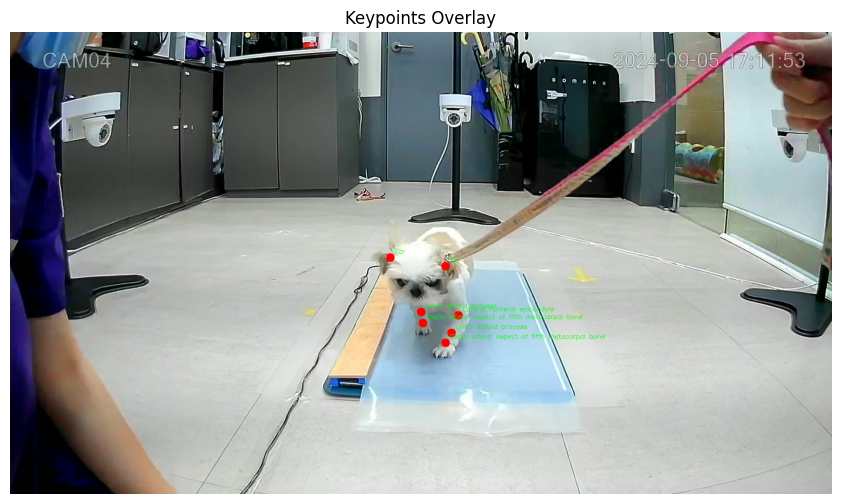

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt

# /content/SNC_2024_09_05_17_11_10_00014.json

# 파일 경로
image_path = "/content/SNC_2024_09_05_17_11_10_00014.jpg"
json_path = "/content/SNC_2024_09_05_17_11_10_00014.json"

# 이미지 불러오기
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR → RGB로 변환

# JSON에서 좌표 추출
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

width, height = map(int, data["image_info"]["resolution"].lower().split("x"))

# 점 그리기
for ann in data["annotation_info"]:
    label = ann["label"]
    x = float(ann["x"]) * width
    y = float(ann["y"]) * height

    cv2.circle(image, (int(x), int(y)), radius=10, color=(255, 0, 0), thickness=-1)
    cv2.putText(image, label, (int(x) + 10, int(y) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Keypoints Overlay")
plt.show()


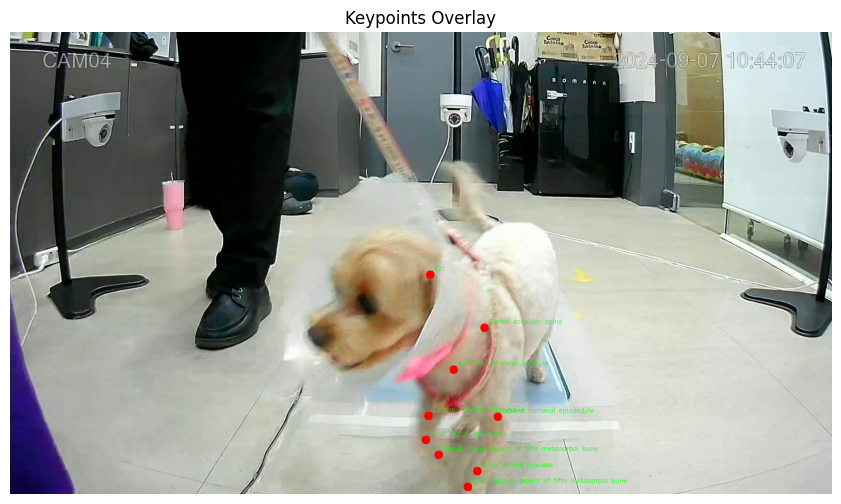

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt

# /content/SNC_2024_09_05_17_11_10_00014.json

# 파일 경로
image_path = "/content/SNC_2024_09_07_10_43_00_00015.jpg"
json_path = "/content/SNC_2024_09_07_10_43_00_00015.json"

# 이미지 불러오기
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR → RGB로 변환

# JSON에서 좌표 추출
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

width, height = map(int, data["image_info"]["resolution"].lower().split("x"))

# 점 그리기
for ann in data["annotation_info"]:
    label = ann["label"]
    x = float(ann["x"]) * width
    y = float(ann["y"]) * height

    cv2.circle(image, (int(x), int(y)), radius=10, color=(255, 0, 0), thickness=-1)
    cv2.putText(image, label, (int(x) + 10, int(y) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Keypoints Overlay")
plt.show()


# 아예 train 폴더에서 랜덤으로 선택해서 좌표 시각화 잘 성공하는지 확인해보기


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/pet_bone/train/
# /content/drive/MyDrive/Colab Notebooks/pet_bone/label/

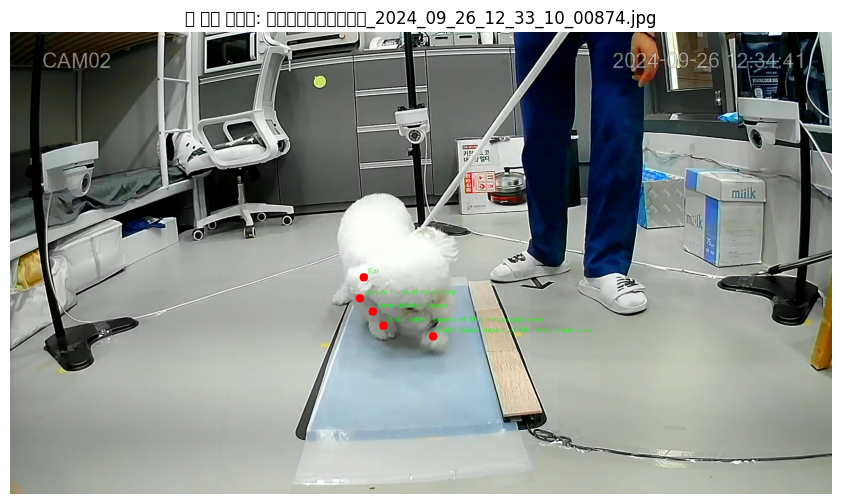

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import random
from pathlib import Path

# 경로 설정
img_dir = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/train")
json_dir = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/label")

# 이미지 파일 불러오기
img_files = list(img_dir.glob("*.jpg")) + list(img_dir.glob("*.jpeg")) + list(img_dir.glob("*.png"))

# 예외 처리
if not img_files:
    raise FileNotFoundError("❗ 이미지 파일이 존재하지 않습니다.")

# 랜덤 이미지 선택
random_img = random.choice(img_files)
json_file = json_dir / f"{random_img.stem}.json"

# 이미지 로드
image = cv2.imread(str(random_img))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# JSON 로드
with open(json_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# 해상도 정보
width, height = map(int, data["image_info"]["resolution"].lower().split("x"))

# annotation_info로부터 keypoint 시각화
for ann in data["annotation_info"]:
    label = ann["label"]
    x = float(ann["x"]) * width
    y = float(ann["y"]) * height
    cv2.circle(image, (int(x), int(y)), radius=10, color=(255, 0, 0), thickness=-1)
    cv2.putText(image, label, (int(x) + 10, int(y) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 결과 출력
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"📸 랜덤 이미지: {random_img.name}")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4366 (\N{HANGUL CHOSEONG CHIEUCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4357 (\N{HANGUL CHOSEONG RIEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4461 (\N{HANGUL JUNGSEONG YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4358 (\N{HANGUL CHOSEONG MIEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

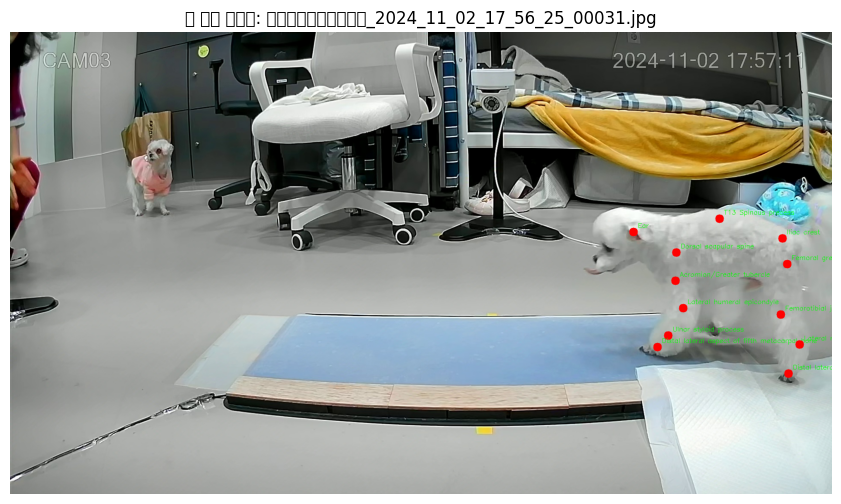

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import random
from pathlib import Path

# 경로 설정
img_dir = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/train")
json_dir = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/label")

# 이미지 파일 불러오기
img_files = list(img_dir.glob("*.jpg")) + list(img_dir.glob("*.jpeg")) + list(img_dir.glob("*.png"))

# 예외 처리
if not img_files:
    raise FileNotFoundError("❗ 이미지 파일이 존재하지 않습니다.")

# 랜덤 이미지 선택
random_img = random.choice(img_files)
json_file = json_dir / f"{random_img.stem}.json"

# 이미지 로드
image = cv2.imread(str(random_img))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# JSON 로드
with open(json_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# 해상도 정보
width, height = map(int, data["image_info"]["resolution"].lower().split("x"))

# annotation_info로부터 keypoint 시각화
for ann in data["annotation_info"]:
    label = ann["label"]
    x = float(ann["x"]) * width
    y = float(ann["y"]) * height
    cv2.circle(image, (int(x), int(y)), radius=10, color=(255, 0, 0), thickness=-1)
    cv2.putText(image, label, (int(x) + 10, int(y) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 결과 출력
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"📸 랜덤 이미지: {random_img.name}")
plt.show()


# side 폴더에서 랜덤 선택 후 시각화

In [ ]:
from pathlib import Path

img_dir = Path("/content/side_치료멍멍/train")

jpg_files = list(img_dir.glob("*.jpg"))

print("📂 JPG 파일 목록:")
for file in jpg_files:
    print(file.name)

📂 JPG 파일 목록:
치료멍멍_2024_11_23_10_26_35_00540.jpg
치료멍멍_2024_11_09_16_25_00_00131.jpg
치료멍멍_2024_11_28_15_14_10_00165.jpg
치료멍멍_2024_10_21_12_18_05_00085.jpg
치료멍멍_2024_10_13_15_35_40_00060.jpg
치료멍멍_2024_10_05_14_17_00_00086.jpg
치료멍멍_2024_10_13_15_35_40_00241.jpg
치료멍멍_2024_11_05_18_13_15_00316.jpg
치료멍멍_2024_10_30_11_01_00_00125.jpg
치료멍멍_2024_10_03_21_48_40_00272.jpg
치료멍멍_2024_10_07_16_08_32_00054.jpg
치료멍멍_2024_10_19_10_13_00_00085.jpg
치료멍멍_2024_09_30_10_57_33_00235.jpg
치료멍멍_2024_10_15_17_20_30_01032.jpg
치료멍멍_2024_10_30_10_54_03_00074.jpg
치료멍멍_2024_11_05_15_58_26_00134.jpg
치료멍멍_2024_10_07_10_29_20_00256.jpg
치료멍멍_2024_12_01_11_59_12_00020.jpg
치료멍멍_2024_11_04_14_25_13_00200.jpg
치료멍멍_2024_11_07_15_12_33_00210.jpg
치료멍멍_2024_10_25_10_27_30_00502.jpg
치료멍멍_2024_10_05_14_17_00_00237.jpg
치료멍멍_2024_10_12_18_07_30_00030.jpg
치료멍멍_2024_09_30_14_13_35_00226.jpg
치료멍멍_2024_10_25_10_27_30_00505.jpg
치료멍멍_2024_10_25_10_27_30_00303.jpg
치료멍멍_2024_11_19_12_24_49_00056.jpg
치료멍멍_2024_11_04_11_24_38_00693.jpg
치료멍멍_20

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/pet_bone/label/

In [ ]:
import shutil
from pathlib import Path

# Source and destination directories
source_json_dir = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/label")
destination_json_dir = Path("/content/side_치료멍멍/label")

# Create destination directory if it doesn't exist
destination_json_dir.mkdir(parents=True, exist_ok=True)

# List of filenames to copy (from the previous cell's output)
filenames_to_copy = [
    "치료멍멍_2024_11_23_10_26_35_00540.jpg",
    "치료멍멍_2024_11_09_16_25_00_00131.jpg",
    "치료멍멍_2024_11_28_15_14_10_00165.jpg",
    "치료멍멍_2024_10_21_12_18_05_00085.jpg",
    "치료멍멍_2024_10_13_15_35_40_00060.jpg",
    "치료멍멍_2024_10_05_14_17_00_00086.jpg",
    "치료멍멍_2024_10_13_15_35_40_00241.jpg",
    "치료멍멍_2024_11_05_18_13_15_00316.jpg",
    "치료멍멍_2024_10_30_11_01_00_00125.jpg",
    "치료멍멍_2024_10_03_21_48_40_00272.jpg",
    "치료멍멍_2024_10_07_16_08_32_00054.jpg",
    "치료멍멍_2024_10_19_10_13_00_00085.jpg",
    "치료멍멍_2024_09_30_10_57_33_00235.jpg",
    "치료멍멍_2024_10_15_17_20_30_01032.jpg",
    "치료멍멍_2024_10_30_10_54_03_00074.jpg",
    "치료멍멍_2024_11_05_15_58_26_00134.jpg",
    "치료멍멍_2024_10_07_10_29_20_00256.jpg",
    "치료멍멍_2024_12_01_11_59_12_00020.jpg",
    "치료멍멍_2024_11_04_14_25_13_00200.jpg",
    "치료멍멍_2024_11_07_15_12_33_00210.jpg",
    "치료멍멍_2024_10_25_10_27_30_00502.jpg",
    "치료멍멍_2024_10_05_14_17_00_00237.jpg",
    "치료멍멍_2024_10_12_18_07_30_00030.jpg",
    "치료멍멍_2024_09_30_14_13_35_00226.jpg",
    "치료멍멍_2024_10_25_10_27_30_00505.jpg",
    "치료멍멍_2024_10_25_10_27_30_00303.jpg",
    "치료멍멍_2024_11_19_12_24_49_00056.jpg",
    "치료멍멍_2024_11_04_11_24_38_00693.jpg",
    "치료멍멍_2024_10_24_18_20_28_00480.jpg",
    "치료멍멍_2024_10_04_14_04_05_00286.jpg",
    "치료멍멍_2024_11_15_16_21_02_00192.jpg",
    "치료멍멍_2024_10_25_11_29_10_00148.jpg",
    "치료멍멍_2024_10_12_10_49_00_00398.jpg",
    "치료멍멍_2024_10_12_10_49_00_00154.jpg",
    "치료멍멍_2024_11_28_15_14_10_00044.jpg",
    "치료멍멍_2024_10_06_10_41_04_00003.jpg",
    "치료멍멍_2024_10_28_17_41_28_00063.jpg",
    "치료멍멍_2024_11_05_18_08_37_00123.jpg",
    "치료멍멍_2024_11_14_11_53_36_00068.jpg",
    "치료멍멍_2024_10_10_14_31_25_00020.jpg",
    "치료멍멍_2024_10_10_12_49_52_00018.jpg",
    "치료멍멍_2024_10_10_09_45_46_00030.jpg",
    "치료멍멍_2024_10_10_15_39_35_00134.jpg",
    "치료멍멍_2024_11_14_15_59_00_00103.jpg",
    "치료멍멍_2024_10_01_14_18_00_00144.jpg",
    "치료멍멍_2024_11_05_18_08_37_00114.jpg",
    "치료멍멍_2024_11_08_14_39_45_00490.jpg",
    "치료멍멍_2024_10_30_12_08_15_00078.jpg",
    "치료멍멍_2024_11_05_15_53_20_00139.jpg",
    "치료멍멍_2024_11_21_11_56_50_00251.jpg",
    "치료멍멍_2024_11_19_14_20_32_00159.jpg",
    "치료멍멍_2024_11_08_14_39_45_00159.jpg",
    "치료멍멍_2024_11_19_10_12_00_00123.jpg",
    "치료멍멍_2024_10_15_17_20_30_00845.jpg",
    "치료멍멍_2024_10_10_14_50_40_00171.jpg",
    "치료멍멍_2024_10_16_16_38_10_00269.jpg",
    "치료멍멍_2024_10_16_16_38_10_00162.jpg",
    "치료멍멍_2024_09_30_10_57_33_00033.jpg",
    "치료멍멍_2024_10_17_10_11_25_00311.jpg",
    "치료멍멍_2024_10_07_18_12_55_00098.jpg",
    "치료멍멍_2024_11_09_10_33_20_00242.jpg",
    "치료멍멍_2024_10_21_12_18_05_00104.jpg",
    "치료멍멍_2024_10_10_12_20_42_00161.jpg",
    "치료멍멍_2024_10_01_10_37_19_00044.jpg",
    "치료멍멍_2024_09_30_14_13_35_00102.jpg",
    "치료멍멍_2024_10_17_10_11_25_00116.jpg",
    "치료멍멍_2024_11_08_14_39_45_00516.jpg",
    "치료멍멍_2024_11_19_10_39_11_00004.jpg",
    "치료멍멍_2024_10_07_18_12_55_00097.jpg",
    "치료멍멍_2024_09_30_14_13_35_00129.jpg",
    "치료멍멍_2024_10_14_15_06_45_00028.jpg",
    "치료멍멍_2024_11_19_12_36_55_00036.jpg",
    "치료멍멍_2024_11_17_10_19_48_00031.jpg",
    "치료멍멍_2024_10_16_16_38_10_00091.jpg",
    "치료멍멍_2024_09_29_14_16_20_00013.jpg",
    "치료멍멍_2024_11_05_15_55_35_00044.jpg",
    "치료멍멍_2024_11_25_16_01_11_00028.jpg",
    "치료멍멍_2024_10_05_14_17_00_00059.jpg",
    "치료멍멍_2024_11_14_15_33_10_00010.jpg",
    "치료멍멍_2024_10_08_15_36_32_00044.jpg",
    "치료멍멍_2024_11_16_17_17_07_00619.jpg",
    "치료멍멍_2024_10_24_11_18_30_00135.jpg",
    "치료멍멍_2024_11_16_17_17_07_00334.jpg",
    "치료멍멍_2024_10_10_12_31_23_00057.jpg",
    "치료멍멍_2024_11_19_10_12_00_00174.jpg",
    "치료멍멍_2024_11_16_12_07_40_00070.jpg",
    "치료멍멍_2024_11_14_15_33_10_00007.jpg",
    "치료멍멍_2024_10_14_14_51_15_00141.jpg",
    "치료멍멍_2024_11_17_10_19_48_00048.jpg",
    "치료멍멍_2024_10_07_18_12_55_00100.jpg",
    "치료멍멍_2024_10_03_21_48_40_00397.jpg",
    "치료멍멍_2024_10_28_16_37_50_00142.jpg",
    "치료멍멍_2024_11_16_14_07_34_00099.jpg",
    "치료멍멍_2024_10_13_12_15_10_00155.jpg",
    "치료멍멍_2024_10_24_16_24_31_00015.jpg",
    "치료멍멍_2024_10_19_18_24_15_00250.jpg",
    "치료멍멍_2024_10_01_14_18_00_00139.jpg",
    "치료멍멍_2024_10_01_10_46_15_00164.jpg",
    "치료멍멍_2024_10_10_15_39_35_00088.jpg",
    "치료멍멍_2024_11_21_14_24_11_00184.jpg",
    "치료멍멍_2024_10_04_12_08_00_00545.jpg",
    "치료멍멍_2024_09_29_12_12_25_00024.jpg",
    "치료멍멍_2024_10_12_10_22_52_00121.jpg",
    "치료멍멍_2024_12_03_15_47_48_00077.jpg",
    "치료멍멍_2024_10_21_10_33_50_00031.jpg",
    "치료멍멍_2024_11_05_18_13_15_00005.jpg",
    "치료멍멍_2024_10_05_14_17_00_00134.jpg",
    "치료멍멍_2024_10_01_10_41_10_00107.jpg",
    "치료멍멍_2024_10_17_09_51_30_00141.jpg",
    "치료멍멍_2024_11_14_15_59_00_00249.jpg",
    "치료멍멍_2024_10_10_10_06_50_00124.jpg",
    "치료멍멍_2024_11_02_17_56_25_00031.jpg",
    "치료멍멍_2024_11_29_10_11_14_00053.jpg",
    "치료멍멍_2024_10_28_17_41_28_00027.jpg",
    "치료멍멍_2024_10_14_14_45_42_00018.jpg",
]

copied_count = 0
for filename in filenames_to_copy:
    # Assuming the JSON file has the same base name as the image file but with a .json extension
    json_filename = Path(filename).with_suffix(".json").name
    source_path = source_json_dir / json_filename
    destination_path = destination_json_dir / json_filename

    if source_path.exists():
        shutil.copy(source_path, destination_path)
        copied_count += 1
    else:
        print(f"⚠️ JSON file not found for {filename}: {source_path}")

print(f"✅ {copied_count}개 JSON 파일 복사 완료")

✅ 115개 JSON 파일 복사 완료


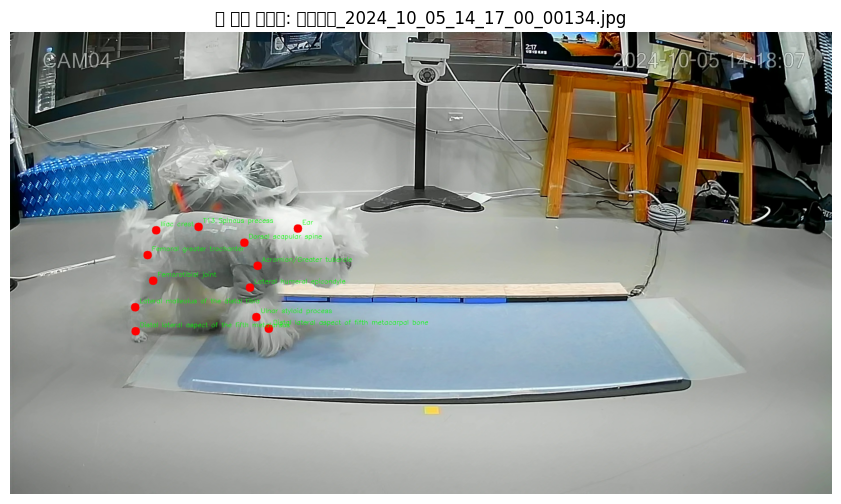

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import random
from pathlib import Path

# 경로 설정
img_dir = Path("/content/side_치료멍멍/train")
json_dir = Path("/content/side_치료멍멍/label")

# 이미지 파일 불러오기
img_files = list(img_dir.glob("*.jpg")) + list(img_dir.glob("*.jpeg")) + list(img_dir.glob("*.png"))

# 예외 처리
if not img_files:
    raise FileNotFoundError("❗ 이미지 파일이 존재하지 않습니다.")

# 랜덤 이미지 선택
random_img = random.choice(img_files)
json_file = json_dir / f"{random_img.stem}.json"

# 이미지 로드
image = cv2.imread(str(random_img))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# JSON 로드
with open(json_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# 해상도 정보
width, height = map(int, data["image_info"]["resolution"].lower().split("x"))

# annotation_info로부터 keypoint 시각화
for ann in data["annotation_info"]:
    label = ann["label"]
    x = float(ann["x"]) * width
    y = float(ann["y"]) * height
    cv2.circle(image, (int(x), int(y)), radius=10, color=(255, 0, 0), thickness=-1)
    cv2.putText(image, label, (int(x) + 10, int(y) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 결과 출력
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"📸 랜덤 이미지: {random_img.name}")
plt.show()


# side 폴더에서 train과 valid 분할 후 학습시켜보기

In [ ]:
/content/side_치료멍멍/label
/content/side_치료멍멍/train

In [ ]:
from pathlib import Path

img_dir = Path("/content/side_치료멍멍/train")

# Find and delete JSON files
json_files_to_delete = list(img_dir.glob("*.json"))

deleted_count = 0
for json_file in json_files_to_delete:
    try:
        json_file.unlink()
        deleted_count += 1
    except Exception as e:
        print(f"⚠️ Error deleting {json_file}: {e}")

print(f"✅ Deleted {deleted_count} JSON files from {img_dir}")

✅ Deleted 115 JSON files from /content/side_치료멍멍/train


In [ ]:
import shutil
from pathlib import Path

source_dir = Path("/content/side_치료멍멍")
destination_dir = Path("/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy")

try:
    shutil.copytree(source_dir, destination_dir)
    print(f"✅ Directory copied from {source_dir} to {destination_dir}")
except FileExistsError:
    print(f"⚠️ Destination directory {destination_dir} already exists.")
except Exception as e:
    print(f"⚠️ An error occurred during copying: {e}")

✅ Directory copied from /content/side_치료멍멍 to /content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy


In [ ]:
import shutil
import random
from pathlib import Path

# ✅ 원본 경로 설정
img_dir = Path("/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/train")
label_dir = Path("/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/label")

# ✅ 출력 디렉토리 구성
base_output = Path("/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/side_yolodata")
train_img = base_output / "images/train"
val_img = base_output / "images/val"
train_lbl = base_output / "labels/train"
val_lbl = base_output / "labels/val"

# 디렉토리 생성
for d in [train_img, val_img, train_lbl, val_lbl]:
    d.mkdir(parents=True, exist_ok=True)

# ✅ 이미지 리스트 섞고 분할
image_files = list(img_dir.glob("*.jpg"))
random.seed(42)
random.shuffle(image_files)
split_ratio = 0.8
split_idx = int(len(image_files) * split_ratio)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# ✅ 이미지와 라벨 함께 복사
def copy_pair(image_list, img_dst, lbl_dst):
    for img_path in image_list:
        lbl_path = label_dir / (img_path.stem + ".txt")
        if not lbl_path.exists():
            continue
        shutil.copy(img_path, img_dst / img_path.name)
        shutil.copy(lbl_path, lbl_dst / lbl_path.name)

copy_pair(train_files, train_img, train_lbl)
copy_pair(val_files, val_img, val_lbl)

print(f"✅ 이미지 분할 완료: train={len(train_files)}개, val={len(val_files)}개")


✅ 이미지 분할 완료: train=92개, val=23개


In [ ]:
from pathlib import Path

yaml_content = """
path: /content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/side_yolodata
train: images/train
val: images/val

nc: 2
names: ["소형견", "중형견"]

kpt_shape: [12, 3]
"""

yaml_path = Path("/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/side_dataset.yaml")
yaml_path.write_text(yaml_content.strip(), encoding="utf-8")

print(f"✅ side_dataset.yaml 생성 완료 → {yaml_path}")

✅ side_dataset.yaml 생성 완료 → /content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/side_dataset.yaml


# side 폴더를 학습 시켜보기

In [ ]:
!pip install ultralytics --upgrade -q

In [ ]:
# 파일명이 길어서 학습이 되지 않는 듯

In [ ]:
from ultralytics import YOLO

# 사전학습된 Pose 모델 불러오기
model = YOLO("yolov8n-pose.pt")

# 학습 실행
model.train(
    data="/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/side_dataset.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model",
    batch=16
)


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/side_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

FileNotFoundError: [34m[1mtrain: [0mError loading data from /content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/side_yolodata/images/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.

# 경로 단축해서 다시 학습 시도

In [ ]:
import shutil
import random
from pathlib import Path

# ✅ 원본 경로 설정
img_dir = Path("/content/side_치료멍멍/train")
label_dir = Path("/content/side_치료멍멍/label")

# ✅ 출력 디렉토리 구성
base_output = Path("/content/side_yolodata")
train_img = base_output / "images/train"
val_img = base_output / "images/val"
train_lbl = base_output / "labels/train"
val_lbl = base_output / "labels/val"

# 디렉토리 생성
for d in [train_img, val_img, train_lbl, val_lbl]:
    d.mkdir(parents=True, exist_ok=True)

# ✅ 이미지 리스트 섞고 분할
image_files = list(img_dir.glob("*.jpg"))
random.seed(42)
random.shuffle(image_files)
split_ratio = 0.8
split_idx = int(len(image_files) * split_ratio)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# ✅ 이미지와 라벨 함께 복사
def copy_pair(image_list, img_dst, lbl_dst):
    for img_path in image_list:
        lbl_path = label_dir / (img_path.stem + ".txt")
        if not lbl_path.exists():
            continue
        shutil.copy(img_path, img_dst / img_path.name)
        shutil.copy(lbl_path, lbl_dst / lbl_path.name)

copy_pair(train_files, train_img, train_lbl)
copy_pair(val_files, val_img, val_lbl)

print(f"✅ 이미지 분할 완료: train={len(train_files)}개, val={len(val_files)}개")


✅ 이미지 분할 완료: train=92개, val=23개


In [ ]:
from pathlib import Path

yaml_content = """
path: /content/side_yolodata
train: images/train
val: images/val

nc: 2
names: ["소형견", "중형견"]

kpt_shape: [12, 3]
"""

yaml_path = Path("/content/side_yolodata/side_dataset.yaml")
yaml_path.write_text(yaml_content.strip(), encoding="utf-8")

print(f"✅ side_dataset.yaml 생성 완료 → {yaml_path}")

✅ side_dataset.yaml 생성 완료 → /content/side_yolodata/side_dataset.yaml


In [ ]:
from ultralytics import YOLO

# 사전학습된 Pose 모델 불러오기
model = YOLO("yolov8n-pose.pt")

# 학습 실행
model.train(
    data="/content/side_yolodata/side_dataset.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model",
    batch=16
)


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/side_yolodata/side_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

FileNotFoundError: [34m[1mtrain: [0mError loading data from /content/side_yolodata/images/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy/label

In [ ]:
import shutil
from pathlib import Path

source_dir = Path("/content/side_치료멍멍")
destination_dir = Path("/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy2")

try:
    shutil.copytree(source_dir, destination_dir)
    print(f"✅ Directory copied from {source_dir} to {destination_dir}")
except FileExistsError:
    print(f"⚠️ Destination directory {destination_dir} already exists.")
except Exception as e:
    print(f"⚠️ An error occurred during copying: {e}")

✅ Directory copied from /content/side_치료멍멍 to /content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy2


In [ ]:
import json
import os
from collections import defaultdict

# JSON이 저장된 폴더 경로
json_folder = "/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy2/label"

# 결과 저장용: key = keypoint 개수, value = 파일 개수
keypoint_distribution = defaultdict(int)

# 파일 개수 세기
total_files = 0

# 모든 .json 파일 순회
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(json_folder, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            keypoints = data.get("annotation_info", [])
            count = len(keypoints)
            keypoint_distribution[count] += 1
            total_files += 1
        except Exception as e:
            print(f"⚠️ 오류 발생: {filename} → {e}")

# 결과 출력
print(f"✅ 총 파일 수: {total_files}")
print(f"📊 Keypoint 개수별 파일 분포:")

for count in sorted(keypoint_distribution.keys()):
    print(f"  - {count}개 keypoint: {keypoint_distribution[count]}개 파일")


✅ 총 파일 수: 115
📊 Keypoint 개수별 파일 분포:
  - 11개 keypoint: 2개 파일
  - 12개 keypoint: 111개 파일
  - 13개 keypoint: 2개 파일


In [ ]:
import json
import os
from collections import defaultdict

# JSON이 저장된 폴더 경로
json_folder = "/content/drive/MyDrive/Colab Notebooks/side_healbow_copy2/label"

# 결과 저장용
keypoint_distribution = defaultdict(int)
keypoint_11_files = []  # 🔍 keypoint 11개 파일 목록
total_files = 0

# 모든 .json 파일 순회
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(json_folder, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            keypoints = data.get("annotation_info", [])
            count = len(keypoints)
            keypoint_distribution[count] += 1
            total_files += 1

            if count == 11:
                keypoint_11_files.append(filename)  # 🔍 11개인 경우 저장

        except Exception as e:
            print(f"⚠️ 오류 발생: {filename} → {e}")

# 결과 출력
print(f"\n✅ 총 파일 수: {total_files}")
print(f"📊 Keypoint 개수별 파일 분포:")
for count in sorted(keypoint_distribution.keys()):
    print(f"  - {count}개 keypoint: {keypoint_distribution[count]}개 파일")

# 11개 keypoint 파일 출력
if keypoint_11_files:
    print(f"\n🔎 Keypoint가 11개인 파일 수: {len(keypoint_11_files)}개")
    for fname in keypoint_11_files:
        print(f"  - {fname}")
else:
    print("\n✅ Keypoint가 11개인 파일은 없습니다.")



✅ 총 파일 수: 115
📊 Keypoint 개수별 파일 분포:
  - 11개 keypoint: 2개 파일
  - 12개 keypoint: 111개 파일
  - 13개 keypoint: 2개 파일

🔎 Keypoint가 11개인 파일 수: 2개
  - 치료멍멍_2024_10_25_11_29_10_00148.json
  - 치료멍멍_2024_10_21_12_18_05_00104.json


In [ ]:
우선 # /content/side_healbow2/ 을 # /content/side_healbow3 폴더로 복사본 만들어

In [ ]:
# /content/drive/MyDrive

In [ ]:
import shutil
from pathlib import Path

source_dir = Path("/content/side_healbow3")
destination_dir = Path("/content/drive/MyDrive/side_healbow3")

try:
    shutil.copytree(source_dir, destination_dir)
    print(f"✅ Directory copied from {source_dir} to {destination_dir}")
except FileExistsError:
    print(f"⚠️ Destination directory {destination_dir} already exists.")
except Exception as e:
    print(f"⚠️ An error occurred during copying: {e}")

✅ Directory copied from /content/side_healbow3 to /content/drive/MyDrive/side_healbow3


In [ ]:
# /content/side_healbow2/images/train
# /content/side_healbow2/images/val

해당 폴더의 파일명에 치료멍멍 을 healbow로 바꿔줘
예시 치료멍멍_2024_10_25_11_29_10_00148.json -> healbow_2024_10_25_11_29_10_00148.json


# 0801 저녁 작업 -> 파일명 변경 실패

In [ ]:
from pathlib import Path

# 대상 디렉토리 목록
folders = [
    "/content/side_healbow3/images/train",
    "/content/side_healbow3/images/val"
]

# 포함할 확장자
valid_exts = [".jpg", ".jpeg", ".png"]

for folder in folders:
    folder_path = Path(folder)
    for file in folder_path.iterdir():
        if file.suffix.lower() in valid_exts and "치료멍멍" in file.stem:
            new_stem = file.stem.replace("치료멍멍", "healbow")
            new_file = file.with_name(new_stem + file.suffix)
            file.rename(new_file)
            print(f"✅ 변경됨: {file.name} → {new_file.name}")

print("\n🎉 완료: 파일명 변경 작업이 끝났습니다.")



🎉 완료: 파일명 변경 작업이 끝났습니다.


In [ ]:
import json
import os
from collections import defaultdict
# /content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy2/label
# JSON 파일이 저장된 폴더 경로
json_folder = "/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy2/label"

# label 분포 저장용: key = label명, value = 등장 횟수
label_distribution = defaultdict(int)

# 파일 개수 세기
total_files = 0

# 모든 JSON 파일 순회
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(json_folder, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            annotations = data.get("annotation_info", [])
            for ann in annotations:
                label = ann.get("label", "UNKNOWN")
                label_distribution[label] += 1
            total_files += 1
        except Exception as e:
            print(f"⚠️ 오류 발생: {filename} → {e}")

# 결과 출력
print(f"✅ 총 파일 수: {total_files}")
print(f"🏷️ 전체 label 종류 및 등장 횟수:")

for label, count in sorted(label_distribution.items(), key=lambda x: -x[1]):
    print(f"  - {label}: {count}회")


✅ 총 파일 수: 115
🏷️ 전체 label 종류 및 등장 횟수:
  - Ear: 116회
  - Ulnar styloid process: 115회
  - Lateral humeral epicondyle: 115회
  - Acromion/Greater tubercle: 115회
  - Dorsal scapular spine: 115회
  - T13 Spinous precess: 115회
  - Iliac crest: 115회
  - Femoral greater trochanter: 115회
  - Distal lateral aspect of the fifth metatarsus: 115회
  - Femorotibial joint: 115회
  - Lateral malleolus of the distal tibia: 115회
  - Distal lateral aspect of fifth metacarpal bone: 114회


In [ ]:
import json
import os
from collections import defaultdict, Counter

# JSON 폴더 경로
json_folder = "/content/drive/MyDrive/Colab Notebooks/side_치료멍멍_copy2/label"

# 순서 집계
order_counter = Counter()
order_examples = defaultdict(list)

# 최대 몇 개 파일까지 예시 출력할지
example_limit = 3

for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(json_folder, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            annotations = data.get("annotation_info", [])
            labels_in_order = tuple([ann["label"] for ann in annotations])
            order_counter[labels_in_order] += 1
            if len(order_examples[labels_in_order]) < example_limit:
                order_examples[labels_in_order].append(filename)
        except Exception as e:
            print(f"⚠️ 오류 발생: {filename} → {e}")

# 결과 출력
print(f"🔎 발견된 라벨 순서 종류 수: {len(order_counter)}\n")

for i, (label_order, count) in enumerate(order_counter.most_common()):
    print(f"📌 순서 {i+1} (총 {count}개 파일):")
    for idx, label in enumerate(label_order):
        print(f"  [{idx}] {label}")
    print(f"  예시 파일: {order_examples[label_order]}\n")


🔎 발견된 라벨 순서 종류 수: 24

📌 순서 1 (총 76개 파일):
  [0] Ear
  [1] T13 Spinous precess
  [2] Dorsal scapular spine
  [3] Acromion/Greater tubercle
  [4] Lateral humeral epicondyle
  [5] Ulnar styloid process
  [6] Distal lateral aspect of fifth metacarpal bone
  [7] Iliac crest
  [8] Femoral greater trochanter
  [9] Femorotibial joint
  [10] Lateral malleolus of the distal tibia
  [11] Distal lateral aspect of the fifth metatarsus
  예시 파일: ['치료멍멍_2024_12_03_15_47_48_00077.json', '치료멍멍_2024_10_06_10_41_04_00003.json', '치료멍멍_2024_11_28_15_14_10_00044.json']

📌 순서 2 (총 9개 파일):
  [0] Ear
  [1] Dorsal scapular spine
  [2] Acromion/Greater tubercle
  [3] Lateral humeral epicondyle
  [4] Ulnar styloid process
  [5] Distal lateral aspect of fifth metacarpal bone
  [6] T13 Spinous precess
  [7] Iliac crest
  [8] Femoral greater trochanter
  [9] Femorotibial joint
  [10] Lateral malleolus of the distal tibia
  [11] Distal lateral aspect of the fifth metatarsus
  예시 파일: ['치료멍멍_2024_

# 강아지 측면 데이터로 훈련하기 - 데이터 분할

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/side_healbow_copy2

In [ ]:
/content/drive/MyDrive/Colab Notebooks/side_healbow_copy2 경로 밑에 train과 label 폴더에 각각 이미지와 json 파일이 있는데 훈련과 검증 데이터 분할을 해야하는데,
분할한 결과값을 /conent/side_healbow2 폴더에다가 만들어줘

In [ ]:
import shutil
import random
from pathlib import Path

# ✅ 원본 경로 설정
img_dir = Path("/content/drive/MyDrive/Colab Notebooks/side_healbow_copy2/train")
label_dir = Path("/content/drive/MyDrive/Colab Notebooks/side_healbow_copy2/label")

# ✅ 출력 디렉토리 구성
base_output = Path("/content/side_healbow2")
train_img = base_output / "images/train"
val_img = base_output / "images/val"
train_lbl = base_output / "labels/train"
val_lbl = base_output / "labels/val"

# 디렉토리 생성
for d in [train_img, val_img, train_lbl, val_lbl]:
    d.mkdir(parents=True, exist_ok=True)

# ✅ 이미지 리스트 섞고 분할
image_files = list(img_dir.glob("*.jpg"))
random.seed(42)
random.shuffle(image_files)
split_ratio = 0.8
split_idx = int(len(image_files) * split_ratio)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# ✅ 이미지와 라벨 함께 복사
def copy_pair(image_list, img_dst, lbl_dst):
    for img_path in image_list:
        lbl_path = label_dir / (img_path.stem + ".json") # Assuming labels are .json
        if not lbl_path.exists():
            print(f"⚠️ Warning: Label file not found for {img_path.name}")
            continue
        shutil.copy(img_path, img_dst / img_path.name)
        shutil.copy(lbl_path, lbl_dst / lbl_path.name)

copy_pair(train_files, train_img, train_lbl)
copy_pair(val_files, val_img, val_lbl)

print(f"✅ 이미지 분할 완료: train={len(train_files)}개, val={len(val_files)}개")

✅ 이미지 분할 완료: train=92개, val=23개


In [ ]:
from pathlib import Path

yaml_content = """
path: /content/side_healbow2
train: images/train
val: images/val

nc: 2
names: ["소형견", "중형견"]

kpt_shape: [12, 3]
"""

yaml_path = Path("/content/side_healbow2/side_healbow.yaml")
yaml_path.write_text(yaml_content.strip(), encoding="utf-8")

print(f"✅ side_dataset.yaml 생성 완료 → {yaml_path}")

✅ side_dataset.yaml 생성 완료 → /content/side_healbow2/side_healbow.yaml


In [ ]:
from pathlib import Path
import json

json_path = Path("/content/side_healbow3/labels_json/train/heal_2024_09_30_10_57_33_00033.json")
# C:\Users\SBA\Downloads\side_healbow4\labels_json\train\heal_2024_09_30_10_57_33_00033.json
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

with open(json_path, encoding="utf-8") as f:
    data = json.load(f)

found_labels = set([ann["label"] for ann in data.get("annotation_info", [])])
missing = [label for label in KEYPOINT_ORDER if label not in found_labels]

print("✅ 라벨링된 keypoint:", sorted(found_labels))
print("❌ 누락된 keypoint:", missing)


✅ 라벨링된 keypoint: ['Acromion/Greater tubercle', 'Distal lateral aspect of fifth metacarpal bone', 'Distal lateral aspect of the fifth metatarsus', 'Dorsal scapular spine', 'Ear', 'Femoral greater trochanter', 'Femorotibial joint', 'Iliac crest', 'Lateral humeral epicondyle', 'Lateral malleolus of the distal tibia', 'T13 Spinous precess', 'Ulnar styloid process']
❌ 누락된 keypoint: []


# 0801 저녁 문제점 yolo.txt 파일 앞의 bbox가 전부 0000으로 표기되고, json 파일에 bbox 정보 누락 = keypoint 기준으로 bbox 추론해야하는 상황

In [ ]:
# 파일 하나로 시범 테스트 => 성공, keypoint 좌표 값 기준으로 bbox 크기 예측해서 생성해줌
from pathlib import Path
import json

# ✅ YOLO keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# ✅ 견종을 class로 매핑
SIZE_TO_CLASS = {
    "소형견": 0,
    "중형견": 1
}

# ✅ bbox 자동 계산
def compute_bbox_from_keypoints(kps):
    xs = [kps[i] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    ys = [kps[i+1] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    if not xs or not ys:
        return 0, 0, 0, 0
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return x_center, y_center, width, height

# ✅ 변환 실행
json_path = Path("/content/side_healbow3/labels_json/train/heal_2024_09_30_10_57_33_00033.json")
output_txt_dir = Path("/content/side_healbow3/")
output_txt_dir.mkdir(parents=True, exist_ok=True)

with open(json_path, encoding="utf-8") as f:
    data = json.load(f)

size_label = data.get("size", "")
class_id = SIZE_TO_CLASS.get(size_label, 0)

# keypoint 좌표 수집
label_to_coords = {}
for ann in data.get("annotation_info", []):
    label = ann["label"]
    x = float(ann["x"])
    y = float(ann["y"])
    if label not in label_to_coords:
        label_to_coords[label] = (x, y)

keypoints = []
for label in KEYPOINT_ORDER:
    if label in label_to_coords:
        x, y = label_to_coords[label]
        v = 2
    else:
        x, y, v = 0.0, 0.0, 0
    keypoints.extend([x, y, v])

# bbox 계산
x_center, y_center, width, height = compute_bbox_from_keypoints(keypoints)

# YOLO 포맷 구성
yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f} " + \
            " ".join(f"{v:.6f}" for v in keypoints)

# 저장
output_path = output_txt_dir / (json_path.stem + ".txt")
with open(output_path, "w", encoding="utf-8") as f:
    f.write(yolo_line + "\n")

print(f"✅ 변환 완료: {output_path}")


✅ 변환 완료: /content/side_healbow3/heal_2024_09_30_10_57_33_00033.txt


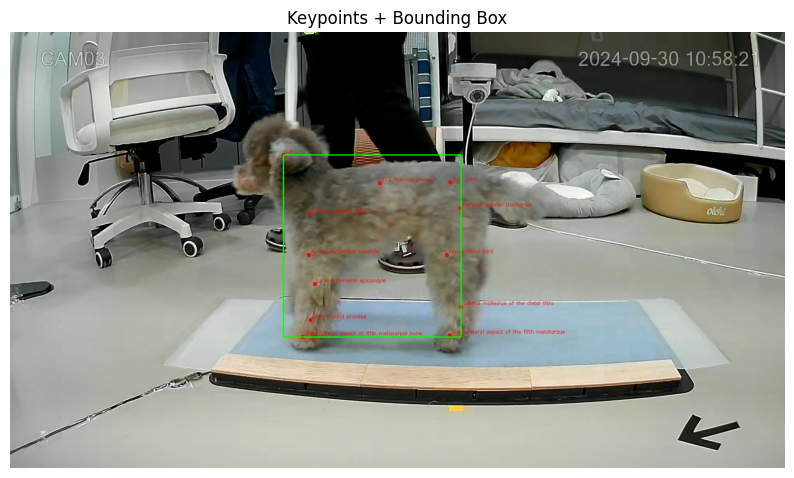

In [ ]:
# 파일 1개 - keypoint 좌표 기준으로 bbox 시각화
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import json

# 경로 설정
image_path = "/content/side_healbow3/images/train/heal_2024_09_30_10_57_33_00033.jpg"
json_path = "/content/side_healbow3/labels_json/train/heal_2024_09_30_10_57_33_00033.json"

# 이미지 로드
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

# JSON 로드
with open(json_path, encoding="utf-8") as f:
    data = json.load(f)

# keypoint 추출
label_to_coords = {}
for ann in data.get("annotation_info", []):
    label = ann["label"]
    x = float(ann["x"])
    y = float(ann["y"])
    label_to_coords[label] = (x, y)

# keypoint 그리기
for label, (x, y) in label_to_coords.items():
    cx = int(x * w)
    cy = int(y * h)
    cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)
    cv2.putText(image, label, (cx + 5, cy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

# bbox 계산
def compute_bbox_from_keypoints(kps):
    xs = [kps[i] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    ys = [kps[i+1] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    if not xs or not ys:
        return 0, 0, 0, 0
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return x_center, y_center, width, height

# keypoints 정렬
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

keypoints = []
for label in KEYPOINT_ORDER:
    if label in label_to_coords:
        x, y = label_to_coords[label]
        v = 2
    else:
        x, y, v = 0.0, 0.0, 0
    keypoints.extend([x, y, v])

# bbox 좌표 계산 및 그리기
x_center, y_center, width, height = compute_bbox_from_keypoints(keypoints)
x_center *= w
y_center *= h
width *= w
height *= h

x1 = int(x_center - width / 2)
y1 = int(y_center - height / 2)
x2 = int(x_center + width / 2)
y2 = int(y_center + height / 2)

cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 시각화 출력
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Keypoints + Bounding Box")
plt.show()


In [ ]:
# 바운딩 박스 크기 클리기
from pathlib import Path
import json

# ✅ YOLO keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# ✅ 견종을 class로 매핑
SIZE_TO_CLASS = {
    "소형견": 0,
    "중형견": 1
}

# ✅ bbox 자동 계산 함수 (with 확장)
def compute_bbox_from_keypoints(kps, scale=1.2):
    xs = [kps[i] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    ys = [kps[i+1] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    if not xs or not ys:
        return 0, 0, 0, 0
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = (x_max - x_min) * scale
    height = (y_max - y_min) * scale
    return x_center, y_center, width, height

# ✅ JSON → YOLO txt 변환 함수
def convert_json_to_yolo(json_file_path, output_txt_dir, scale=1.2):
    with open(json_file_path, encoding="utf-8") as f:
        data = json.load(f)

    size_label = data.get("size", "")
    class_id = SIZE_TO_CLASS.get(size_label, 0)

    # keypoint 좌표 수집
    label_to_coords = {}
    for ann in data.get("annotation_info", []):
        label = ann["label"]
        x = float(ann["x"])
        y = float(ann["y"])
        label_to_coords[label] = (x, y)

    keypoints = []
    for label in KEYPOINT_ORDER:
        if label in label_to_coords:
            x, y = label_to_coords[label]
            v = 2
        else:
            x, y, v = 0.0, 0.0, 0
        keypoints.extend([x, y, v])

    # bbox 계산 및 확장
    x_center, y_center, width, height = compute_bbox_from_keypoints(keypoints, scale)

    # YOLO 포맷 구성
    yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f} " + \
                " ".join(f"{v:.6f}" for v in keypoints)

    # 저장 경로
    output_path = output_txt_dir / (json_file_path.stem + ".txt")
    output_txt_dir.mkdir(parents=True, exist_ok=True)

    with open(output_path, "w", encoding="utf-8") as f:
        f.write(yolo_line + "\n")

    print(f"✅ 변환 완료: {output_path}")

# ✅ 실제 실행
json_path = Path("/content/side_healbow3/labels_json/train/heal_2024_09_30_10_57_33_00033.json")
output_txt_dir = Path("/content/side_healbow3/")

convert_json_to_yolo(json_path, output_txt_dir, scale=1.2)  # ← scale 조정 가능


✅ 변환 완료: /content/side_healbow3/heal_2024_09_30_10_57_33_00033.txt


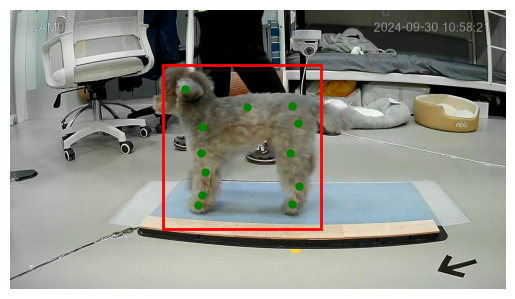

In [ ]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# ✅ YOLO keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# ✅ bbox 자동 계산 (크기 scale 조절)
def compute_bbox_from_keypoints(kps, scale=1.2):
    xs = [kps[i] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    ys = [kps[i+1] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    if not xs or not ys:
        return 0, 0, 0, 0
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = (x_max - x_min) * scale
    height = (y_max - y_min) * scale
    return x_center, y_center, width, height

# ✅ 시각화
def visualize_bbox_and_keypoints(image_path, keypoints, bbox):
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # bbox (YOLO format → pixel 좌표 변환)
    x_center, y_center, width, height = bbox
    x_center *= w
    y_center *= h
    width *= w
    height *= h

    x_min = x_center - width / 2
    y_min = y_center - height / 2

    rect = patches.Rectangle((x_min, y_min), width, height,
                             linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # keypoints
    for i in range(0, len(keypoints), 3):
        x, y, v = keypoints[i], keypoints[i+1], keypoints[i+2]
        if v > 0:
            ax.plot(x * w, y * h, 'go', markersize=5)

    plt.axis('off')
    plt.show()

# ✅ 파일 경로
json_path = Path("/content/side_healbow3/labels_json/train/heal_2024_09_30_10_57_33_00033.json")
image_path = Path("/content/side_healbow3/images/train/heal_2024_09_30_10_57_33_00033.jpg")

# ✅ JSON 로드
with open(json_path, encoding="utf-8") as f:
    data = json.load(f)

# keypoint 수집
label_to_coords = {}
for ann in data.get("annotation_info", []):
    label = ann["label"]
    x = float(ann["x"])
    y = float(ann["y"])
    if label not in label_to_coords:
        label_to_coords[label] = (x, y)

keypoints = []
for label in KEYPOINT_ORDER:
    if label in label_to_coords:
        x, y = label_to_coords[label]
        v = 2
    else:
        x, y, v = 0.0, 0.0, 0
    keypoints.extend([x, y, v])

# ✅ bbox 계산 및 시각화
bbox = compute_bbox_from_keypoints(keypoints, scale=1.4)  # ← 여기서 크기 조절 가능 (1.2 → 더 크게)
visualize_bbox_and_keypoints(image_path, keypoints, bbox)


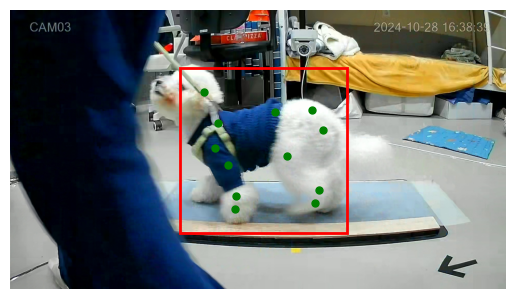

In [ ]:
# 랜덤으로 시각화해보기 - bbox
import json
import random
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# ✅ YOLO keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# ✅ bbox 자동 계산
def compute_bbox_from_keypoints(kps, scale=1.2):
    xs = [kps[i] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    ys = [kps[i+1] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    if not xs or not ys:
        return 0, 0, 0, 0
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = (x_max - x_min) * scale
    height = (y_max - y_min) * scale
    return x_center, y_center, width, height

# ✅ 시각화 함수
def visualize_bbox_and_keypoints(image_path, keypoints, bbox):
    image = cv2.imread(str(image_path))
    if image is None:
        print(f"⚠️ 이미지 로드 실패: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # bbox 그리기
    x_center, y_center, width, height = bbox
    x_center *= w
    y_center *= h
    width *= w
    height *= h
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # keypoints 그리기
    for i in range(0, len(keypoints), 3):
        x, y, v = keypoints[i], keypoints[i+1], keypoints[i+2]
        if v > 0:
            ax.plot(x * w, y * h, 'go', markersize=5)

    plt.axis('off')
    plt.show()

# ✅ 폴더 설정
image_dir = Path("/content/side_healbow3/images/train")
json_dir = Path("/content/side_healbow3/labels_json/train")

# ✅ 랜덤 파일 선택
json_files = list(json_dir.glob("*.json"))
if not json_files:
    print("❌ JSON 파일이 없습니다.")
else:
    json_path = random.choice(json_files)
    stem = json_path.stem
    image_path = image_dir / f"{stem}.jpg"

    # ✅ JSON 로드 및 keypoint 추출
    with open(json_path, encoding="utf-8") as f:
        data = json.load(f)

    label_to_coords = {}
    for ann in data.get("annotation_info", []):
        label = ann["label"]
        x = float(ann["x"])
        y = float(ann["y"])
        if label not in label_to_coords:
            label_to_coords[label] = (x, y)

    keypoints = []
    for label in KEYPOINT_ORDER:
        if label in label_to_coords:
            x, y = label_to_coords[label]
            v = 2
        else:
            x, y, v = 0.0, 0.0, 0
        keypoints.extend([x, y, v])

    # ✅ bbox 계산 및 시각화
    bbox = compute_bbox_from_keypoints(keypoints, scale=1.4)
    visualize_bbox_and_keypoints(image_path, keypoints, bbox)


In [ ]:
import json
from pathlib import Path

# ✅ YOLO keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# ✅ 견종을 class로 매핑
SIZE_TO_CLASS = {
    "소형견": 0,
    "중형견": 1
}

# ✅ bbox 자동 계산
def compute_bbox_from_keypoints(kps, scale=1.2):
    xs = [kps[i] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    ys = [kps[i+1] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    if not xs or not ys:
        return 0, 0, 0, 0
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = (x_max - x_min) * scale
    height = (y_max - y_min) * scale
    return x_center, y_center, width, height

# ✅ 경로 설정
json_root = Path("/content/side_healbow3/labels_json/train")
txt_output_root = Path("/content/side_healbow3/labels_text/train")
txt_output_root.mkdir(parents=True, exist_ok=True)

# ✅ 변환 루프
converted = 0
for json_file in json_root.glob("*.json"):
    try:
        with open(json_file, encoding="utf-8") as f:
            data = json.load(f)

        size_label = data.get("size", "")
        class_id = SIZE_TO_CLASS.get(size_label, 0)

        # keypoint 좌표 수집
        label_to_coords = {}
        for ann in data.get("annotation_info", []):
            label = ann["label"]
            x = float(ann["x"])
            y = float(ann["y"])
            if label not in label_to_coords:
                label_to_coords[label] = (x, y)

        keypoints = []
        for label in KEYPOINT_ORDER:
            if label in label_to_coords:
                x, y = label_to_coords[label]
                v = 2
            else:
                x, y, v = 0.0, 0.0, 0
            keypoints.extend([x, y, v])

        # bbox 계산
        x_center, y_center, width, height = compute_bbox_from_keypoints(keypoints, scale=1.2)

        # YOLO 포맷
        yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f} " + \
                    " ".join(f"{v:.6f}" for v in keypoints)

        # 저장
        output_path = txt_output_root / (json_file.stem + ".txt")
        with open(output_path, "w", encoding="utf-8") as fw:
            fw.write(yolo_line + "\n")

        converted += 1

    except Exception as e:
        print(f"⚠️ 오류 발생: {json_file.name} → {e}")

print(f"✅ 변환 완료: 총 {converted}개 파일 변환됨")


✅ 변환 완료: 총 92개 파일 변환됨


In [ ]:
import json
from pathlib import Path

# ✅ YOLO keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# ✅ 견종을 class로 매핑
SIZE_TO_CLASS = {
    "소형견": 0,
    "중형견": 1
}

# ✅ bbox 자동 계산
def compute_bbox_from_keypoints(kps, scale=1.2):
    xs = [kps[i] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    ys = [kps[i+1] for i in range(0, len(kps), 3) if kps[i+2] > 0]
    if not xs or not ys:
        return 0, 0, 0, 0
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = (x_max - x_min) * scale
    height = (y_max - y_min) * scale
    return x_center, y_center, width, height

# ✅ 경로 설정
json_root = Path("/content/side_healbow3/labels_json/val")
txt_output_root = Path("/content/side_healbow3/labels_text/val")
txt_output_root.mkdir(parents=True, exist_ok=True)

# ✅ 변환 루프
converted = 0
for json_file in json_root.glob("*.json"):
    try:
        with open(json_file, encoding="utf-8") as f:
            data = json.load(f)

        size_label = data.get("size", "")
        class_id = SIZE_TO_CLASS.get(size_label, 0)

        # keypoint 좌표 수집
        label_to_coords = {}
        for ann in data.get("annotation_info", []):
            label = ann["label"]
            x = float(ann["x"])
            y = float(ann["y"])
            if label not in label_to_coords:
                label_to_coords[label] = (x, y)

        keypoints = []
        for label in KEYPOINT_ORDER:
            if label in label_to_coords:
                x, y = label_to_coords[label]
                v = 2
            else:
                x, y, v = 0.0, 0.0, 0
            keypoints.extend([x, y, v])

        # bbox 계산
        x_center, y_center, width, height = compute_bbox_from_keypoints(keypoints, scale=1.2)

        # YOLO 포맷
        yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f} " + \
                    " ".join(f"{v:.6f}" for v in keypoints)

        # 저장
        output_path = txt_output_root / (json_file.stem + ".txt")
        with open(output_path, "w", encoding="utf-8") as fw:
            fw.write(yolo_line + "\n")

        converted += 1

    except Exception as e:
        print(f"⚠️ 오류 발생: {json_file.name} → {e}")

print(f"✅ 변환 완료: 총 {converted}개 파일 변환됨")


✅ 변환 완료: 총 23개 파일 변환됨


# 새 섹션

In [ ]:
# /content/side_healbow3 를 /content/drive/MyDrive/side_healbow5 로 복사해줘

✅ Directory copied from /content/side_healbow3 to /content/drive/MyDrive/side_healbow6


# 0801 저녁, keypoint 기반 bbox 생성 후 txt 파일 완료, 시각화 확인, 모델 학습 성공

In [ ]:
from ultralytics import YOLO

# 사전학습된 Pose 모델 불러오기
model = YOLO("yolov8n-pose.pt")
# /content/side_healbow2/side_healbow.yaml
# 학습 실행
model.train(
    data="/content/side_healbow3/side_healbow.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model",
    batch=16
)


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/side_healbow3/side_healbow.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

train: Scanning /content/side_healbow3/labels/train... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 1481.72it/s]

train: New cache created: /content/side_healbow3/labels/train.cache
WARNING ⚠️ No 'flip_idx' array defined in data.yaml, disabling 'fliplr' and 'flipud' augmentations.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2605.3±627.2 MB/s, size: 394.7 KB)



val: Scanning /content/side_healbow3/labels/val... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 1495.02it/s]

val: New cache created: /content/side_healbow3/labels/val.cache
Plotting labels to runs/pose/train_pose_model2/labels.jpg... 



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 44204 (\N{HANGUL SYLLABLE GYEON}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultra

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train_pose_model2
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/70         0G      1.848      10.38     0.7093      3.492      1.901         24        640: 100%|██████████| 6/6 [01:46<00:00, 17.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

                   all         23         23      0.468      0.459      0.461      0.207          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/70         0G      1.384      10.12     0.7093      2.305      1.513         36        640: 100%|██████████| 6/6 [01:28<00:00, 14.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]

                   all         23         23      0.866      0.957      0.982      0.555          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/70         0G      1.312      9.688      0.707      1.683      1.349         23        640: 100%|██████████| 6/6 [01:29<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.64s/it]

                   all         23         23      0.938          1      0.993      0.612          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/70         0G      1.239       9.11     0.6965      1.477      1.308         25        640: 100%|██████████| 6/6 [01:32<00:00, 15.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         23         23      0.935          1      0.995      0.665          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/70         0G      1.158      8.668     0.6891      1.407      1.248         25        640: 100%|██████████| 6/6 [01:27<00:00, 14.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]

                   all         23         23      0.996          1      0.995      0.667          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/70         0G      1.136      8.162     0.6793      1.335       1.23         23        640: 100%|██████████| 6/6 [01:29<00:00, 14.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         23         23      0.957          1      0.995      0.668          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/70         0G      1.103      7.806     0.6566      1.343      1.202         25        640: 100%|██████████| 6/6 [01:30<00:00, 15.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]

                   all         23         23      0.941          1      0.995      0.591          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/70         0G      1.036      7.365     0.6492      1.107      1.176         25        640: 100%|██████████| 6/6 [01:27<00:00, 14.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.63s/it]

                   all         23         23      0.946          1      0.995      0.694          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/70         0G      1.049      7.308     0.6342      1.095      1.151         30        640: 100%|██████████| 6/6 [01:29<00:00, 14.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]

                   all         23         23      0.985          1      0.995      0.643          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/70         0G     0.9288      6.912     0.6094      1.017      1.063         35        640:  67%|██████▋   | 4/6 [01:17<00:38, 19.47s/it]


KeyboardInterrupt: 

In [ ]:
# bbox 예측은 잘 하지만 pose는 전혀 학습 불가
YOLOv8에서는 bbox가 필수지만, keypoint는 kpt_label로 분리된 yaml 구성이 핵심
- 좌우 대칭 학습을 위한 flip_idx 추가하기

path: /content/side_healbow3
train: images/train
val: images/val

nc: 2
names: ["소형견", "중형견"]

kpt_shape: [12, 3]
flip_idx: [[1, 4], [2, 6], [3, 7], [5, 8], [9, 10]]


flip_idx는 좌우 대칭이 있는 keypoint를 지정하는 index 쌍 리스트입니다.

YOLOv8 Pose에서는 fliplr(좌우 뒤집기) augmentation을 사용할 때,
예를 들어 "왼쪽 귀"가 "오른쪽 귀"로 바뀌도록 keypoint index 쌍을 알려줘야 합니다.

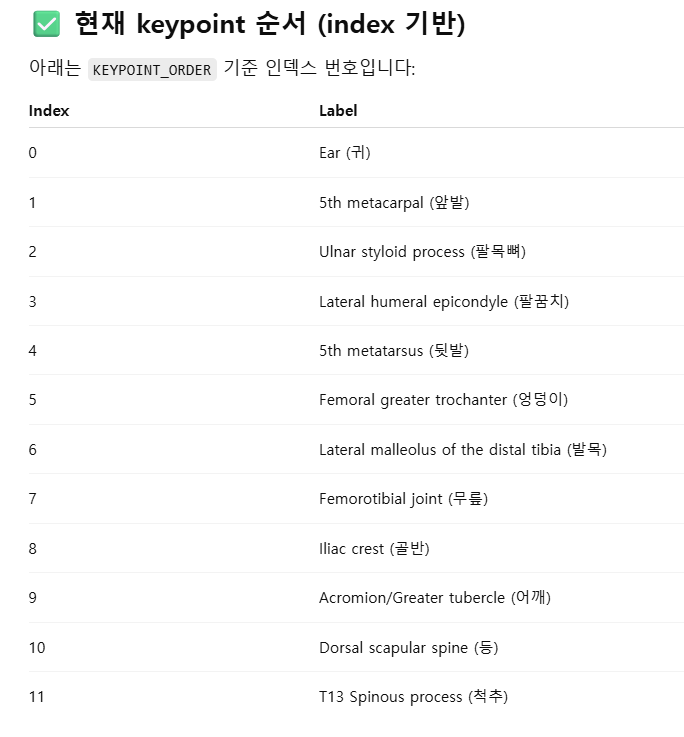

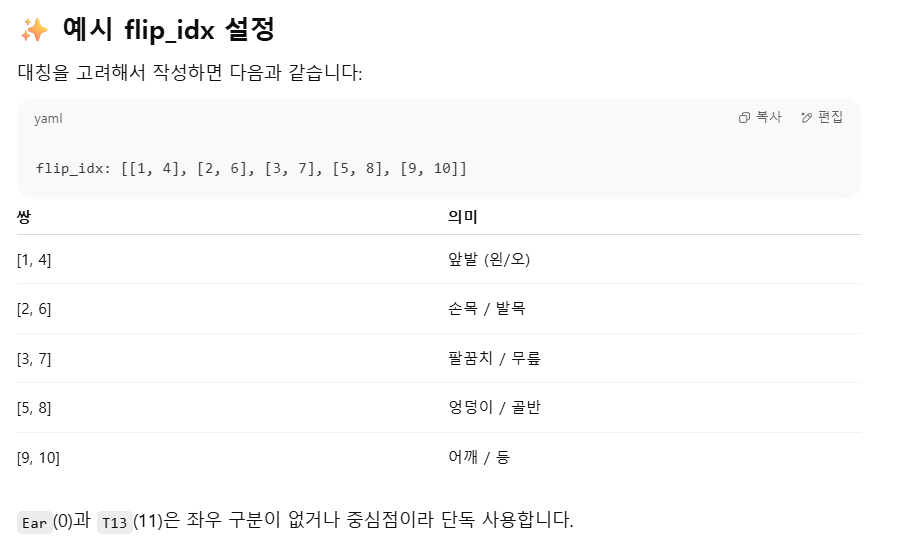

In [ ]:
# /content/side_healbow3

In [ ]:
# GPU로 연산 수행

In [ ]:
import shutil
from pathlib import Path

destination_dir = Path("/content/side_healbow3")
source_dir = Path("/content/drive/MyDrive/side_healbow6")

try:
    shutil.copytree(source_dir, destination_dir)
    print(f"✅ Directory copied from {source_dir} to {destination_dir}")
except FileExistsError:
    print(f"⚠️ Destination directory {destination_dir} already exists.")
except Exception as e:
    print(f"⚠️ An error occurred during copying: {e}")

✅ Directory copied from /content/drive/MyDrive/side_healbow6 to /content/side_healbow3


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# 기존에 추가했던 FLIP_IDX를 아래와 같이 교체해서 학습
path: /content/side_healbow3
train: images/train
val: images/val

nc: 2
names: ["소형견", "중형견"]

kpt_shape: [12, 3]
flip_idx: [0, 4, 6, 5, 1, 3, 2, 8, 7, 10, 9, 11]

In [ ]:
# flip_idx 추가 후 다시 학습시키기

from ultralytics import YOLO

# 사전학습된 Pose 모델 불러오기
model = YOLO("yolov8n-pose.pt")
# /content/side_healbow2/side_healbow.yaml
# 학습 실행
model.train(
    data="/content/side_healbow3/side_healbow.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model",
    batch=16
)


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/side_healbow3/side_healbow.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/side_healbow3/labels/train.cache... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 49.5±11.0 MB/s, size: 394.7 KB)


val: Scanning /content/side_healbow3/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/pose/train_pose_model4/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 44204 (\N{HANGUL SYLLABLE GYEON}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultral

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train_pose_model4
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.16G      1.903      10.45      0.711      3.903      1.979         36        640:  33%|███▎      | 2/6 [00:02<00:04,  1.14s/it]

       1/70      2.16G      1.961      10.42     0.7083      3.897      2.056         36        640:  50%|█████     | 3/6 [00:03<00:02,  1.23it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]
       1/70      2.16G      2.017      10.44     0.7082      3.811      2.028         26        640: 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         23         23      0.236      0.087      0.185     0.0608          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.18G       1.58      10.28     0.7116      2.671      1.666         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         23         23      0.668       0.87      0.881       0.45          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/70       2.2G      1.281      10.04     0.7043      1.944      1.397         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         23         23      0.825       0.87      0.947      0.572          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.21G      1.251      9.552     0.6877      1.513      1.291         28        640: 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         23         23          1      0.998      0.995      0.655          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/70      2.22G      1.181      9.291      0.681      1.315      1.233         31        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         23         23      0.914          1       0.99      0.593          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.22G      1.174       8.75     0.6749      1.314      1.213         24        640: 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         23         23      0.956          1      0.995      0.665          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.22G      1.164      8.798     0.6653      1.224        1.2         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         23         23      0.973      0.957      0.993      0.665          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.22G      1.154      8.648     0.6576      1.195      1.188         29        640: 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         23         23       0.92      0.996       0.98      0.536          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.22G      1.198      8.348     0.6428      1.126      1.215         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         23         23      0.995          1      0.995      0.654          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.23G      1.113       8.12      0.638      1.068      1.165         29        640: 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         23         23      0.915          1      0.992      0.582          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.23G      1.088      8.045     0.6191     0.9678      1.113         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         23         23          1       0.99      0.995      0.571          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.24G      1.082      7.815     0.5924     0.9699      1.116         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         23         23      0.976          1      0.995      0.608          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.25G      1.074      7.863     0.6051     0.9777      1.124         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         23         23          1       0.95      0.992      0.571          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.25G      1.033      7.501     0.5684     0.9459      1.112         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         23         23       0.92          1      0.989      0.595          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.26G      1.093      7.586     0.5701     0.9168       1.15         24        640: 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         23         23       0.92      0.995      0.986      0.534          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.26G      1.018       7.47     0.5554     0.8447      1.108         29        640: 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         23         23          1      0.991      0.995      0.622          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.28G     0.9796      7.307     0.5511     0.8107      1.089         30        640: 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         23         23      0.919      0.991      0.984      0.569          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/70       2.3G      0.966      7.376     0.5468     0.8219      1.068         33        640: 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         23         23      0.996          1      0.995      0.669          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/70       2.3G     0.9128      7.256     0.5439      0.755       1.04         34        640: 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         23         23      0.995          1      0.995      0.673          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.32G     0.8791      6.992     0.5144     0.7225      1.041         25        640: 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         23         23      0.843          1      0.976       0.72          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.32G     0.9483      7.216     0.5359     0.7621      1.062         22        640: 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         23         23      0.879          1      0.972      0.667          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.33G     0.9724      7.039     0.5152      0.853      1.089         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         23         23      0.935          1      0.983      0.641          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.33G     0.8516      6.834     0.4869       0.72      1.019         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         23         23      0.878      0.957      0.948      0.668          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.33G     0.9007      6.841     0.4955     0.7434      1.039         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         23         23      0.942      0.957      0.987      0.716     0.0632     0.0435     0.0035    0.00035



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.33G     0.8869      6.893     0.4913     0.7571      1.023         27        640: 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         23         23      0.983      0.957      0.992      0.673          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.33G      0.827      6.744     0.5081     0.7437      1.013         31        640: 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         23         23      0.991          1      0.995      0.721       0.11      0.087     0.0142     0.0018



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.33G     0.8678      6.585     0.4785      0.705      1.036         22        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         23         23      0.993          1      0.995      0.725     0.0684     0.0435    0.00594   0.000594



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.33G     0.8611      6.336     0.5062     0.6551      1.046         29        640: 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         23         23      0.995          1      0.995      0.709     0.0599     0.0435     0.0093    0.00093



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.33G     0.9263      6.695     0.5033       0.68      1.034         27        640: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         23         23      0.993          1      0.995      0.697          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.33G     0.9126      6.614      0.502     0.7288      1.053         31        640: 100%|██████████| 6/6 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


                   all         23         23      0.992      0.957      0.993      0.645          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.33G     0.9039      6.544     0.4964     0.7107      1.017         26        640: 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         23         23          1      0.994      0.995      0.653       0.13     0.0435     0.0453    0.00453



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.33G     0.8612      6.393      0.523     0.6499      1.007         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         23         23      0.996          1      0.995      0.684     0.0585     0.0435    0.00789   0.000789



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.33G     0.8381      6.122     0.4616      0.629      1.001         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         23         23      0.994          1      0.995       0.67      0.151       0.13     0.0303    0.00303



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.33G     0.7781      6.163     0.4917     0.6343     0.9896         28        640: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         23         23      0.993          1      0.995      0.731      0.109      0.087     0.0136     0.0017



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/70      2.33G     0.9039      6.189     0.5104      0.707      1.064         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         23         23          1      0.995      0.995      0.725      0.218      0.174     0.0874    0.00968



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.33G     0.8149      6.093     0.4922     0.6693      1.023         29        640: 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         23         23      0.957          1      0.995      0.703      0.155       0.13     0.0451    0.00451



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.33G     0.8081      6.094     0.4845     0.6261      1.007         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         23         23          1      0.999      0.995      0.718          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.33G     0.7861      5.963     0.5254       0.64      1.026         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         23         23      0.975          1      0.995      0.731      0.113      0.087     0.0347    0.00347



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.33G      0.761       5.92     0.4734     0.5962     0.9929         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         23         23      0.992          1      0.995      0.747     0.0515     0.0435    0.00683   0.000683



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.33G     0.7617      6.103     0.5196      0.595     0.9867         19        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         23         23          1          1      0.995      0.713       0.18      0.174     0.0675    0.00829



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.33G     0.7455      5.787     0.5199     0.5926      1.003         30        640: 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         23         23      0.997          1      0.995      0.707      0.181      0.174     0.0923     0.0159



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.33G     0.7517       5.74     0.4926     0.5796     0.9687         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         23         23      0.995          1      0.995      0.716      0.514      0.304      0.255     0.0264



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.33G     0.7663      5.889     0.4961     0.6301     0.9817         23        640: 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23         23      0.995          1      0.995      0.722      0.454      0.304      0.259     0.0411



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.33G     0.7927      5.656     0.5013     0.5912          1         24        640: 100%|██████████| 6/6 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         23         23          1      0.994      0.995      0.737      0.367      0.217      0.153     0.0312



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.33G     0.7736       5.83     0.4697     0.6187      1.011         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         23         23          1      0.954      0.995      0.747      0.479      0.304      0.238     0.0431



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.33G     0.6924      5.623     0.4687     0.5754     0.9651         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         23         23          1      0.981      0.995      0.753      0.465      0.435      0.334     0.0577



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/70      2.33G      0.693       5.71     0.4926      0.547     0.9445         21        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         23         23      0.997          1      0.995       0.77      0.462      0.391       0.32     0.0411



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.33G     0.7193      5.842     0.4564      0.549     0.9491         26        640: 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         23         23      0.997          1      0.995      0.748      0.362      0.348      0.194     0.0302



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.33G      0.714       5.73     0.4992     0.5556     0.9739         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         23         23      0.997          1      0.995      0.749        0.4      0.391      0.211     0.0367



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.33G     0.6554      5.441     0.4564     0.5349     0.9324         22        640: 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         23         23      0.997          1      0.995      0.758      0.358      0.348      0.165     0.0211



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.33G     0.6392      5.435     0.4322     0.5325     0.9389         19        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         23         23      0.998          1      0.995      0.789      0.358      0.348      0.151     0.0197



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.33G     0.6334      5.267     0.5056      0.486     0.9513         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         23         23      0.997          1      0.995      0.773      0.448      0.435       0.21     0.0397



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.33G     0.6822      5.451     0.4882     0.5213     0.9704         26        640: 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         23         23      0.997          1      0.995      0.757      0.447      0.435      0.218     0.0483

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.33G     0.6769      5.088     0.4719     0.5341      0.973         32        640: 100%|██████████| 6/6 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         23         23      0.997          1      0.995      0.756      0.404      0.391      0.271     0.0439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.33G      0.718        5.6     0.5078     0.5496     0.9635         23        640: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         23         23      0.997          1      0.995      0.736      0.446      0.391      0.297     0.0487



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.33G     0.6915       5.51     0.5363     0.5756     0.9891         22        640: 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         23         23      0.997          1      0.995      0.764      0.458      0.304      0.217     0.0396



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.33G     0.5918       5.35     0.4455     0.4856     0.9511         26        640: 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         23         23      0.997          1      0.995      0.772      0.473      0.304      0.216     0.0377



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.33G     0.6457      5.462     0.5027     0.5439     0.9533         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         23         23      0.997          1      0.995      0.785      0.532      0.348      0.309     0.0507



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.33G      0.633      5.173      0.524     0.4817      0.969         28        640: 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         23         23      0.997          1      0.995      0.789      0.518      0.348      0.309     0.0495



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.33G     0.6131      5.148     0.4621     0.4907     0.9399         31        640: 100%|██████████| 6/6 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         23         23      0.998          1      0.995      0.769      0.552      0.375      0.374       0.06
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.33G     0.5603      5.146     0.1995     0.5512     0.8936         12        640: 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         23         23      0.998          1      0.995      0.756      0.437      0.348      0.307     0.0573



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.33G     0.5203      4.823     0.2509     0.5019     0.8642         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         23         23      0.999          1      0.995      0.773      0.387      0.348      0.251     0.0436



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.33G     0.5264      4.848     0.2454     0.4672     0.8658         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         23         23          1          1      0.995      0.764      0.433      0.391      0.278     0.0422



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.33G     0.4838      4.795     0.2174     0.4577     0.8661         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         23         23          1      0.999      0.995      0.755      0.438      0.391       0.28     0.0388



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.33G     0.4659      4.819     0.2291     0.4609       0.86         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         23         23          1      0.999      0.995      0.766      0.432      0.391      0.279     0.0331



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.33G     0.5097      4.943     0.2067     0.4661     0.8889         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         23         23      0.999          1      0.995       0.77      0.407      0.391       0.25     0.0351



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.33G     0.4512       4.88     0.2105     0.4497     0.8449         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         23         23      0.999          1      0.995      0.768      0.451      0.435      0.283     0.0384



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.33G     0.4876      4.834     0.2447     0.4433     0.8573         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         23         23      0.998          1      0.995      0.777       0.45      0.435      0.299     0.0478



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.33G     0.4323       4.92     0.2069     0.4044     0.8638         16        640:  50%|█████     | 3/6 [00:00<00:00,  4.04it/s]


KeyboardInterrupt: 

In [ ]:
# 여전히 BOX 탐지만 가능하고, POSE 탐지 불가
# X,Y,V의 V값이 2.0인 경우 1.0으로 교체 필요

import os

label_dir = "/content/side_healbow3/labels/train"
total_keypoints = 0
visible_keypoints = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                keypoints = parts[5:]  # skip class and bbox
                for i in range(0, len(keypoints), 3):
                    total_keypoints += 1
                    if keypoints[i+2] == "1.0":
                        visible_keypoints += 1

print(f"총 keypoint 수: {total_keypoints}")
print(f"visible (1.0) 비율: {visible_keypoints / total_keypoints:.2%}")


총 keypoint 수: 1104
visible (1.0) 비율: 0.00%


In [ ]:
정확하게 보이기 때문에 2가 맞잖아, 왜 POSE 평가 시 V=1인 경우만 계산해?


| v 값 | 의미                      | COCO 평가 포함 여부            |
| --- | ----------------------- | ------------------------ |
| `0` | Not labeled             | ❌ 제외                     |
| `1` | Labeled but not visible | ✅ 포함됨 (가려졌지만 존재함)        |
| `2` | Labeled and visible     | ❌ **평가에서 제외** (훈련에만 사용됨) |

그렇다면 v=2는 왜 학습에만 쓰일까?
v=2는 학습 시에는 모델이 정확한 위치를 예측할 수 있도록 돕기 위해 사용됩니다.

하지만 평가 시에는 객관적으로 "예측했어야 했지만 가려져 있었던 점"이 더 중요하다고 간주되기 때문에 v=1만 대상으로 mAP을 측정합니다.

In [ ]:
# /content/side_healbow3/labels/val

In [ ]:
from pathlib import Path

val_dir = Path("/content/side_healbow3/labels/val")
txt_files = list(val_dir.glob("*.txt"))

for txt_file in txt_files:
    with open(txt_file, "r", encoding="utf-8") as f:
        content = f.read()

    # v=2.0을 v=1.0으로 변경
    modified = content.replace(" 2.000000", " 1.000000")

    with open(txt_file, "w", encoding="utf-8") as f:
        f.write(modified)

print(f"✅ 총 {len(txt_files)}개 파일에서 visibility=2 → 1로 변경 완료")


✅ 총 23개 파일에서 visibility=2 → 1로 변경 완료


In [ ]:
# VALID 데이터의 X,Y,V에서 V를 2.0에서 1.0D으로 변경 후 다시 학습(모델 평가)
# Logging results to runs/pose/train_pose_model5

from ultralytics import YOLO

# 사전학습된 Pose 모델 불러오기
model = YOLO("yolov8n-pose.pt")
# /content/side_healbow2/side_healbow.yaml
# 학습 실행
model.train(
    data="/content/side_healbow3/side_healbow.yaml",
    epochs=70,
    imgsz=640,
    name="train_pose_model",
    batch=16
)


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/side_healbow3/side_healbow.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_pose_model5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

train: Scanning /content/side_healbow3/labels/train.cache... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1358.6±951.4 MB/s, size: 394.7 KB)


val: Scanning /content/side_healbow3/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/pose/train_pose_model5/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 44204 (\N{HANGUL SYLLABLE GYEON}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultral

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train_pose_model5
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/70      4.02G      2.017      10.44     0.7082      3.811      2.028         26        640: 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         23         23      0.236      0.087      0.185     0.0608          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/70      4.02G       1.58      10.28     0.7116      2.671      1.666         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         23         23      0.668       0.87      0.881       0.45          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/70      4.02G      1.281      10.04     0.7043      1.944      1.397         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         23         23      0.825       0.87      0.947      0.572          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/70      4.02G      1.251      9.552     0.6877      1.513      1.291         28        640: 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         23         23          1      0.998      0.995      0.655          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/70      4.02G      1.181      9.291      0.681      1.315      1.233         31        640: 100%|██████████| 6/6 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         23         23      0.914          1       0.99      0.593          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/70      4.02G      1.174       8.75     0.6749      1.314      1.213         24        640: 100%|██████████| 6/6 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         23         23      0.956          1      0.995      0.665          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/70      4.02G      1.164      8.798     0.6653      1.224        1.2         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         23         23      0.973      0.957      0.993      0.665          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/70      4.02G      1.154      8.648     0.6576      1.195      1.188         29        640: 100%|██████████| 6/6 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         23         23       0.92      0.996       0.98      0.536          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/70      4.02G      1.198      8.348     0.6428      1.126      1.215         30        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         23         23      0.995          1      0.995      0.654          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/70      4.02G      1.113       8.12      0.638      1.068      1.165         29        640: 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         23         23      0.915          1      0.992      0.582          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/70      4.02G      1.088      8.045     0.6191     0.9678      1.113         25        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         23         23          1       0.99      0.995      0.571          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/70      4.02G      1.082      7.815     0.5924     0.9699      1.116         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         23         23      0.976          1      0.995      0.608          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/70      4.02G      1.074      7.863     0.6051     0.9777      1.124         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         23         23          1       0.95      0.992      0.571          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/70      4.02G      1.033      7.501     0.5684     0.9459      1.112         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         23         23       0.92          1      0.989      0.595          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/70      4.02G      1.093      7.586     0.5701     0.9168       1.15         24        640: 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         23         23       0.92      0.995      0.986      0.534          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/70      4.02G      1.018       7.47     0.5554     0.8447      1.108         29        640: 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         23         23          1      0.991      0.995      0.622          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/70      4.02G     0.9796      7.307     0.5511     0.8107      1.089         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         23         23      0.919      0.991      0.984      0.569          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/70      4.02G      0.966      7.376     0.5468     0.8219      1.068         33        640: 100%|██████████| 6/6 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         23         23      0.996          1      0.995      0.669          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/70      4.02G     0.9128      7.256     0.5439      0.755       1.04         34        640: 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23         23      0.995          1      0.995      0.673          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/70      4.02G     0.8791      6.992     0.5144     0.7225      1.041         25        640: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         23         23      0.843          1      0.976       0.72          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/70      4.02G     0.9483      7.216     0.5359     0.7621      1.062         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23         23      0.879          1      0.972      0.667          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/70      4.04G     0.9724      7.039     0.5152      0.853      1.089         22        640: 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         23         23      0.935          1      0.983      0.641          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/70      4.04G     0.8516      6.834     0.4869       0.72      1.019         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         23         23      0.878      0.957      0.948      0.668          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/70      4.06G     0.9007      6.841     0.4955     0.7434      1.039         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         23         23      0.942      0.957      0.987      0.716     0.0632     0.0435     0.0035    0.00035



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/70      4.06G     0.8869      6.893     0.4913     0.7571      1.023         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         23         23      0.983      0.957      0.992      0.673          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/70      4.06G      0.827      6.744     0.5081     0.7437      1.013         31        640: 100%|██████████| 6/6 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         23         23      0.991          1      0.995      0.721       0.11      0.087     0.0142     0.0018



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/70      4.06G     0.8678      6.585     0.4785      0.705      1.036         22        640: 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         23         23      0.993          1      0.995      0.725     0.0684     0.0435    0.00594   0.000594



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/70      4.06G     0.8611      6.336     0.5062     0.6551      1.046         29        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         23         23      0.995          1      0.995      0.709     0.0599     0.0435     0.0093    0.00093



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/70      4.06G     0.9263      6.695     0.5033       0.68      1.034         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         23         23      0.993          1      0.995      0.697          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/70      4.06G     0.9126      6.614      0.502     0.7288      1.053         31        640: 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         23         23      0.992      0.957      0.993      0.645          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/70      4.06G     0.9039      6.544     0.4964     0.7107      1.017         26        640: 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         23         23          1      0.994      0.995      0.653       0.13     0.0435     0.0453    0.00453



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/70      4.06G     0.8612      6.393      0.523     0.6499      1.007         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         23         23      0.996          1      0.995      0.684     0.0585     0.0435    0.00789   0.000789



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/70      4.06G     0.8381      6.122     0.4616      0.629      1.001         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         23         23      0.994          1      0.995       0.67      0.151       0.13     0.0303    0.00303



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/70      4.06G     0.7781      6.163     0.4917     0.6343     0.9896         28        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         23         23      0.993          1      0.995      0.731      0.109      0.087     0.0136     0.0017



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/70      4.06G     0.9039      6.189     0.5104      0.707      1.064         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         23         23          1      0.995      0.995      0.725      0.218      0.174     0.0874    0.00968



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/70      4.06G     0.8149      6.093     0.4922     0.6693      1.023         29        640: 100%|██████████| 6/6 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         23         23      0.957          1      0.995      0.703      0.155       0.13     0.0451    0.00451



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/70      4.06G     0.8081      6.094     0.4845     0.6261      1.007         30        640: 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         23         23          1      0.999      0.995      0.718          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/70      4.06G     0.7861      5.963     0.5254       0.64      1.026         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         23         23      0.975          1      0.995      0.731      0.113      0.087     0.0347    0.00347



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/70      4.06G      0.761       5.92     0.4734     0.5962     0.9929         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         23         23      0.992          1      0.995      0.747     0.0515     0.0435    0.00683   0.000683



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/70      4.06G     0.7617      6.103     0.5196      0.595     0.9867         19        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         23         23          1          1      0.995      0.713       0.18      0.174     0.0675    0.00829



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/70      4.06G     0.7455      5.787     0.5199     0.5926      1.003         30        640: 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         23         23      0.997          1      0.995      0.707      0.181      0.174     0.0923     0.0159



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/70      4.06G     0.7517       5.74     0.4926     0.5796     0.9687         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         23         23      0.995          1      0.995      0.716      0.514      0.304      0.255     0.0264



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/70      4.06G     0.7663      5.889     0.4961     0.6301     0.9817         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         23         23      0.995          1      0.995      0.722      0.454      0.304      0.259     0.0411



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/70      4.06G     0.7927      5.656     0.5013     0.5912          1         24        640: 100%|██████████| 6/6 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         23         23          1      0.994      0.995      0.737      0.367      0.217      0.153     0.0312



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/70      4.06G     0.7736       5.83     0.4697     0.6187      1.011         27        640: 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         23         23          1      0.954      0.995      0.747      0.479      0.304      0.238     0.0431



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/70      4.06G     0.6924      5.623     0.4687     0.5754     0.9651         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         23         23          1      0.981      0.995      0.753      0.465      0.435      0.334     0.0577



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/70      4.06G      0.693       5.71     0.4926      0.547     0.9445         21        640: 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23         23      0.997          1      0.995       0.77      0.462      0.391       0.32     0.0411



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/70      4.06G     0.7193      5.842     0.4564      0.549     0.9491         26        640: 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         23         23      0.997          1      0.995      0.748      0.362      0.348      0.194     0.0302



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/70      4.06G      0.714       5.73     0.4992     0.5556     0.9739         25        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         23         23      0.997          1      0.995      0.749        0.4      0.391      0.211     0.0367



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/70      4.06G     0.6554      5.441     0.4564     0.5349     0.9324         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         23         23      0.997          1      0.995      0.758      0.358      0.348      0.165     0.0211



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      51/70      4.06G     0.6392      5.435     0.4322     0.5325     0.9389         19        640: 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         23         23      0.998          1      0.995      0.789      0.358      0.348      0.151     0.0197



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      52/70      4.06G     0.6334      5.267     0.5056      0.486     0.9513         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         23         23      0.997          1      0.995      0.773      0.448      0.435       0.21     0.0397



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      53/70      4.06G     0.6822      5.451     0.4882     0.5213     0.9704         26        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         23         23      0.997          1      0.995      0.757      0.447      0.435      0.218     0.0483



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      54/70      4.06G     0.6769      5.088     0.4719     0.5341      0.973         32        640: 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all         23         23      0.997          1      0.995      0.756      0.404      0.391      0.271     0.0439

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      55/70      4.06G      0.718        5.6     0.5078     0.5496     0.9635         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         23         23      0.997          1      0.995      0.736      0.446      0.391      0.297     0.0487



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      56/70      4.06G     0.6915       5.51     0.5363     0.5756     0.9891         22        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         23         23      0.997          1      0.995      0.764      0.458      0.304      0.217     0.0396



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      57/70      4.06G     0.5918       5.35     0.4455     0.4856     0.9511         26        640: 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         23         23      0.997          1      0.995      0.772      0.473      0.304      0.216     0.0377



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      58/70      4.06G     0.6457      5.462     0.5027     0.5439     0.9533         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         23         23      0.997          1      0.995      0.785      0.532      0.348      0.309     0.0507



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      59/70      4.06G      0.633      5.173      0.524     0.4817      0.969         28        640: 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         23         23      0.997          1      0.995      0.789      0.518      0.348      0.309     0.0495



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      60/70      4.06G     0.6131      5.148     0.4621     0.4907     0.9399         31        640: 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         23         23      0.998          1      0.995      0.769      0.552      0.375      0.374       0.06


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      61/70      4.06G     0.5603      5.146     0.1995     0.5512     0.8936         12        640: 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         23         23      0.998          1      0.995      0.756      0.437      0.348      0.307     0.0573



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      62/70      4.06G     0.5203      4.823     0.2509     0.5019     0.8642         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         23         23      0.999          1      0.995      0.773      0.387      0.348      0.251     0.0436



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      63/70      4.06G     0.5264      4.848     0.2454     0.4672     0.8658         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         23         23          1          1      0.995      0.764      0.433      0.391      0.278     0.0422



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      64/70      4.06G     0.4838      4.795     0.2174     0.4577     0.8661         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         23         23          1      0.999      0.995      0.755      0.438      0.391       0.28     0.0388



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      65/70      4.06G     0.4659      4.819     0.2291     0.4609       0.86         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         23         23          1      0.999      0.995      0.766      0.432      0.391      0.279     0.0331



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      66/70      4.06G     0.5097      4.943     0.2067     0.4661     0.8889         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         23         23      0.999          1      0.995       0.77      0.407      0.391       0.25     0.0351



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      67/70      4.06G     0.4512       4.88     0.2105     0.4497     0.8449         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         23         23      0.999          1      0.995      0.768      0.451      0.435      0.283     0.0384



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      68/70      4.06G     0.4876      4.834     0.2447     0.4433     0.8573         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         23         23      0.998          1      0.995      0.777       0.45      0.435      0.299     0.0478



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      69/70      4.06G     0.4401      4.965     0.1962     0.4226     0.8612         12        640: 100%|██████████| 6/6 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         23         23      0.998          1      0.995      0.778      0.449      0.435       0.32     0.0572



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      70/70      4.06G     0.4488      4.779     0.1924     0.4026     0.8235         12        640: 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         23         23      0.998          1      0.995      0.771      0.451      0.435      0.315     0.0552



70 epochs completed in 0.046 hours.
Optimizer stripped from runs/pose/train_pose_model5/weights/last.pt, 6.6MB
Optimizer stripped from runs/pose/train_pose_model5/weights/best.pt, 6.6MB

Validating runs/pose/train_pose_model5/weights/best.pt...
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-pose summary (fused): 81 layers, 3,190,394 parameters, 0 gradients, 8.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:675: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:675: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:675: UserWarning: Glyph 44204 (\N{HANGUL SYLLABLE GYEON}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:721: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralyti

                   all         23         23      0.997          1      0.995      0.789      0.519      0.348      0.309     0.0495
                   소형견         23         23      0.997          1      0.995      0.789      0.519      0.348      0.309     0.0495
Speed: 0.5ms preprocess, 1.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/pose/train_pose_model5


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa24a87cd50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034, 

# 오늘 모델 훈련한 결과, 박스 탐지 매우 정확, 하지만 포즈 탐지는 개선 여지 필요 - POSE도 나쁘지 않은 상태

In [ ]:
# /content/runs 결과를 /content/drive/MyDrive/side_healbow6 로 복사해줘

In [ ]:
import shutil
from pathlib import Path

source_dir = Path("/content/runs")
destination_dir = Path("/content/drive/MyDrive/side_healbow6/runs")

try:
    shutil.copytree(source_dir, destination_dir)
    print(f"✅ Directory copied from {source_dir} to {destination_dir}")
except FileExistsError:
    print(f"⚠️ Destination directory {destination_dir} already exists.")
except Exception as e:
    print(f"⚠️ An error occurred during copying: {e}")

✅ Directory copied from /content/runs to /content/drive/MyDrive/side_healbow6/runs


In [ ]:
# 각 keypoint 값에 따라 severity와 pet_medical_record_info의 value값을 확인 - 슬개골 탈구 증상 심각도 수준 확인

그러면 현재 소형견과 중형견 분류 박스 탐지 성공했고, keypoint기반 pose도 제대로 인식 한 것은 알겠어,
그런데 pose의 각도에 따라, 슬개골이 있는지 없는지 판단하는 건데, 아래 json파일 내용에서 severity 값과 pet_medical_record_info의 value값에 따라 슬개골 탈구 증상 정도를 파악할 수 있어

# severity 값 추출해서 슬개골 탈구 증상 정도 확인하기 - side 사진 위주

In [ ]:
# /content/drive/MyDrive/side_healbow6/labels_json

In [ ]:
import os
import json
from collections import Counter

# 경로 설정
json_dir = "/content/drive/MyDrive/side_healbow6/labels_json/train"

# severity 값을 저장할 리스트
severity_values = []

# 폴더 내 모든 파일 순회
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(json_dir, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                severity = data.get("severity", None)
                if severity is not None:
                    severity_values.append(severity)
        except Exception as e:
            print(f"❗ {filename}에서 오류 발생: {e}")

# 분포 계산
counter = Counter(severity_values)

# 결과 출력
print("📊 Severity 값 분포:")
for severity, count in sorted(counter.items()):
    print(f"  - Severity {severity}: {count}개")

# 가장 많은 값과 적은 값 확인
if counter:
    most_common = counter.most_common()
    print(f"\n✅ 가장 많은 값: Severity {most_common[0][0]} ({most_common[0][1]}개)")
    print(f"❕ 가장 적은 값: Severity {most_common[-1][0]} ({most_common[-1][1]}개)")
else:
    print("❌ severity 값을 가진 JSON 파일이 없습니다.")


📊 Severity 값 분포:
  - Severity 0: 60개
  - Severity 1: 5개
  - Severity 2: 7개
  - Severity 3: 20개

✅ 가장 많은 값: Severity 0 (60개)
❕ 가장 적은 값: Severity 1 (5개)


# 전체 severity 값 추출해서 슬개골 탈구 증상 정도 확인

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/pet_bone/label

In [ ]:
import os
import json
from collections import Counter

# 경로 설정
json_dir = "/content/drive/MyDrive/Colab Notebooks/pet_bone/label"

# severity 값을 저장할 리스트
severity_values = []

# 폴더 내 모든 파일 순회
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(json_dir, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                severity = data.get("severity", None)
                if severity is not None:
                    severity_values.append(severity)
        except Exception as e:
            print(f"❗ {filename}에서 오류 발생: {e}")

# 분포 계산
counter = Counter(severity_values)

# 결과 출력
print("📊 Severity 값 분포:")
for severity, count in sorted(counter.items()):
    print(f"  - Severity {severity}: {count}개")

# 가장 많은 값과 적은 값 확인
if counter:
    most_common = counter.most_common()
    print(f"\n✅ 가장 많은 값: Severity {most_common[0][0]} ({most_common[0][1]}개)")
    print(f"❕ 가장 적은 값: Severity {most_common[-1][0]} ({most_common[-1][1]}개)")
else:
    print("❌ severity 값을 가진 JSON 파일이 없습니다.")

📊 Severity 값 분포:
  - Severity 0: 596개
  - Severity 1: 89개
  - Severity 2: 142개
  - Severity 3: 197개
  - Severity 4: 26개

✅ 가장 많은 값: Severity 0 (596개)
❕ 가장 적은 값: Severity 4 (26개)


# 0801 오후 20시 한글파일명 -> 모두 영문으로 일괄 변경

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/pet_bone/label
# /content/drive/MyDrive/Colab Notebooks/pet_bone/train
치료 멍멍은 heal
잠실은 jamsil
로 모두 변경


In [ ]:
from pathlib import Path
import unicodedata

# 대상 디렉토리
folder = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/label")

for file in folder.iterdir():
    if file.is_file():
        # 유니코드 정규화
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "치료멍멍" in normalized_name:
            new_normalized_name = normalized_name.replace("치료멍멍", "heal")
            new_path = file.with_name(new_normalized_name)
            file.rename(new_path)
            print(f"✅ 이름 변경: {file.name} → {new_path.name}")

print("\n🎉 이름 변경 작업이 완료되었습니다.")


✅ 이름 변경: 치료멍멍_2024_09_07_11_12_42_00114.json → heal_2024_09_07_11_12_42_00114.json
✅ 이름 변경: 치료멍멍_2024_09_12_15_11_12_00001.json → heal_2024_09_12_15_11_12_00001.json
✅ 이름 변경: 치료멍멍_2024_09_14_14_05_10_00098.json → heal_2024_09_14_14_05_10_00098.json
✅ 이름 변경: 치료멍멍_2024_09_21_10_16_33_00039.json → heal_2024_09_21_10_16_33_00039.json
✅ 이름 변경: 치료멍멍_2024_09_11_12_39_02_00043.json → heal_2024_09_11_12_39_02_00043.json
✅ 이름 변경: 치료멍멍_2024_09_10_14_34_54_00141.json → heal_2024_09_10_14_34_54_00141.json
✅ 이름 변경: 치료멍멍_2024_09_26_10_03_32_00031.json → heal_2024_09_26_10_03_32_00031.json
✅ 이름 변경: 치료멍멍_2024_09_23_16_08_00_00040.json → heal_2024_09_23_16_08_00_00040.json
✅ 이름 변경: 치료멍멍_2024_09_24_10_28_05_00258.json → heal_2024_09_24_10_28_05_00258.json
✅ 이름 변경: 치료멍멍_2024_09_26_12_33_10_00504.json → heal_2024_09_26_12_33_10_00504.json
✅ 이름 변경: 치료멍멍_2024_09_05_17_31_30_00082.json → heal_2024_09_05_17_31_30_00082.json
✅ 이름 변경: 치료멍멍_2

In [ ]:
from pathlib import Path
import os
import unicodedata

# 변경할 폴더 경로
folder = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/label")

# 파일 이름 변경
for file in folder.iterdir():
    if file.is_file():
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "잠실" in normalized_name:
            new_name = normalized_name.replace("잠실", "jamsil")
            src_path = str(file)
            dst_path = str(file.with_name(new_name))
            os.rename(src_path, dst_path)
            print(f"✅ 이름 변경: {file.name} → {new_name}")

print("\n🎉 '잠실' → 'jamsil' 이름 변경 완료!")


✅ 이름 변경: 잠실_2024_09_23_14_09_03_00007.json → jamsil_2024_09_23_14_09_03_00007.json
✅ 이름 변경: 잠실_2024_09_05_15_17_10_00065.json → jamsil_2024_09_05_15_17_10_00065.json
✅ 이름 변경: 잠실_2024_10_09_10_29_20_00100.json → jamsil_2024_10_09_10_29_20_00100.json
✅ 이름 변경: 잠실_2024_09_08_11_11_44_01734.json → jamsil_2024_09_08_11_11_44_01734.json
✅ 이름 변경: 잠실_2024_09_01_15_51_52_00063.json → jamsil_2024_09_01_15_51_52_00063.json
✅ 이름 변경: 잠실_2024_09_08_18_10_40_00116.json → jamsil_2024_09_08_18_10_40_00116.json
✅ 이름 변경: 잠실_2024_10_03_11_18_00_00243.json → jamsil_2024_10_03_11_18_00_00243.json
✅ 이름 변경: 잠실_2024_09_14_15_20_05_00241.json → jamsil_2024_09_14_15_20_05_00241.json
✅ 이름 변경: 잠실_2024_09_08_11_18_30_00086.json → jamsil_2024_09_08_11_18_30_00086.json
✅ 이름 변경: 잠실_2024_10_13_16_07_44_01124.json → jamsil_2024_10_13_16_07_44_01124.json
✅ 이름 변경: 잠실_2024_10_13_16_07_44_00924.json → jamsil_2024_10_13_16_07_44_00924.json
✅ 이름 변경: 잠실_2024_10_14_16_56_44_00082.j

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/pet_bone/train

In [ ]:
from pathlib import Path
import unicodedata

# 대상 디렉토리
folder = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/train")

for file in folder.iterdir():
    if file.is_file():
        # 유니코드 정규화
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "치료멍멍" in normalized_name:
            new_normalized_name = normalized_name.replace("치료멍멍", "heal")
            new_path = file.with_name(new_normalized_name)
            file.rename(new_path)
            print(f"✅ 이름 변경: {file.name} → {new_path.name}")

print("\n🎉 이름 변경 작업이 완료되었습니다.")


✅ 이름 변경: 치료멍멍_2024_09_12_14_29_23_00058.jpg → heal_2024_09_12_14_29_23_00058.jpg
✅ 이름 변경: 치료멍멍_2024_09_15_11_58_00_00019.jpg → heal_2024_09_15_11_58_00_00019.jpg
✅ 이름 변경: 치료멍멍_2024_09_19_12_43_52_00322.jpg → heal_2024_09_19_12_43_52_00322.jpg
✅ 이름 변경: 치료멍멍_2024_09_10_11_07_05_00129.jpg → heal_2024_09_10_11_07_05_00129.jpg
✅ 이름 변경: 치료멍멍_2024_09_15_11_58_00_00119.jpg → heal_2024_09_15_11_58_00_00119.jpg
✅ 이름 변경: 치료멍멍_2024_09_19_12_43_52_00005.jpg → heal_2024_09_19_12_43_52_00005.jpg
✅ 이름 변경: 치료멍멍_2024_09_14_12_50_20_00197.jpg → heal_2024_09_14_12_50_20_00197.jpg
✅ 이름 변경: 치료멍멍_2024_09_23_16_08_00_00026.jpg → heal_2024_09_23_16_08_00_00026.jpg
✅ 이름 변경: 치료멍멍_2024_09_23_16_08_00_00028.jpg → heal_2024_09_23_16_08_00_00028.jpg
✅ 이름 변경: 치료멍멍_2024_09_26_12_33_10_00776.jpg → heal_2024_09_26_12_33_10_00776.jpg
✅ 이름 변경: 치료멍멍_2024_09_19_16_52_00_00018.jpg → heal_2024_09_19_16_52_00_00018.jpg
✅ 이름 변경: 치료멍멍_2024_09_12_15_11_12_000

In [ ]:
from pathlib import Path
import os
import unicodedata

# 변경할 폴더 경로
folder = Path("/content/drive/MyDrive/Colab Notebooks/pet_bone/train")

# 파일 이름 변경
for file in folder.iterdir():
    if file.is_file():
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "잠실" in normalized_name:
            new_name = normalized_name.replace("잠실", "jamsil")
            src_path = str(file)
            dst_path = str(file.with_name(new_name))
            os.rename(src_path, dst_path)
            print(f"✅ 이름 변경: {file.name} → {new_name}")

print("\n🎉 '잠실' → 'jamsil' 이름 변경 완료!")


✅ 이름 변경: 잠실_2024_09_06_11_39_50_00988.jpg → jamsil_2024_09_06_11_39_50_00988.jpg
✅ 이름 변경: 잠실_2024_09_08_11_11_44_01128.jpg → jamsil_2024_09_08_11_11_44_01128.jpg
✅ 이름 변경: 잠실_2024_09_09_14_04_30_00085.jpg → jamsil_2024_09_09_14_04_30_00085.jpg
✅ 이름 변경: 잠실_2024_09_08_17_38_30_00018.jpg → jamsil_2024_09_08_17_38_30_00018.jpg
✅ 이름 변경: 잠실_2024_09_08_14_02_50_00405.jpg → jamsil_2024_09_08_14_02_50_00405.jpg
✅ 이름 변경: 잠실_2024_09_02_18_47_45_00121.jpg → jamsil_2024_09_02_18_47_45_00121.jpg
✅ 이름 변경: 잠실_2024_09_08_11_11_44_01341.jpg → jamsil_2024_09_08_11_11_44_01341.jpg
✅ 이름 변경: 잠실_2024_09_05_18_27_30_00059.jpg → jamsil_2024_09_05_18_27_30_00059.jpg
✅ 이름 변경: 잠실_2024_09_08_11_11_44_01734.jpg → jamsil_2024_09_08_11_11_44_01734.jpg
✅ 이름 변경: 잠실_2024_09_08_11_11_44_03774.jpg → jamsil_2024_09_08_11_11_44_03774.jpg
✅ 이름 변경: 잠실_2024_09_08_11_11_44_00178.jpg → jamsil_2024_09_08_11_11_44_00178.jpg
✅ 이름 변경: 잠실_2024_09_08_11_11_44_02647.jpg → jamsil_2024_09_08

# 클래스 불균형 문제로 - 다중 분류 x, 이중 분류(탈구 o,x 증상 조기 판단)

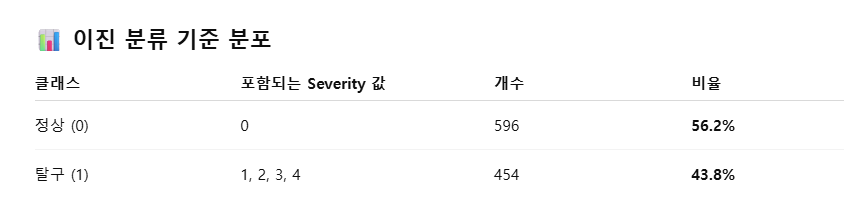

In [ ]:
데이터는 크게 불균형하지는 않음 → 이진 분류에서는 모델이 균형 있게 학습 가능

특히, 탈구 유무만 판단하는 조기 진단 시스템을 만들려는 목적이라면 이진 분류가 실용적입니다.

In [ ]:
🛠️ 팁: 이진 분류 후 단계적 고도화 전략
1단계: 이진 분류로 탈구 유무 판별

2단계: 탈구가 있다면, 해당 sample만 다중 분류 모델로 정밀도 진단 (1~4)

# side 위주로만 클래스 이진 분류 진행 (시범 테스트)

In [ ]:
📊 Severity 값 분포:
  - Severity 0: 60개
  - Severity 1: 5개
  - Severity 2: 7개
  - Severity 3: 20개

✅ 가장 많은 값: Severity 0 (60개)
❕ 가장 적은 값: Severity 1 (5개)

=> 값의 분포 차이
60개 vs 32개

그래서 class 0 비중을 class 1 비중에 맞추기 위해 언더샘플링 혹은 오버샘플링 진행
=> 언더샘플링 진행
60개 중 랜덤으로 32개 선택해서 분류 진행


In [ ]:
# /content/drive/MyDrive/side_healbow6


In [ ]:
import shutil
from pathlib import Path

destination_dir = Path("/content/side_healbow6_bce")
source_dir = Path("/content/drive/MyDrive/side_healbow6")

try:
    shutil.copytree(source_dir, destination_dir)
    print(f"✅ Directory copied from {source_dir} to {destination_dir}")
except FileExistsError:
    print(f"⚠️ Destination directory {destination_dir} already exists.")
except Exception as e:
    print(f"⚠️ An error occurred during copying: {e}")

✅ Directory copied from /content/drive/MyDrive/side_healbow6 to /content/side_healbow6_bce


In [ ]:
# /content/side_healbow6_bce/labels_json/train
# /content/side_healbow6_bce/labels_json/val

In [ ]:
from pathlib import Path
import json
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# JSON 폴더 경로
json_dir = Path("/content/side_healbow6_bce/labels_json/train")

# 데이터 추출
data = []
for file in json_dir.glob("*.json"):
    with open(file, 'r') as f:
        js = json.load(f)
    severity = js.get("severity", None)
    if severity is None:
        continue
    annotation_info = js.get("annotation_info", [])
    if len(annotation_info) != 12:
        continue
    keypoints = []
    for ann in annotation_info:
        x = float(ann["x"])
        y = float(ann["y"])
        keypoints.extend([x, y])
    label = 0 if severity == 0 else 1  # 이진 분류: 0 vs 1+
    data.append(keypoints + [label])

# DataFrame으로 변환
columns = [f"kpt_{i}_{axis}" for i in range(12) for axis in ['x', 'y']] + ["label"]
df = pd.DataFrame(data, columns=columns)

# 언더샘플링 적용
class_0 = df[df["label"] == 0]
class_1 = df[df["label"] == 1]
class_0_sampled = class_0.sample(n=len(class_1), random_state=42)
balanced_df = pd.concat([class_0_sampled, class_1], ignore_index=True)

# 학습용 데이터 분리
X = balanced_df.drop("label", axis=1)
y = balanced_df["label"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_val)
print("🔍 Classification Report:")
print(classification_report(y_val, y_pred))


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.57      0.67      0.62         6

    accuracy                           0.62        13
   macro avg       0.62      0.62      0.62        13
weighted avg       0.62      0.62      0.62        13



In [ ]:
# /content/drive/MyDrive/side_healbow6/runs/pose/train_pose_model5/results.csv

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# side_healbow3에서 치료멍멍을 heal로 바꾸기(파일명)

In [ ]:
# /content/side_healbow3/images/train 에 있는 jpg파일명에서 치료멍멍을 heal로만 바꿔줘

# 한글이 있는 파일명은 유니코드 정규화 후 문자열로 치환하면, 바뀐다.

In [ ]:
# 파일명이 변경되지 않아, 한글명 인식 오류
✅ 해결 방법: 유니코드 정규화 후 문자열 치환
파이썬의 unicodedata.normalize()를 사용해 NFD → NFC 정규화를 먼저 해주면 해결됩니다.


In [ ]:
from pathlib import Path
import unicodedata

# 대상 디렉토리
folder = Path("/content/side_healbow3/images/train")

for file in folder.iterdir():
    if file.is_file():
        # 유니코드 정규화
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "치료멍멍" in normalized_name:
            new_normalized_name = normalized_name.replace("치료멍멍", "heal")
            new_path = file.with_name(new_normalized_name)
            file.rename(new_path)
            print(f"✅ 이름 변경: {file.name} → {new_path.name}")

print("\n🎉 이름 변경 작업이 완료되었습니다.")


✅ 이름 변경: 치료멍멍_2024_10_14_14_45_42_00018.jpg → heal_2024_10_14_14_45_42_00018.jpg
✅ 이름 변경: 치료멍멍_2024_10_01_10_46_15_00164.jpg → heal_2024_10_01_10_46_15_00164.jpg
✅ 이름 변경: 치료멍멍_2024_10_07_18_12_55_00098.jpg → heal_2024_10_07_18_12_55_00098.jpg
✅ 이름 변경: 치료멍멍_2024_11_21_11_56_50_00251.jpg → heal_2024_11_21_11_56_50_00251.jpg
✅ 이름 변경: 치료멍멍_2024_11_14_15_33_10_00007.jpg → heal_2024_11_14_15_33_10_00007.jpg
✅ 이름 변경: 치료멍멍_2024_10_05_14_17_00_00086.jpg → heal_2024_10_05_14_17_00_00086.jpg
✅ 이름 변경: 치료멍멍_2024_10_01_10_41_10_00107.jpg → heal_2024_10_01_10_41_10_00107.jpg
✅ 이름 변경: 치료멍멍_2024_10_10_15_39_35_00088.jpg → heal_2024_10_10_15_39_35_00088.jpg
✅ 이름 변경: 치료멍멍_2024_10_13_15_35_40_00241.jpg → heal_2024_10_13_15_35_40_00241.jpg
✅ 이름 변경: 치료멍멍_2024_10_30_12_08_15_00078.jpg → heal_2024_10_30_12_08_15_00078.jpg
✅ 이름 변경: 치료멍멍_2024_10_12_10_49_00_00154.jpg → heal_2024_10_12_10_49_00_00154.jpg
✅ 이름 변경: 치료멍멍_2024_10_13_12_15_10_001

In [ ]:
from pathlib import Path
import unicodedata

# 대상 디렉토리
folder = Path("/content/side_healbow3/images/val")

for file in folder.iterdir():
    if file.is_file():
        # 유니코드 정규화
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "치료멍멍" in normalized_name:
            new_normalized_name = normalized_name.replace("치료멍멍", "heal")
            new_path = file.with_name(new_normalized_name)
            file.rename(new_path)
            print(f"✅ 이름 변경: {file.name} → {new_path.name}")

print("\n🎉 이름 변경 작업이 완료되었습니다.")


✅ 이름 변경: 치료멍멍_2024_11_19_14_20_32_00159.jpg → heal_2024_11_19_14_20_32_00159.jpg
✅ 이름 변경: 치료멍멍_2024_10_10_10_06_50_00124.jpg → heal_2024_10_10_10_06_50_00124.jpg
✅ 이름 변경: 치료멍멍_2024_10_10_09_45_46_00030.jpg → heal_2024_10_10_09_45_46_00030.jpg
✅ 이름 변경: 치료멍멍_2024_11_07_15_12_33_00210.jpg → heal_2024_11_07_15_12_33_00210.jpg
✅ 이름 변경: 치료멍멍_2024_10_10_15_39_35_00134.jpg → heal_2024_10_10_15_39_35_00134.jpg
✅ 이름 변경: 치료멍멍_2024_10_01_14_18_00_00144.jpg → heal_2024_10_01_14_18_00_00144.jpg
✅ 이름 변경: 치료멍멍_2024_10_03_21_48_40_00272.jpg → heal_2024_10_03_21_48_40_00272.jpg
✅ 이름 변경: 치료멍멍_2024_09_29_12_12_25_00024.jpg → heal_2024_09_29_12_12_25_00024.jpg
✅ 이름 변경: 치료멍멍_2024_10_04_12_08_00_00545.jpg → heal_2024_10_04_12_08_00_00545.jpg
✅ 이름 변경: 치료멍멍_2024_12_01_11_59_12_00020.jpg → heal_2024_12_01_11_59_12_00020.jpg
✅ 이름 변경: 치료멍멍_2024_11_08_14_39_45_00516.jpg → heal_2024_11_08_14_39_45_00516.jpg
✅ 이름 변경: 치료멍멍_2024_10_10_12_20_42_001

In [ ]:
from pathlib import Path
import unicodedata

# 대상 디렉토리
folder = Path("/content/side_healbow3/labels_json/train")

for file in folder.iterdir():
    if file.is_file():
        # 유니코드 정규화
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "치료멍멍" in normalized_name:
            new_normalized_name = normalized_name.replace("치료멍멍", "heal")
            new_path = file.with_name(new_normalized_name)
            file.rename(new_path)
            print(f"✅ 이름 변경: {file.name} → {new_path.name}")

print("\n🎉 이름 변경 작업이 완료되었습니다.")


✅ 이름 변경: 치료멍멍_2024_11_21_14_24_11_00184.json → heal_2024_11_21_14_24_11_00184.json
✅ 이름 변경: 치료멍멍_2024_10_14_14_45_42_00018.json → heal_2024_10_14_14_45_42_00018.json
✅ 이름 변경: 치료멍멍_2024_10_13_15_35_40_00241.json → heal_2024_10_13_15_35_40_00241.json
✅ 이름 변경: 치료멍멍_2024_11_09_10_33_20_00242.json → heal_2024_11_09_10_33_20_00242.json
✅ 이름 변경: 치료멍멍_2024_11_17_10_19_48_00031.json → heal_2024_11_17_10_19_48_00031.json
✅ 이름 변경: 치료멍멍_2024_11_14_11_53_36_00068.json → heal_2024_11_14_11_53_36_00068.json
✅ 이름 변경: 치료멍멍_2024_10_21_12_18_05_00104.json → heal_2024_10_21_12_18_05_00104.json
✅ 이름 변경: 치료멍멍_2024_10_01_10_37_19_00044.json → heal_2024_10_01_10_37_19_00044.json
✅ 이름 변경: 치료멍멍_2024_11_05_18_13_15_00316.json → heal_2024_11_05_18_13_15_00316.json
✅ 이름 변경: 치료멍멍_2024_10_25_10_27_30_00505.json → heal_2024_10_25_10_27_30_00505.json
✅ 이름 변경: 치료멍멍_2024_10_05_14_17_00_00059.json → heal_2024_10_05_14_17_00_00059.json
✅ 이름 변경: 치료멍멍_2

In [ ]:
from pathlib import Path
import unicodedata

# 대상 디렉토리
folder = Path("/content/side_healbow3/labels_json/val")

for file in folder.iterdir():
    if file.is_file():
        # 유니코드 정규화
        normalized_name = unicodedata.normalize("NFC", file.name)
        if "치료멍멍" in normalized_name:
            new_normalized_name = normalized_name.replace("치료멍멍", "heal")
            new_path = file.with_name(new_normalized_name)
            file.rename(new_path)
            print(f"✅ 이름 변경: {file.name} → {new_path.name}")

print("\n🎉 이름 변경 작업이 완료되었습니다.")


✅ 이름 변경: 치료멍멍_2024_10_10_09_45_46_00030.json → heal_2024_10_10_09_45_46_00030.json
✅ 이름 변경: 치료멍멍_2024_10_19_10_13_00_00085.json → heal_2024_10_19_10_13_00_00085.json
✅ 이름 변경: 치료멍멍_2024_11_05_15_53_20_00139.json → heal_2024_11_05_15_53_20_00139.json
✅ 이름 변경: 치료멍멍_2024_10_05_14_17_00_00237.json → heal_2024_10_05_14_17_00_00237.json
✅ 이름 변경: 치료멍멍_2024_10_10_10_06_50_00124.json → heal_2024_10_10_10_06_50_00124.json
✅ 이름 변경: 치료멍멍_2024_10_04_12_08_00_00545.json → heal_2024_10_04_12_08_00_00545.json
✅ 이름 변경: 치료멍멍_2024_11_05_15_55_35_00044.json → heal_2024_11_05_15_55_35_00044.json
✅ 이름 변경: 치료멍멍_2024_12_01_11_59_12_00020.json → heal_2024_12_01_11_59_12_00020.json
✅ 이름 변경: 치료멍멍_2024_10_30_10_54_03_00074.json → heal_2024_10_30_10_54_03_00074.json
✅ 이름 변경: 치료멍멍_2024_10_03_21_48_40_00272.json → heal_2024_10_03_21_48_40_00272.json
✅ 이름 변경: 치료멍멍_2024_11_07_15_12_33_00210.json → heal_2024_11_07_15_12_33_00210.json
✅ 이름 변경: 치료멍멍_2

In [ ]:
/content/side_healbow3/ 파일을 /content/drive/MyDrive로 복사해줘, 만약 동일한 파일이 있다면 덮어쓰기해줘

# 모델의 keypoint 학습 오류로, annotation_info 라벨 정리 및 리매핑 필요

In [ ]:
⇒ 라벨 정리 또는 리매핑 필요 => no, key point 개수별로 그룹을 지정하여 학습을 별도로 시켜버린다.

# yolo pose 모델 사용 - key point 순서를 고정시킨다.

In [ ]:
3. annotation_info 순서를 추출한 label 순서대로 모두 고정시켜버린다.
변환 시에 keypoint_order에 맞춰 정렬하면 문제 없다.

In [ ]:
# yaml 파일 만들기
dataset.yaml은 오직 학습을 위한 이미지/라벨 경로 + 클래스 정보 + keypoint 구조만을 정의합니다.

In [ ]:
# YOLOv8 Pose 학습 실행
from ultralytics import YOLO
model = YOLO("yolov8s-pose.pt")
model.train(data="project/dataset.yaml", epochs=50, imgsz=640)

# 아래 내용 무시 (센서 데이터 제거 관련)

In [ ]:
"센서 데이터 없이, 강아지 슬개골(무릎뼈) 탈구 여부를 이미지의 keypoint 데이터만으로 탐지할 수 있는가?"

▶ 가능은 하지만 제한적입니다.
슬개골 위치 자체는 주석에 없지만,

관련된 keypoint 간 거리, 각도, 좌우 대칭성을 통해 간접적인 이상 여부를 추정할 수 있습니다.

이 부위들을 연결한 다리의 축선이 비정상적이면 → 슬개골 탈구를 의심할 수 있습니다.

In [ ]:
def get_angle(p1, p2, p3):
    # 무릎(p2)을 중심으로 한 angle 계산
    a = np.array(p1)
    b = np.array(p2)
    c = np.array(p3)
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.arccos(np.clip(cosine_angle, -1.0, 1.0)) * 180 / np.pi


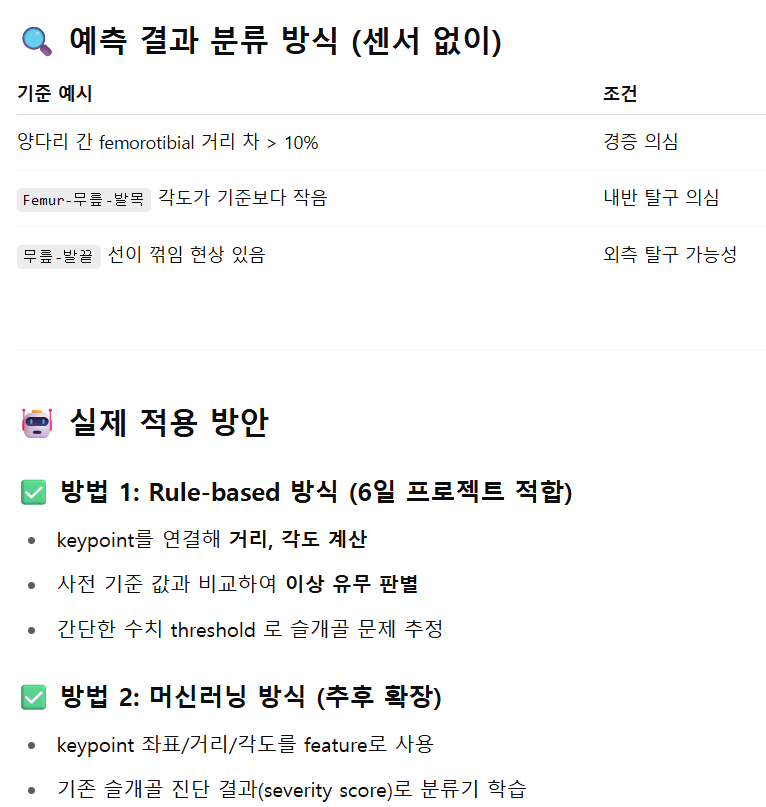

# keypoint 기반 feature 추출하기 (0804 월) - 예제 1-2개

In [ ]:
# /content/drive/MyDrive/side_healbow6/labels_json
# /content/drive/MyDrive/side_healbow6/labels_json/train
# /content/drive/MyDrive/side_healbow6/labels_json/val

In [ ]:
import json
import os
import numpy as np
import pandas as pd

# (1) keypoint label 순서 정의 (YOLOv8 pose 기준)
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# (2) 각도와 거리 계산 함수
def extract_angle(p1, p2, p3):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-6)
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# (3) JSON 파일 경로 리스트 (예: 2개만 지정)
json_files = [
    "/content/heal_2024_09_05_15_14_40_00292.json",
    "/content/heal_2024_09_05_15_14_40_00305.json"
]

# (4) feature 추출
feature_rows = []

for json_path in json_files:
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    # keypoint dict 구성
    keypoints = {ann["label"]: (float(ann["x"]), float(ann["y"])) for ann in data["annotation_info"]}

    if all(label in keypoints for label in KEYPOINT_ORDER):
        # 각도 feature
        hip_angle = extract_angle(keypoints["Iliac crest"], keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"])
        knee_angle = extract_angle(keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"], keypoints["Lateral malleolus of the distal tibia"])
        spine_angle = extract_angle(keypoints["Acromion/Greater tubercle"], keypoints["Dorsal scapular spine"], keypoints["T13 Spinous precess"])

        # 거리 feature
        torso_len = euclidean(keypoints["Iliac crest"], keypoints["T13 Spinous precess"])
        leg_len = euclidean(keypoints["Femoral greater trochanter"], keypoints["Lateral malleolus of the distal tibia"])
        leg_to_torso = leg_len / (torso_len + 1e-6)

        # 레이블 (이진 분류: 슬개골 탈구 여부)
        severity = data["severity"]

        # 기록
        feature_rows.append({
            "filename": data["image_info"]["filename"],
            "hip_angle": hip_angle,
            "knee_angle": knee_angle,
            "spine_angle": spine_angle,
            "torso_length": torso_len,
            "leg_length": leg_len,
            "leg_to_torso_ratio": leg_to_torso,
            "severity": severity
        })

# (5) pandas DataFrame으로 변환
df = pd.DataFrame(feature_rows)

# (6) 확인용 출력
print(df)


                         filename   hip_angle  knee_angle  spine_angle  \
0  치료멍멍_2024_09_05_15_14_40_00292  145.537139  140.777694   161.680408   
1  치료멍멍_2024_09_05_15_14_40_00305  159.144623  151.713387   135.771224   

   torso_length  leg_length  leg_to_torso_ratio  severity  
0      0.086735    0.244904            2.823565         0  
1      0.066330    0.193390            2.915549         0  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Feature와 레이블 분리
X = df.drop(columns=["filename", "severity"])
y = df["severity"]

# 훈련/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



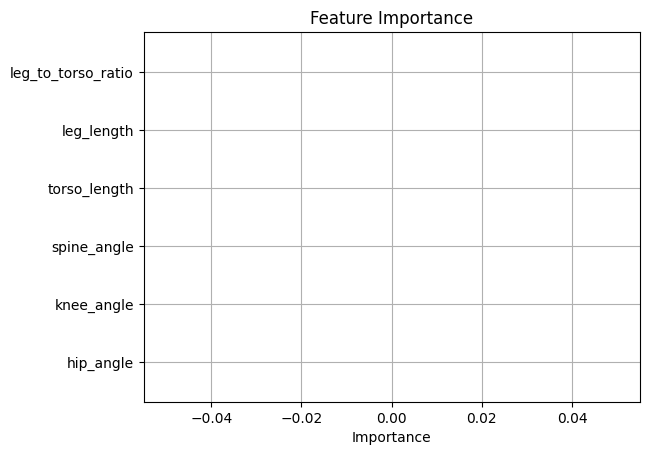

In [ ]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.grid(True)
plt.show()


# keypoint 기반 feature 추출하기(side 6-70개)

In [ ]:
# /content/drive/MyDrive/side_healbow6/labels_json
# /content/drive/MyDrive/side_healbow6/labels_json/train
# /content/drive/MyDrive/side_healbow6/labels_json/val

In [ ]:
✅ 정답: 두 폴더를 합쳐서 feature를 추출하세요
train/과 val/은 YOLO 모델 학습용 분할
지금 하려는 것은 YOLO의 출력(keypoint)을 이용한 2차 분류 모델 학습

In [ ]:
# 여러 폴더에 흩어진 json 파일들을 한 번에 읽어서 처리

In [ ]:
import json
import glob
import numpy as np
import pandas as pd

# (1) keypoint label 순서 정의 (YOLOv8 pose 기준)
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# (2) 각도와 거리 계산 함수
def extract_angle(p1, p2, p3):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-6)
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# (3) train/val 폴더의 모든 JSON 파일 경로 수집
train_folder = "/content/drive/MyDrive/side_healbow6/labels_json/train/*.json"
val_folder = "/content/drive/MyDrive/side_healbow6/labels_json/val/*.json"
json_files = glob.glob(train_folder) + glob.glob(val_folder)

print(f"총 JSON 파일 수: {len(json_files)}개")

# (4) feature 추출
feature_rows = []

for json_path in json_files:
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    keypoints = {ann["label"]: (float(ann["x"]), float(ann["y"])) for ann in data["annotation_info"]}

    if all(label in keypoints for label in KEYPOINT_ORDER):
        try:
            # 각도 feature
            hip_angle = extract_angle(keypoints["Iliac crest"], keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"])
            knee_angle = extract_angle(keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"], keypoints["Lateral malleolus of the distal tibia"])
            spine_angle = extract_angle(keypoints["Acromion/Greater tubercle"], keypoints["Dorsal scapular spine"], keypoints["T13 Spinous precess"])

            # 거리 feature
            torso_len = euclidean(keypoints["Iliac crest"], keypoints["T13 Spinous precess"])
            leg_len = euclidean(keypoints["Femoral greater trochanter"], keypoints["Lateral malleolus of the distal tibia"])
            leg_to_torso = leg_len / (torso_len + 1e-6)

            # 레이블 (슬개골 탈구 여부)
            severity = data["severity"]

            feature_rows.append({
                "filename": data["image_info"]["filename"],
                "hip_angle": hip_angle,
                "knee_angle": knee_angle,
                "spine_angle": spine_angle,
                "torso_length": torso_len,
                "leg_length": leg_len,
                "leg_to_torso_ratio": leg_to_torso,
                "severity": severity
            })
        except:
            continue

# (5) pandas DataFrame으로 변환
df = pd.DataFrame(feature_rows)
df["filename"] = df["filename"].str.replace("치료멍멍", "heal")

# (6) 확인
print(df.head())
print(f"\n✅ 총 feature 샘플 수: {len(df)}개")
print("클래스 분포:\n", df["severity"].value_counts())


총 JSON 파일 수: 115개
                         filename   hip_angle  knee_angle  spine_angle  \
0  heal_2024_10_28_16_37_50_00142  125.893492  114.047371   114.467092   
1  heal_2024_11_25_16_01_11_00028  145.590623  155.392114   140.842586   
2  heal_2024_10_28_17_41_28_00063  141.956462  155.913067   156.012107   
3  heal_2024_10_16_16_38_10_00162  137.308277  116.831653   160.116680   
4  heal_2024_12_03_15_47_48_00077  144.517528  175.104157   116.711938   

   torso_length  leg_length  leg_to_torso_ratio  severity  
0      0.076770    0.212781            2.771622         0  
1      0.142789    0.232590            1.628887         2  
2      0.102288    0.217960            2.130819         3  
3      0.066079    0.171009            2.587907         3  
4      0.103943    0.104694            1.007217         0  

✅ 총 feature 샘플 수: 113개
클래스 분포:
 severity
0    76
3    22
2     8
1     6
4     1
Name: count, dtype: int64


In [ ]:
df.to_csv("keypoint_features.csv", index=False)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Feature와 레이블 분리
X = df.drop(columns=["filename", "severity"])
y = df["severity"]

# 훈련/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.79      0.67        14
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.48        23
   macro avg       0.12      0.16      0.13        23
weighted avg       0.35      0.48      0.41        23



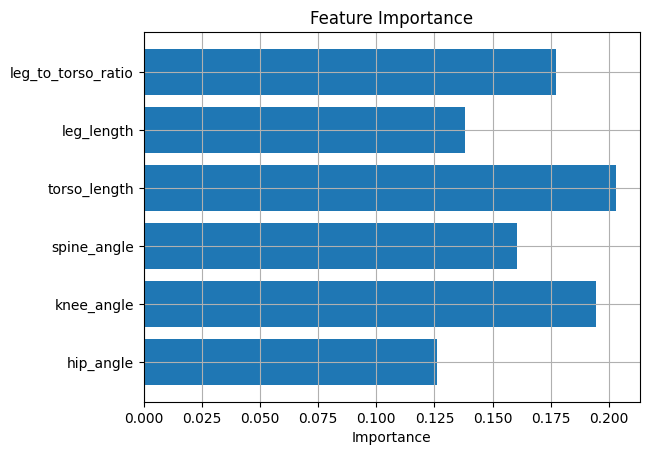

In [ ]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.grid(True)
plt.show()


In [ ]:
print(df["severity"].value_counts())


severity
0    76
3    22
2     8
1     6
4     1
Name: count, dtype: int64


In [ ]:
# 클래스 불균형으로 학습 편향 발생(severity 0이 너무 많음)

총 JSON 파일 수: 115개

✅ 총 샘플 수: 113
클래스 분포:
 label
0    76
1    37
Name: count, dtype: int64

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.17      0.12      0.14         8

    accuracy                           0.48        23
   macro avg       0.38      0.40      0.38        23
weighted avg       0.44      0.48      0.46        23



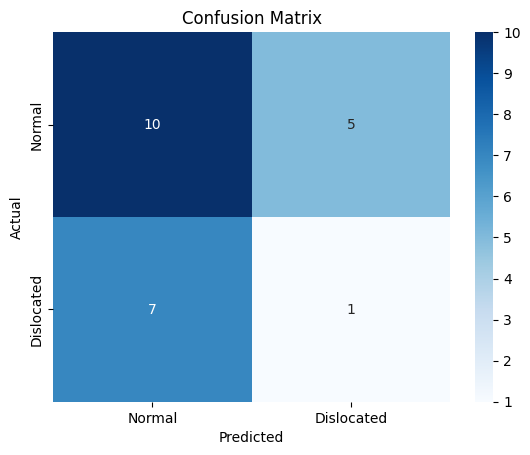

In [ ]:
import json
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# (1) YOLOv8 keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# (2) 각도 및 거리 함수
def extract_angle(p1, p2, p3):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-6)
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# (3) JSON 파일 경로 통합 (train + val)
train_folder = "/content/drive/MyDrive/side_healbow6/labels_json/train/*.json"
val_folder = "/content/drive/MyDrive/side_healbow6/labels_json/val/*.json"
json_files = glob.glob(train_folder) + glob.glob(val_folder)

print(f"총 JSON 파일 수: {len(json_files)}개")

# (4) feature 추출
feature_rows = []

for json_path in json_files:
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    keypoints = {ann["label"]: (float(ann["x"]), float(ann["y"])) for ann in data["annotation_info"]}

    if all(label in keypoints for label in KEYPOINT_ORDER):
        try:
            hip_angle = extract_angle(keypoints["Iliac crest"], keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"])
            knee_angle = extract_angle(keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"], keypoints["Lateral malleolus of the distal tibia"])
            spine_angle = extract_angle(keypoints["Acromion/Greater tubercle"], keypoints["Dorsal scapular spine"], keypoints["T13 Spinous precess"])
            torso_len = euclidean(keypoints["Iliac crest"], keypoints["T13 Spinous precess"])
            leg_len = euclidean(keypoints["Femoral greater trochanter"], keypoints["Lateral malleolus of the distal tibia"])
            leg_to_torso = leg_len / (torso_len + 1e-6)

            # 이진 라벨: 0(정상), 1(탈구 있음)
            binary_severity = 0 if data["severity"] == 0 else 1

            feature_rows.append({
                "filename": data["image_info"]["filename"],
                "hip_angle": hip_angle,
                "knee_angle": knee_angle,
                "spine_angle": spine_angle,
                "torso_length": torso_len,
                "leg_length": leg_len,
                "leg_to_torso_ratio": leg_to_torso,
                "label": binary_severity
            })
        except:
            continue

# (5) DataFrame 생성
df = pd.DataFrame(feature_rows)
print(f"\n✅ 총 샘플 수: {len(df)}")
print("클래스 분포:\n", df["label"].value_counts())

# (6) 학습/테스트 분리
X = df.drop(columns=["filename", "label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# (7) RandomForestClassifier 훈련
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# (8) 결과 출력
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# (9) Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Dislocated"], yticklabels=["Normal", "Dislocated"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# severity 0이 너무 많아, 언더샘플링 진행

In [ ]:
언더샘플링을 적용한 전체 이진 분류 파이프라인입니다.
(클래스 0을 클래스 1의 수에 맞게 줄인 후 모델 학습)

총 샘플 수 (언더샘플링 후): 74
클래스 분포:
 label
0    37
1    37
Name: count, dtype: int64

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.67      0.57      0.62         7

    accuracy                           0.67        15
   macro avg       0.67      0.66      0.66        15
weighted avg       0.67      0.67      0.66        15



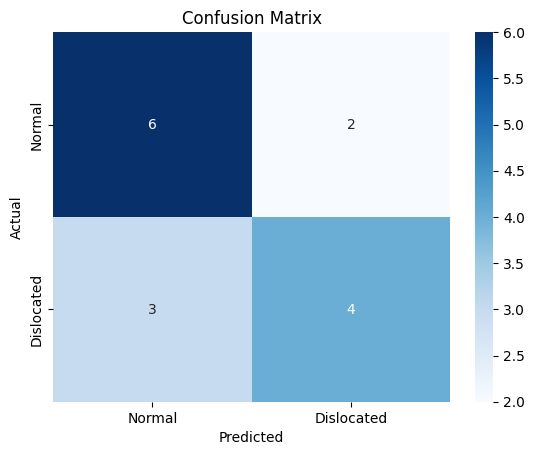

In [ ]:
import json
import glob
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# (1) YOLOv8 keypoint 순서
KEYPOINT_ORDER = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

def extract_angle(p1, p2, p3):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-6)
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# (2) 모든 JSON 파일 경로 불러오기
json_files = glob.glob("/content/drive/MyDrive/side_healbow6/labels_json/train/*.json") + \
             glob.glob("/content/drive/MyDrive/side_healbow6/labels_json/val/*.json")

feature_rows = []
for json_path in json_files:
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    keypoints = {ann["label"]: (float(ann["x"]), float(ann["y"])) for ann in data["annotation_info"]}

    if all(label in keypoints for label in KEYPOINT_ORDER):
        try:
            hip_angle = extract_angle(keypoints["Iliac crest"], keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"])
            knee_angle = extract_angle(keypoints["Femoral greater trochanter"], keypoints["Femorotibial joint"], keypoints["Lateral malleolus of the distal tibia"])
            spine_angle = extract_angle(keypoints["Acromion/Greater tubercle"], keypoints["Dorsal scapular spine"], keypoints["T13 Spinous precess"])
            torso_len = euclidean(keypoints["Iliac crest"], keypoints["T13 Spinous precess"])
            leg_len = euclidean(keypoints["Femoral greater trochanter"], keypoints["Lateral malleolus of the distal tibia"])
            leg_to_torso = leg_len / (torso_len + 1e-6)
            label = 0 if data["severity"] == 0 else 1

            feature_rows.append({
                "filename": data["image_info"]["filename"],
                "hip_angle": hip_angle,
                "knee_angle": knee_angle,
                "spine_angle": spine_angle,
                "torso_length": torso_len,
                "leg_length": leg_len,
                "leg_to_torso_ratio": leg_to_torso,
                "label": label
            })
        except:
            continue

# (3) DataFrame 생성 및 언더샘플링
df = pd.DataFrame(feature_rows)
df_majority = df[df.label == 0]
df_minority = df[df.label == 1]

df_majority_down = resample(df_majority,
                            replace=False,
                            n_samples=len(df_minority),
                            random_state=42)

df_under = pd.concat([df_majority_down, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"총 샘플 수 (언더샘플링 후): {len(df_under)}")
print("클래스 분포:\n", df_under["label"].value_counts())

# (4) 학습/평가
X = df_under.drop(columns=["filename", "label"])
y = df_under["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# (5) Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Dislocated"], yticklabels=["Normal", "Dislocated"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 이전보다 **클래스 1(탈구)**도 꽤 잘 예측하게 되었고,
전체적으로 균형 잡힌 분류 성능을 보이고 있습니다.

| 항목               | 값                            | 해석                                   |
| ---------------- | ---------------------------- | ------------------------------------ |
| **Accuracy**     | 0.67                         | 전체적으로 67% 맞췄음                        |
| **Class 0 (정상)** | precision=0.67 / recall=0.75 | 정상 케이스를 75%나 잘 맞췄고, precision도 균형 있음 |
| **Class 1 (탈구)** | precision=0.67 / recall=0.57 | **탈구 케이스도 57% 맞춤** → 이전 대비 큰 진전!     |
| **Macro avg**    | 0.66                         | 두 클래스 평균도 준수함                        |


# 중요한 feature 알려주는 코드 - 슬개골 분류

In [ ]:
importances = clf.feature_importances_
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.3f}")


hip_angle: 0.157
knee_angle: 0.183
spine_angle: 0.135
torso_length: 0.217
leg_length: 0.164
leg_to_torso_ratio: 0.143


In [ ]:
# 위의 코드 어떤 feature가 슬개골 분류에 중요한지 알 수 있어요


# 언더샘플링 후 유의미한 결과, 다른 모델로 교체해서 테스트, threshold 조정 코드


🚀 모델: RandomForest
📊 Classification Report (기본 threshold=0.5):
              precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.17      0.09      0.12        11

    accuracy                           0.56        34
   macro avg       0.40      0.44      0.41        34
weighted avg       0.49      0.56      0.52        34



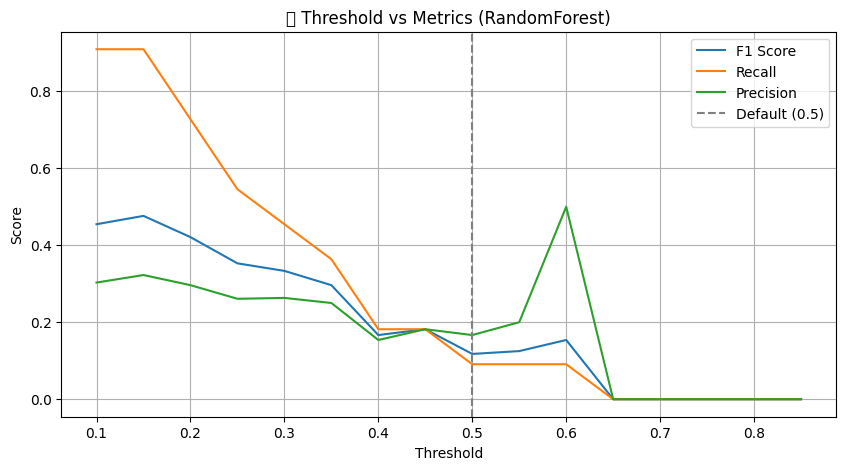

✅ 최적 threshold = 0.15
📊 Classification Report (커스텀 threshold):
              precision    recall  f1-score   support

           0       0.67      0.09      0.15        23
           1       0.32      0.91      0.48        11

    accuracy                           0.35        34
   macro avg       0.49      0.50      0.32        34
weighted avg       0.56      0.35      0.26        34


🚀 모델: XGBoost
📊 Classification Report (기본 threshold=0.5):
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.29      0.36      0.32        11

    accuracy                           0.50        34
   macro avg       0.47      0.46      0.46        34
weighted avg       0.53      0.50      0.51        34



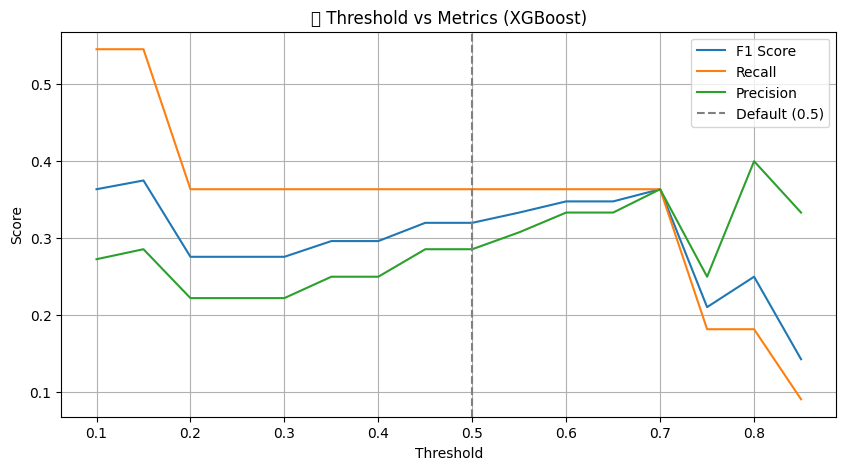

✅ 최적 threshold = 0.15
📊 Classification Report (커스텀 threshold):
              precision    recall  f1-score   support

           0       0.62      0.35      0.44        23
           1       0.29      0.55      0.38        11

    accuracy                           0.41        34
   macro avg       0.45      0.45      0.41        34
weighted avg       0.51      0.41      0.42        34


🚀 모델: LogisticRegression
📊 Classification Report (기본 threshold=0.5):
              precision    recall  f1-score   support

           0       0.67      0.87      0.75        23
           1       0.25      0.09      0.13        11

    accuracy                           0.62        34
   macro avg       0.46      0.48      0.44        34
weighted avg       0.53      0.62      0.55        34



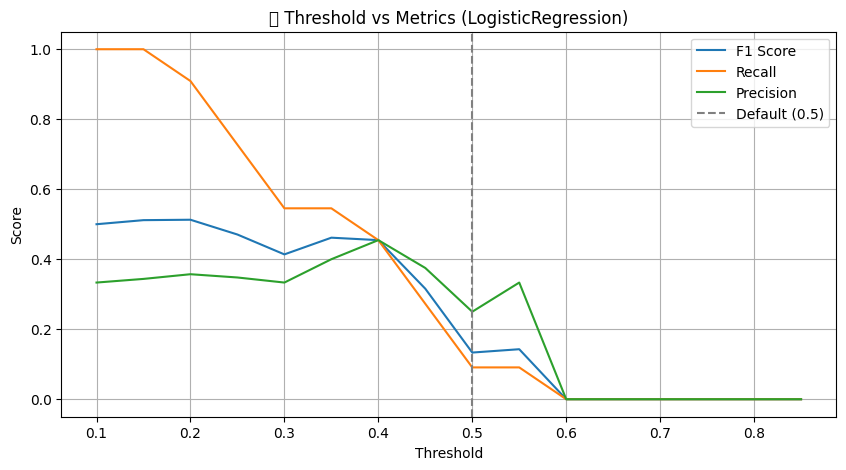

✅ 최적 threshold = 0.20
📊 Classification Report (커스텀 threshold):
              precision    recall  f1-score   support

           0       0.83      0.22      0.34        23
           1       0.36      0.91      0.51        11

    accuracy                           0.44        34
   macro avg       0.60      0.56      0.43        34
weighted avg       0.68      0.44      0.40        34



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 💡 예시: 기존 DataFrame df에서 X, y 정의
X = df.drop(columns=["filename", "label"])  # ✅ 'severity' → 'label'
y = df["label"]


# 훈련/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 사용할 모델 정의
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

# 모든 모델에 대해 학습 및 평가
for name, model in models.items():
    print(f"\n🚀 모델: {name}")
    model.fit(X_train, y_train)

    # 기본 평가
    y_pred = model.predict(X_test)
    print("📊 Classification Report (기본 threshold=0.5):")
    print(classification_report(y_test, y_pred))

    # threshold 커스터마이징 (확률 기반)
    y_proba = model.predict_proba(X_test)[:, 1]  # class 1에 대한 확률

    # 다양한 threshold를 테스트하며 f1-score 추이 보기
    thresholds = np.arange(0.1, 0.9, 0.05)
    f1_scores = []
    recalls = []
    precisions = []

    from sklearn.metrics import f1_score, precision_score, recall_score

    for t in thresholds:
        y_custom = (y_proba >= t).astype(int)
        f1_scores.append(f1_score(y_test, y_custom))
        recalls.append(recall_score(y_test, y_custom))
        precisions.append(precision_score(y_test, y_custom))

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, f1_scores, label="F1 Score")
    plt.plot(thresholds, recalls, label="Recall")
    plt.plot(thresholds, precisions, label="Precision")
    plt.axvline(0.5, color='gray', linestyle='--', label="Default (0.5)")
    plt.title(f"📈 Threshold vs Metrics ({name})")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.show()

    # 최적 threshold 선택해 재평가
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    y_best = (y_proba >= best_threshold).astype(int)

    print(f"✅ 최적 threshold = {best_threshold:.2f}")
    print("📊 Classification Report (커스텀 threshold):")
    print(classification_report(y_test, y_best))


In [ ]:
✅ 결론 및 추천
🔹 1. Class 1(탈구) Recall 중심이라면?
**Logistic Regression (threshold=0.20)**이 가장 효과적

탈구일 때 91% 확률로 잘 맞춤 (recall=0.91)

정밀도도 낮지 않음 (precision=0.36)

F1-score(1)도 제일 좋음 (0.51)

다만 정상(0)을 많이 놓침

→ ✔️ 조기 경고 시스템 목적이라면 적합

In [ ]:
importances = clf.feature_importances_
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.3f}")


hip_angle: 0.157
knee_angle: 0.183
spine_angle: 0.135
torso_length: 0.217
leg_length: 0.164
leg_to_torso_ratio: 0.143


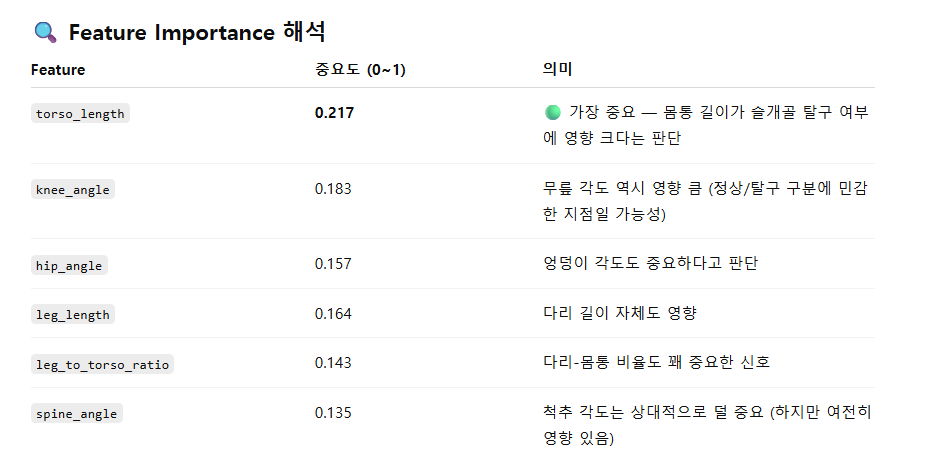

# 가장 영향력이 큰 TOP 3 Feature 기반으로 분류 모델 수행

In [ ]:
hip_angle: 0.157
knee_angle: 0.183

spine_angle: 0.135

torso_length: 0.217
leg_length: 0.164

leg_to_torso_ratio: 0.143

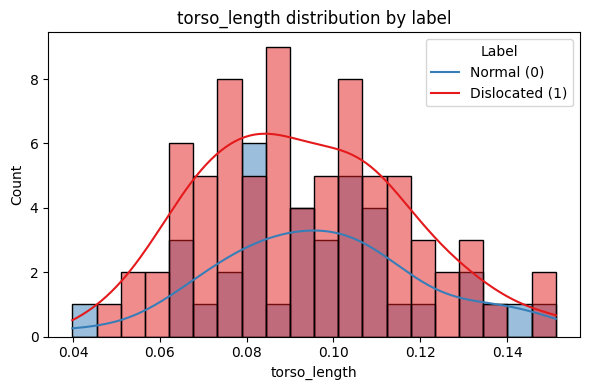

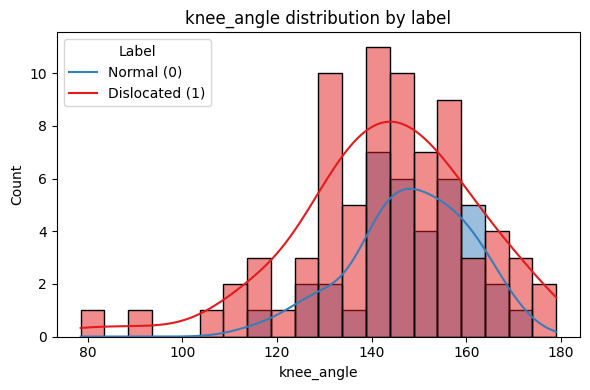

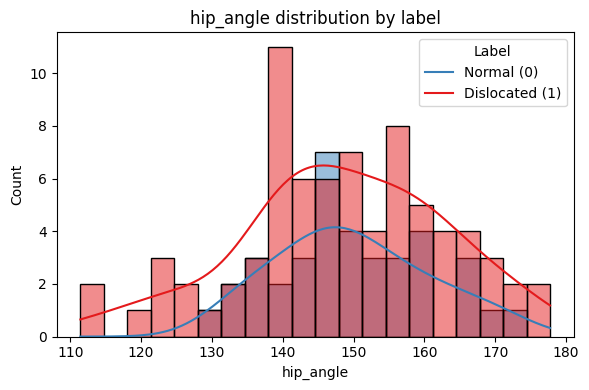

📌 Logistic Regression 결과
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        23
           1       0.00      0.00      0.00        11

    accuracy                           0.62        34
   macro avg       0.33      0.46      0.38        34
weighted avg       0.44      0.62      0.52        34

📌 XGBoost 결과
              precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.12      0.09      0.11        11

    accuracy                           0.50        34
   macro avg       0.37      0.39      0.38        34
weighted avg       0.46      0.50      0.48        34



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 🔧 데이터 로드 (이전에 만든 df 사용)
# df = ...  # 이미 생성되어 있다고 가정
# label 컬럼이 0, 1 이진값으로 되어 있어야 함

# ▶ Top 3 중요 feature 기반
top_features = ["torso_length", "knee_angle", "hip_angle"]
X = df[top_features]
y = df["label"]

# ▶ Feature 분포 시각화
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue="label", kde=True, bins=20, palette="Set1")
    plt.title(f"{feature} distribution by label")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Label", labels=["Normal (0)", "Dislocated (1)"])
    plt.tight_layout()
    plt.show()

# ▶ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ▶ 모델 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("📌 Logistic Regression 결과")
print(classification_report(y_test, lr_pred))

# ▶ 모델 2: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("📌 XGBoost 결과")
print(classification_report(y_test, xgb_pred))


In [ ]:
# knee_angle를 제외한 나머지 2개는 상호 보완하여 결합 지표로 다시 분석

In [ ]:
✅ 다음 단계 추천
데이터 불균형 해결

언더샘플링은 이미 해보셨고 일부 성능 향상도 있었죠?

다음 시도:
SMOTE 등 오버샘플링 기법
클래스 가중치 조정 (class_weight='balanced')
threshold 튜닝 (이미 시도됨, 효과 제한적이었음)

더 많은 데이터 확보
클래스 1(탈구)의 수가 11건은 너무 적습니다.
최소 수십~수백 개 이상 필요합니다.
특성 엔지니어링 (feature engineering)
현재 사용 중인 3개 각도/길이 조합 외에도
좌우 비대칭, 시간 순서 기반 변화율, 관절 간 비율 등을 추가해보세요.

In [ ]:
# 상위 top3 feautre에서 언더샘플링 다시 적용 후 수행

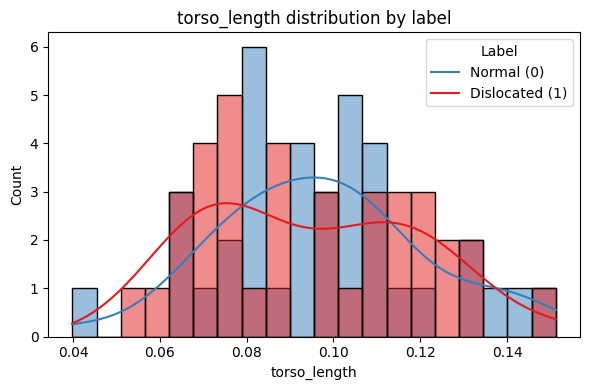

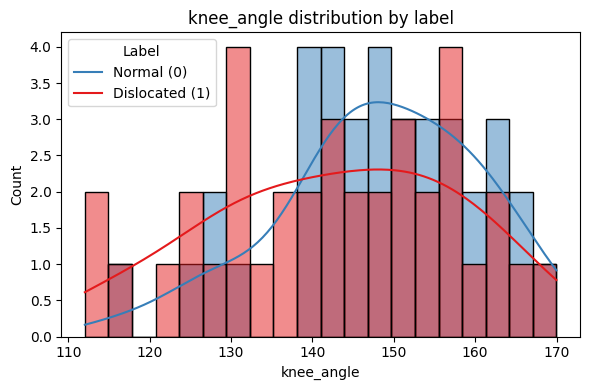

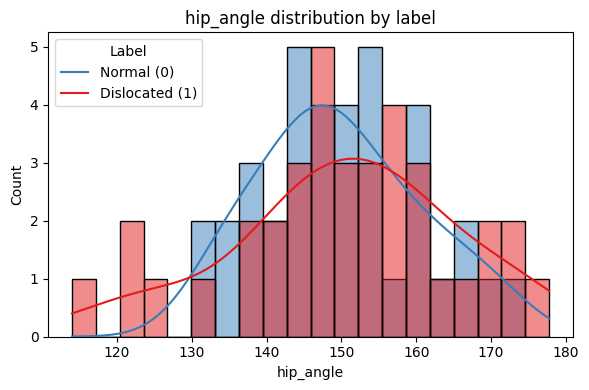

📌 Logistic Regression 결과
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.50      0.55      0.52        11

    accuracy                           0.52        23
   macro avg       0.52      0.52      0.52        23
weighted avg       0.52      0.52      0.52        23

📌 XGBoost 결과
              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.46      0.55      0.50        11

    accuracy                           0.48        23
   macro avg       0.48      0.48      0.48        23
weighted avg       0.48      0.48      0.48        23



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ✅ 이미 생성된 df를 사용한다고 가정 (label 열이 0/1로 되어 있어야 함)
# 예시: top 3 중요 feature만 추출
top_features = ["torso_length", "knee_angle", "hip_angle"]
df_filtered = df[top_features + ["label"]]  # label은 슬개골 탈구 여부 (0=정상, 1=탈구)

# ✅ 언더샘플링 수행
df_majority = df_filtered[df_filtered["label"] == 0]
df_minority = df_filtered[df_filtered["label"] == 1]

df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)
df_balanced = pd.concat([df_majority_downsampled, df_minority]).sample(frac=1, random_state=42)  # shuffle

X = df_balanced[top_features]
y = df_balanced["label"]

# ✅ Feature 분포 시각화
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_balanced, x=feature, hue="label", kde=True, bins=20, palette="Set1")
    plt.title(f"{feature} distribution by label")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Label", labels=["Normal (0)", "Dislocated (1)"])
    plt.tight_layout()
    plt.show()

# ✅ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ✅ 모델 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("📌 Logistic Regression 결과")
print(classification_report(y_test, lr_pred))

# ✅ 모델 2: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("📌 XGBoost 결과")
print(classification_report(y_test, xgb_pred))


In [ ]:
# 성능 결과 : 거의 동전 던지기 수준
그러면 feature 엔지니어링 보강하고, cross-validation으로 모델 튜닝하는 코드 작성해줄래? => 오히려 성능 떨어짐


📌 Logistic Regression 결과
              precision    recall  f1-score   support

           0       0.41      0.58      0.48        12
           1       0.17      0.09      0.12        11

    accuracy                           0.35        23
   macro avg       0.29      0.34      0.30        23
weighted avg       0.29      0.35      0.31        23

📌 XGBoost 결과
              precision    recall  f1-score   support

           0       0.41      0.58      0.48        12
           1       0.17      0.09      0.12        11

    accuracy                           0.35        23
   macro avg       0.29      0.34      0.30        23
weighted avg       0.29      0.35      0.31        23



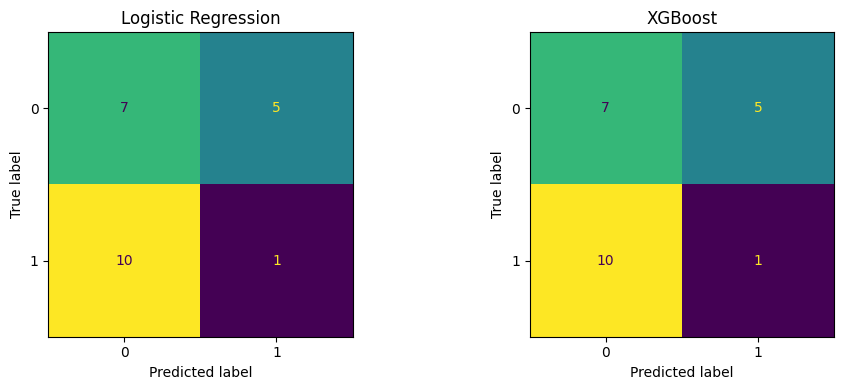

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

# ------------------------------
# 1. 언더샘플링
# ------------------------------
minority = df[df["label"] == 1]
majority = df[df["label"] == 0]
majority_down = resample(majority, replace=False, n_samples=len(minority), random_state=42)
df_bal = pd.concat([minority, majority_down]).sample(frac=1, random_state=42).reset_index(drop=True)

# ------------------------------
# 2. Feature Engineering
# ------------------------------
df_bal["leg_to_torso_ratio"] = df_bal["leg_length"] / (df_bal["torso_length"] + 1e-6)
df_bal["torso_spine_ratio"] = df_bal["torso_length"] / (df_bal["spine_angle"] + 1e-6)
df_bal["hip_knee_diff"] = np.abs(df_bal["hip_angle"] - df_bal["knee_angle"])
df_bal["total_angle"] = df_bal["hip_angle"] + df_bal["knee_angle"] + df_bal["spine_angle"]

# ------------------------------
# 3. Train/Test 분할
# ------------------------------
feature_cols = [
    "hip_angle", "knee_angle", "spine_angle", "torso_length", "leg_length",
    "leg_to_torso_ratio", "torso_spine_ratio", "hip_knee_diff", "total_angle"
]
X = df_bal[feature_cols]
y = df_bal["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ------------------------------
# 4. 스케일링
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 5. Logistic Regression
# ------------------------------
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

print("📌 Logistic Regression 결과")
print(classification_report(y_test, lr_pred))

# ------------------------------
# 6. XGBoost
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

print("📌 XGBoost 결과")
print(classification_report(y_test, xgb_pred))

# ------------------------------
# 7. Confusion Matrix 시각화
# ------------------------------
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, ax=ax[0], colorbar=False)
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, ax=ax[1], colorbar=False)
ax[1].set_title("XGBoost")

plt.tight_layout()
plt.show()


# smothe 기법 적용 후 recall 좋아짐 (탈구 놓치지 않고 잡음)

In [ ]:
# smothe 기법 적용
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 특성 및 레이블
top_features = ["torso_length", "knee_angle", "hip_angle"]
X = df[top_features]
y = df["label"]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("📌 Logistic Regression 결과")
print(classification_report(y_test, lr.predict(X_test)))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
print("📌 XGBoost 결과")
print(classification_report(y_test, xgb.predict(X_test)))


📌 Logistic Regression 결과
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.65      0.65      0.65        23

    accuracy                           0.65        46
   macro avg       0.65      0.65      0.65        46
weighted avg       0.65      0.65      0.65        46

📌 XGBoost 결과
              precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.60      0.78      0.68        23

    accuracy                           0.63        46
   macro avg       0.64      0.63      0.62        46
weighted avg       0.64      0.63      0.62        46



In [ ]:
✅ 요약 평가
📌 Logistic Regression (SMOTE 적용)
정상(0): recall = 0.65
탈구(1): recall = 0.65

🔎 완벽한 균형. 즉, 양 클래스 모두에서 잘 잡아내고 있다는 의미.
▶️ 정확도 65%, 재현율 65%로 baseline으로 괜찮은 모델

📌 XGBoost (SMOTE 적용)
정상(0): recall = 0.48 (정상 중 48%만 맞춤)
탈구(1): recall = 0.78 ✅

🔎 정상은 일부 놓치지만, 탈구를 놓치지 않음 → 의료/보건 맥락에선 중요
▶️ 탈구(positive class)를 잡는 데 더 효과적, 적절한 선택 가능



In [ ]:
# 정상 recall 값도 올리기
threshold 조정을 통해 XGBoost의 정상 class recall을 살짝 끌어올릴 수도 있어요.

혹은 Stacking이나 Voting Ensemble 모델도

✅ 최적 threshold = 0.72
📊 Classification Report (조정된 threshold):
              precision    recall  f1-score   support

           0       0.60      0.65      0.62        23
           1       0.62      0.57      0.59        23

    accuracy                           0.61        46
   macro avg       0.61      0.61      0.61        46
weighted avg       0.61      0.61      0.61        46



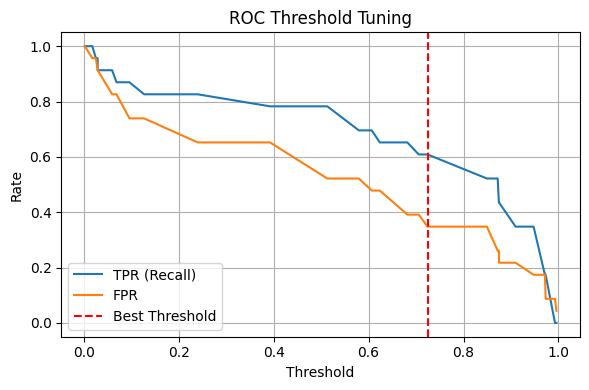

In [ ]:
from sklearn.metrics import classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. 예측 확률로 출력
y_proba = xgb.predict_proba(X_test)[:, 1]  # 1(탈구) 클래스 확률만

# 2. ROC 커브로 임계값 탐색
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# 3. 재현율과 균형 맞는 threshold 찾기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"✅ 최적 threshold = {optimal_threshold:.2f}")

# 4. 해당 threshold로 재분류
y_pred_custom = (y_proba > optimal_threshold).astype(int)

# 5. 결과 확인
print("📊 Classification Report (조정된 threshold):")
print(classification_report(y_test, y_pred_custom))

# 6. 시각화 (선택)
plt.figure(figsize=(6, 4))
plt.plot(thresholds, tpr, label='TPR (Recall)')
plt.plot(thresholds, fpr, label='FPR')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label='Best Threshold')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("ROC Threshold Tuning")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
📌 XGBoost 결과
              precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.60      0.78      0.68        23

## 0.6으로 설정해서 클래스 0의 recall 늘리기

✅ 사용한 threshold = 0.8
📊 Classification Report (조정된 threshold):
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.60      0.52      0.56        23

    accuracy                           0.59        46
   macro avg       0.59      0.59      0.59        46
weighted avg       0.59      0.59      0.59        46



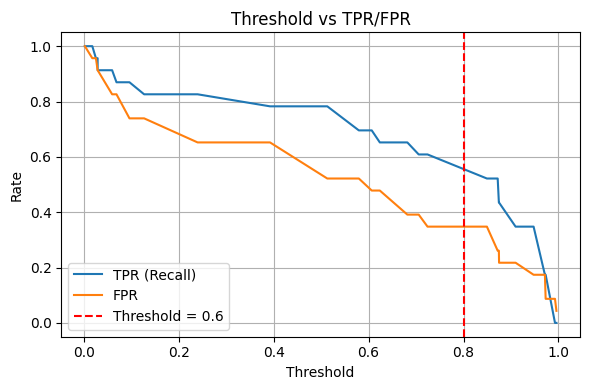

In [ ]:
from sklearn.metrics import classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 🔹 1. 예측 확률 계산 (1 = 탈구 클래스)
y_proba = xgb.predict_proba(X_test)[:, 1]

# 🔹 2. threshold = 0.6 고정
custom_threshold = 0.8
y_pred_custom = (y_proba > custom_threshold).astype(int)

# 🔹 3. 결과 출력
print(f"✅ 사용한 threshold = {custom_threshold}")
print("📊 Classification Report (조정된 threshold):")
print(classification_report(y_test, y_pred_custom))

# 🔹 4. 시각화 (TPR/FPR + 수동 threshold 표시)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(thresholds, tpr, label='TPR (Recall)')
plt.plot(thresholds, fpr, label='FPR')
plt.axvline(x=custom_threshold, color='red', linestyle='--', label='Threshold = 0.6')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Threshold vs TPR/FPR")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


✅ 사용한 threshold = 0.8
📊 Classification Report (조정된 threshold):
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.60      0.52      0.56        23

    accuracy                           0.59        46
   macro avg       0.59      0.59      0.59        46
weighted avg       0.59      0.59      0.59        46



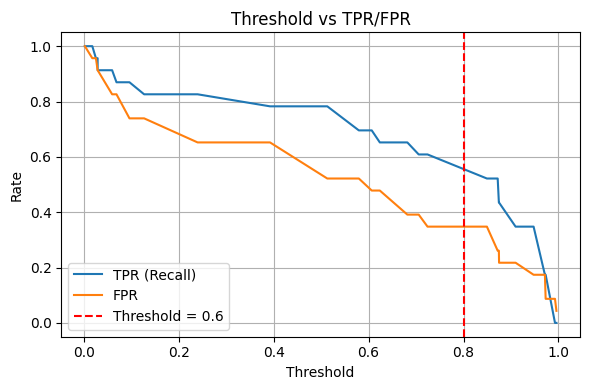

In [ ]:
from sklearn.metrics import classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 🔹 1. 예측 확률 계산 (1 = 탈구 클래스)
y_proba = xgb.predict_proba(X_test)[:, 1]

# 🔹 2. threshold = 0.6 고정
custom_threshold = 0.8
y_pred_custom = (y_proba > custom_threshold).astype(int)

# 🔹 3. 결과 출력
print(f"✅ 사용한 threshold = {custom_threshold}")
print("📊 Classification Report (조정된 threshold):")
print(classification_report(y_test, y_pred_custom))

# 🔹 4. 시각화 (TPR/FPR + 수동 threshold 표시)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(thresholds, tpr, label='TPR (Recall)')
plt.plot(thresholds, fpr, label='FPR')
plt.axvline(x=custom_threshold, color='red', linestyle='--', label='Threshold = 0.6')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Threshold vs TPR/FPR")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# 실제로 82로 recall 탐지를 했는데, 틀린 20도 뭐가 틀렸는지 보여주는 시각화 보여줘


In [ ]:
# ▶ train_test_split 전에 filename 분리
X = df.drop(columns=["label"])
y = df["label"]
filenames = df["filename"].values  # 따로 저장

# ▶ train/val 분할 (filename도 같이 분할)
X_train, X_test, y_train, y_test, fn_train, fn_test = train_test_split(
    X.drop(columns=["filename"]), y, filenames,
    test_size=0.3, stratify=y, random_state=42
)

# 오분류 이미지 시각화

In [ ]:
# 방법 1. top 3 feature로 통일하기 (추천)

top_features = ["torso_length", "knee_angle", "hip_angle"]
X = df[top_features]
y = df["label"]
filenames = df["filename"].values

X_train, X_test, y_train, y_test, fn_train, fn_test = train_test_split(
    X, y, filenames, test_size=0.3, stratify=y, random_state=42
)

# 모델 학습
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)

# 예측 (동일 feature 사용!)
y_proba = xgb.predict_proba(X_test)[:, 1]


In [ ]:
# 방법 2. 전체 feature로 다시 학습하기

X = df.drop(columns=["filename", "label"])
y = df["label"]
filenames = df["filename"].values

X_train, X_test, y_train, y_test, fn_train, fn_test = train_test_split(
    X, y, filenames, test_size=0.3, stratify=y, random_state=42
)

# 다시 학습
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)

# 예측
y_proba = xgb.predict_proba(X_test)[:, 1]


In [ ]:
# 🔹 예측 확률 계산
y_proba = xgb.predict_proba(X_test)[:, 1]
custom_threshold = 0.8
y_pred_custom = (y_proba > custom_threshold).astype(int)

# 🔹 오분류 인덱스 찾기
misclassified_idx = np.where(y_pred_custom != y_test)[0]

# 🔹 정보 정리
misclassified_info = pd.DataFrame({
    "filename": fn_test[misclassified_idx],
    "true_label": y_test.values[misclassified_idx],
    "pred_label": y_pred_custom[misclassified_idx],
    "proba": y_proba[misclassified_idx]
})

# 🔹 결과 출력
print(f"\n❗ 오분류된 샘플 수: {len(misclassified_info)}개")
for _, row in misclassified_info.iterrows():
    print(f"📷 {row['filename']}.jpg | 실제: {row['true_label']} → 예측: {row['pred_label']} (확률: {row['proba']:.2f})")

# Optional: CSV 저장
misclassified_info.to_csv("misclassified_samples.csv", index=False)



❗ 오분류된 샘플 수: 12개
📷 heal_2024_10_24_16_24_31_00015.jpg | 실제: 0 → 예측: 1 (확률: 0.99)
📷 heal_2024_11_28_15_14_10_00165.jpg | 실제: 1 → 예측: 0 (확률: 0.02)
📷 heal_2024_12_03_15_47_48_00077.jpg | 실제: 0 → 예측: 1 (확률: 0.99)
📷 heal_2024_10_19_18_24_15_00250.jpg | 실제: 1 → 예측: 0 (확률: 0.01)
📷 heal_2024_10_10_10_06_50_00124.jpg | 실제: 0 → 예측: 1 (확률: 0.84)
📷 heal_2024_11_14_15_33_10_00010.jpg | 실제: 1 → 예측: 0 (확률: 0.75)
📷 heal_2024_10_28_17_41_28_00027.jpg | 실제: 1 → 예측: 0 (확률: 0.06)
📷 heal_2024_10_07_16_08_32_00054.jpg | 실제: 1 → 예측: 0 (확률: 0.10)
📷 heal_2024_11_19_10_12_00_00174.jpg | 실제: 1 → 예측: 0 (확률: 0.15)
📷 heal_2024_10_10_14_50_40_00171.jpg | 실제: 1 → 예측: 0 (확률: 0.16)
📷 heal_2024_10_16_16_38_10_00269.jpg | 실제: 1 → 예측: 0 (확률: 0.02)
📷 heal_2024_11_28_15_14_10_00044.jpg | 실제: 1 → 예측: 0 (확률: 0.74)


❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_10_24_16_24_31_00015.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_11_28_15_14_10_00165.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_12_03_15_47_48_00077.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_10_19_18_24_15_00250.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_11_14_15_33_10_00010.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_10_28_17_41_28_00027.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_10_07_16_08_32_00054.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_11_19_10_12_00_00174.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_10_10_14_50_40_00171.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_10_16_16_38_10_00269.jpg
❌ 이미지 없음: /content/drive/MyDrive/side_healbow6/images/val/heal_2024_11

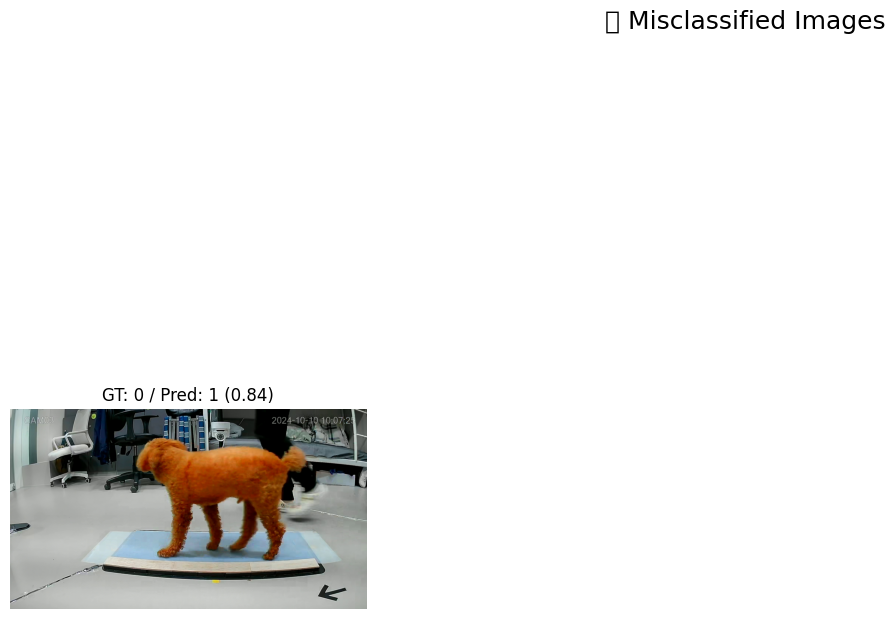

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 🔧 이미지가 저장된 폴더 경로 (예시: 실제 경로에 맞게 수정)
image_dir = "/content/drive/MyDrive/side_healbow6/images/val"

# 🔹 최대 표시할 이미지 수
max_display = 12

# 🔹 오분류 이미지 시각화
plt.figure(figsize=(15, 10))

for i, (_, row) in enumerate(misclassified_info.iterrows()):
    if i >= max_display:
        break

    image_path = os.path.join(image_dir, row["filename"] + ".jpg")

    if os.path.exists(image_path):
        img = Image.open(image_path)

        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"GT: {row['true_label']} / Pred: {row['pred_label']} ({row['proba']:.2f})")
    else:
        print(f"❌ 이미지 없음: {image_path}")

plt.suptitle("🧐 Misclassified Images", fontsize=18)
plt.tight_layout()
plt.show()


## 테스트의 의심성 : 좌표와 각도 기반으로 자가 진단의 위험성

In [ ]:
import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm

# 필수: keypoint 이름 리스트
KEYPOINT_NAMES = [
    "Ear",
    "Distal lateral aspect of fifth metacarpal bone",
    "Ulnar styloid process",
    "Lateral humeral epicondyle",
    "Distal lateral aspect of the fifth metatarsus",
    "Femoral greater trochanter",
    "Lateral malleolus of the distal tibia",
    "Femorotibial joint",
    "Iliac crest",
    "Acromion/Greater tubercle",
    "Dorsal scapular spine",
    "T13 Spinous precess"
]

# JSON 경로 설정
json_folder = "/content/drive/MyDrive/side_healbow6/labels_json/train"  # 수정 필요

# 사용할 각도 계산 조합 (A-B-C)
ANGLE_CONFIGS = {
    "knee_angle": (5, 7, 6),
    "hip_angle": (8, 5, 7),
    "ankle_angle": (7, 6, 4),
}

def calc_angle(a, b, c):
    if None in (a, b, c): return None
    ab = np.array(a) - np.array(b)
    cb = np.array(c) - np.array(b)
    if np.linalg.norm(ab) == 0 or np.linalg.norm(cb) == 0:
        return None
    cosine_angle = np.dot(ab, cb) / (np.linalg.norm(ab) * np.linalg.norm(cb))
    angle = np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))
    return angle

def extract_keypoints(json_data):
    try:
        ann = json_data["annotation_info"]
        if isinstance(ann, list):  # 리스트 형태라면 첫 번째 항목 사용
            ann = ann[0]
        keypoints = ann["keypoints"]
        points = [(kp["x"], kp["y"]) if "x" in kp and "y" in kp else None for kp in keypoints]
        return points
    except Exception as e:
        print(f"[경고] 키포인트 파싱 실패: {e}")
        return [None] * len(KEYPOINT_NAMES)

def extract_severity(json_data):
    try:
        ann = json_data["annotation_info"]
        if isinstance(ann, list):
            ann = ann[0]
        return ann.get("severity", None)
    except:
        return None

# 결과 리스트
all_data = []

for filename in tqdm(os.listdir(json_folder)):
    if not filename.endswith(".json"): continue
    filepath = os.path.join(json_folder, filename)
    with open(filepath, "r") as f:
        data = json.load(f)

    points = extract_keypoints(data)
    severity = extract_severity(data)
    entry = {"filename": filename, "severity": severity}

    for angle_name, (a, b, c) in ANGLE_CONFIGS.items():
        angle_value = calc_angle(points[a], points[b], points[c])
        entry[angle_name] = angle_value

    all_data.append(entry)

# CSV로 저장
df = pd.DataFrame(all_data)
df.to_csv("pose_angle_features.csv", index=False)
print("✅ 피처 추출 완료! → pose_angle_features.csv")


 90%|█████████ | 83/92 [00:00<00:00, 413.05it/s]

[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실

100%|██████████| 92/92 [00:00<00:00, 407.31it/s]

[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
[경고] 키포인트 파싱 실패: 'keypoints'
✅ 피처 추출 완료! → pose_angle_features.csv


In [ ]:
# 내 모델은 영상만으로 탈구 의심을 선별해서, 보호자가 병원을 찾게 하는 사전 탐지 역할을 해준다.
# "정상 vs 탈구" 의심 점수 계산하는 XGBoost 분류기 예제 코드 바로 드릴게요.
 “우리 강아지, 탈구 의심되나요?”

세부 Grade는 수의사가 진단해야 하므로,
모델은 **“의심됨 vs 정상”**을 빠르게 판단해주는 역할에 집중하는 게 효과적이에요.

# 간단한, 전체 이진 코드

In [ ]:
print(df.columns.tolist())

['filename', 'hip_angle', 'knee_angle', 'spine_angle', 'torso_length', 'leg_length', 'leg_to_torso_ratio', 'severity', 'target']


In [ ]:
# support는 실제 라벨에 대한 데이터 개수
클래스 0은 23개
클래스 1은 11개

In [ ]:
🎯 결론
현업 관점이나 조기 진단 목적에서 매우 합리적인 성능입니다.

탈구를 놓치는 것보다 일부 정상 오진이 더 낫다는 점을 고려하면 threshold=0.8은 전략적으로 적절한 선택입니다.

In [ ]:
# 해석 및 정리
탈구의 precision은 낮다.
모델이 탈구라고 예측했지만 실제로는 정상인 경우가 많았다. (FP 많음)

하지만 정상의 Recall도 낮다.
정상인데 탈구로 예측하는 경우가 많았다.

support 개수를 확인하면 알겠지만 클래스 불균형 문제를 고려해서 언더샘플링 전략을 수행한 후 smote 기법(오버 샘플링)으로 추가 보완하였다.

마지막으로 threshold을 0.8로 조정하여 민감도를 조절했다.

## 다중 분류 - 시범 테스트해보기 (탈구의 심각성 파악 severity 값 크기 범위)

In [ ]:
# 전체 흐름
1단계: 이진 분류 → 정상(0) vs 탈구(1)
      모델: Logistic / XGBoost
      결과: 탈구로 예측된 샘플만 필터링

2단계: 다중 분류 → severity 세부 클래스 (예: 1, 2, 3)
      모델: 다중 클래스 분류 모델
      예: RandomForest, XGBoost, 또는 MLPClassifier 등

In [ ]:
✅ 2. severity 기반 다중 클래스 레이블 만들기

In [ ]:
print(df.columns)

Index(['filename', 'hip_angle', 'knee_angle', 'spine_angle', 'torso_length',
       'leg_length', 'leg_to_torso_ratio', 'label'],
      dtype='object')


In [ ]:
df

filename   hip_angle  knee_angle  spine_angle  \
0    치료멍멍_2024_10_28_16_37_50_00142  125.893492  114.047371   114.467092   
1    치료멍멍_2024_11_25_16_01_11_00028  145.590623  155.392114   140.842586   
2    치료멍멍_2024_10_28_17_41_28_00063  141.956462  155.913067   156.012107   
3    치료멍멍_2024_10_16_16_38_10_00162  137.308277  116.831653   160.116680   
4    치료멍멍_2024_12_03_15_47_48_00077  144.517528  175.104157   116.711938   
..                              ...         ...         ...          ...   
108  치료멍멍_2024_10_10_15_39_35_00134  146.686994  145.179805   137.785894   
109  치료멍멍_2024_11_15_16_21_02_00192  140.112786  157.469411   126.915755   
110  치료멍멍_2024_11_07_15_12_33_00210  133.950506  149.887285   135.434547   
111  치료멍멍_2024_10_04_12_08_00_00545  133.920286  140.674190   118.015529   
112  치료멍멍_2024_09_29_12_12_25_00024  148.637059  124.653029   125.412308   

     torso_length  leg_length  leg_to_torso_ratio  label  
0        0.076770    0.212781            2.771622      0  
1        0.142789    0.232590            1.628887      1  
2        0.102288    0.217960            2.130819      1  
3        0.066079    0.171009            2.587907      1  
4        0.103943    0.104694            1.007217      0  
..            ...         ...                 ...    ...  
108      0.064170    0.182898            2.850159      0  
109      0.089072    0.208723            2.343279      0  
110      0.087833    0.278602            3.171903      0  
111      0.147280    0.259691            1.763238      1  
112      0.107063    0.174844            1.633071      0  

[113 rows x 8 columns]

In [ ]:
# /content/keypoint_features.csv
# 우선 기존의 df에서 0과 그 외의 숫자들은 이진 분류를 위해 0,1 값만 변환했으므로 severity값이 있는 /content/keypoint_features.csv 파일로 다중 분류 수행

In [ ]:
print(df["severity"].value_counts())

severity
0    76
3    22
2     8
1     6
4     1
Name: count, dtype: int64


## 유니코드 정규화 진행한 파일명 통일화는 겉의 이름만 통일화, json 파일 내용 중에 filename으로 정의된 이름이, 실제 이미지명으로 찾는 파이프라인

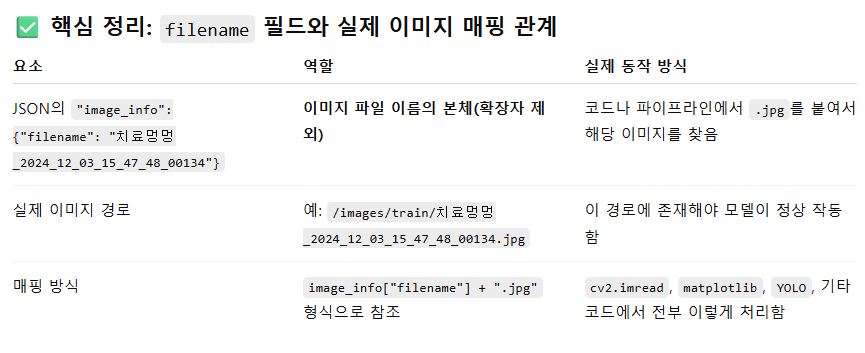

In [ ]:
from pathlib import Path
import json

json_root = Path("/content/drive/MyDrive/side_healbow6/labels_json/train")

for json_path in json_root.rglob("*.json"):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    old_name = data.get("image_info", {}).get("filename", "")
    if "치료멍멍" in old_name:
        new_name = old_name.replace("치료멍멍", "heal")
        data["image_info"]["filename"] = new_name

        with open(json_path, "w", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False, indent=2)

        print(f"✅ 수정됨: {old_name} → {new_name}")


✅ 수정됨: 치료멍멍_2024_10_28_16_37_50_00142 → heal_2024_10_28_16_37_50_00142
✅ 수정됨: 치료멍멍_2024_11_25_16_01_11_00028 → heal_2024_11_25_16_01_11_00028
✅ 수정됨: 치료멍멍_2024_10_28_17_41_28_00063 → heal_2024_10_28_17_41_28_00063
✅ 수정됨: 치료멍멍_2024_10_16_16_38_10_00162 → heal_2024_10_16_16_38_10_00162
✅ 수정됨: 치료멍멍_2024_12_03_15_47_48_00077 → heal_2024_12_03_15_47_48_00077
✅ 수정됨: 치료멍멍_2024_11_04_14_25_13_00200 → heal_2024_11_04_14_25_13_00200
✅ 수정됨: 치료멍멍_2024_10_24_18_20_28_00480 → heal_2024_10_24_18_20_28_00480
✅ 수정됨: 치료멍멍_2024_11_05_15_58_26_00134 → heal_2024_11_05_15_58_26_00134
✅ 수정됨: 치료멍멍_2024_10_25_10_27_30_00505 → heal_2024_10_25_10_27_30_00505
✅ 수정됨: 치료멍멍_2024_10_04_14_04_05_00286 → heal_2024_10_04_14_04_05_00286
✅ 수정됨: 치료멍멍_2024_10_10_14_31_25_00020 → heal_2024_10_10_14_31_25_00020
✅ 수정됨: 치료멍멍_2024_11_14_15_59_00_00103 → heal_2024_11_14_15_59_00_00103
✅ 수정됨: 치료멍멍_2024_10_01_10_46_15_00164 → heal_2024_10_01_10_46_15_00164
✅ 수정됨: 치료멍멍_2024_11_02_17_56_25_00031 → heal_2024_11_02_17_56_25_00031
✅ 수정됨:

In [ ]:
from pathlib import Path
import json

json_root = Path("/content/drive/MyDrive/side_healbow6/labels_json/val")

for json_path in json_root.rglob("*.json"):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    old_name = data.get("image_info", {}).get("filename", "")
    if "치료멍멍" in old_name:
        new_name = old_name.replace("치료멍멍", "heal")
        data["image_info"]["filename"] = new_name

        with open(json_path, "w", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False, indent=2)

        print(f"✅ 수정됨: {old_name} → {new_name}")


✅ 수정됨: 치료멍멍_2024_10_25_10_27_30_00303 → heal_2024_10_25_10_27_30_00303
✅ 수정됨: 치료멍멍_2024_11_05_15_53_20_00139 → heal_2024_11_05_15_53_20_00139
✅ 수정됨: 치료멍멍_2024_10_10_12_20_42_00161 → heal_2024_10_10_12_20_42_00161
✅ 수정됨: 치료멍멍_2024_10_10_09_45_46_00030 → heal_2024_10_10_09_45_46_00030
✅ 수정됨: 치료멍멍_2024_11_19_10_12_00_00123 → heal_2024_11_19_10_12_00_00123
✅ 수정됨: 치료멍멍_2024_11_29_10_11_14_00053 → heal_2024_11_29_10_11_14_00053
✅ 수정됨: 치료멍멍_2024_10_19_10_13_00_00085 → heal_2024_10_19_10_13_00_00085
✅ 수정됨: 치료멍멍_2024_09_29_14_16_20_00013 → heal_2024_09_29_14_16_20_00013
✅ 수정됨: 치료멍멍_2024_10_03_21_48_40_00272 → heal_2024_10_03_21_48_40_00272
✅ 수정됨: 치료멍멍_2024_11_05_15_55_35_00044 → heal_2024_11_05_15_55_35_00044
✅ 수정됨: 치료멍멍_2024_11_08_14_39_45_00516 → heal_2024_11_08_14_39_45_00516
✅ 수정됨: 치료멍멍_2024_11_19_14_20_32_00159 → heal_2024_11_19_14_20_32_00159
✅ 수정됨: 치료멍멍_2024_10_30_10_54_03_00074 → heal_2024_10_30_10_54_03_00074
✅ 수정됨: 치료멍멍_2024_10_01_14_18_00_00144 → heal_2024_10_01_14_18_00_00144
✅ 수정됨:

# cost sensitive - 탈구를 더 탐지 잘하도록 조정 => 오히려 최악으로 떨어짐

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 데이터 준비 (top 3 features)
top_features = ["torso_length", "knee_angle", "hip_angle"]
X = df[top_features]
y = df["label"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 1. Logistic Regression with class_weight
lr_weighted = LogisticRegression(class_weight="balanced", max_iter=1000)
lr_weighted.fit(X_train, y_train)
lr_pred = lr_weighted.predict(X_test)
print("📌 Logistic Regression (class_weight=balanced) 결과")
print(classification_report(y_test, lr_pred))

# 2. XGBoost with scale_pos_weight
# 비율: 정상 / 탈구 = class 0 개수 / class 1 개수
neg, pos = np.bincount(y_train)
scale = neg / pos

xgb_weighted = XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=scale)
xgb_weighted.fit(X_train, y_train)
xgb_pred = xgb_weighted.predict(X_test)
print("📌 XGBoost (scale_pos_weight=%.2f) 결과" % scale)
print(classification_report(y_test, xgb_pred))


📌 Logistic Regression (class_weight=balanced) 결과
              precision    recall  f1-score   support

           0       0.63      0.52      0.57        23
           1       0.27      0.36      0.31        11

    accuracy                           0.47        34
   macro avg       0.45      0.44      0.44        34
weighted avg       0.51      0.47      0.49        34

📌 XGBoost (scale_pos_weight=2.04) 결과
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        23
           1       0.20      0.18      0.19        11

    accuracy                           0.50        34
   macro avg       0.41      0.42      0.41        34
weighted avg       0.49      0.50      0.49        34

